# **Tarea 2 - Introducción al Deep Learning**

Integrantes:
- Michael Clemans
- Paula Marín
- Bárbara Pérez
- Sebastián Urbina

# Carga de datos

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') #Para ignorar mensajes de advertencia
%config InlineBackend.figure_format = 'png' #Para obtener gráficos en mejor calidad

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Primero, cargamos los datos

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks (1)/Intro al Deep Learning/Tarea_2/cesacion.xls'
df = pd.read_excel(path, skiprows=1).rename(columns={'default payment next month':'y'})

In [ ]:
df.shape

(30000, 25)

30000 datos y 23 features sin contar la variable de interés(y) e ID.

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


Revisamos si se tienen valores nulos

In [ ]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
y            0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

# Análisis exploratorio

### Histograma edades

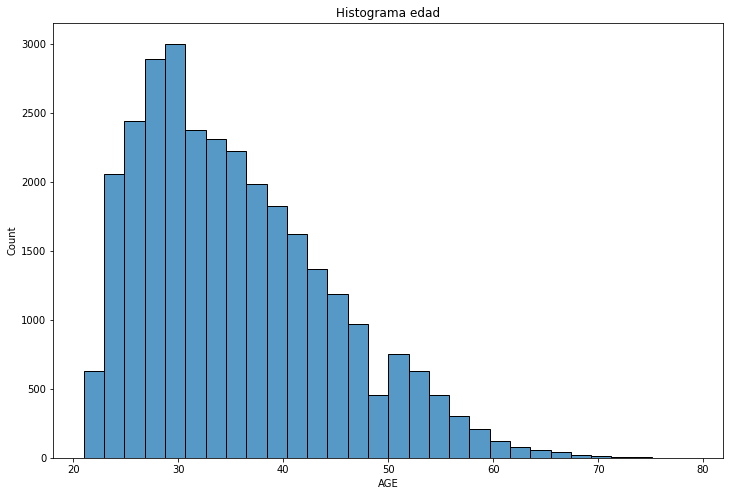

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(df, x='AGE', bins=30, ax=ax);
ax.set_title('Histograma edad');

Se puede observar que la mayoría de las personas se concentra entre 25-30 años. Lo cual no deja de ser interesante, pues, puede ser que gente de esta edad solicita crédito para adquirir un bien inmueble o automóvil porque esta empezando su vida laboral. 

### Boxplot categorías

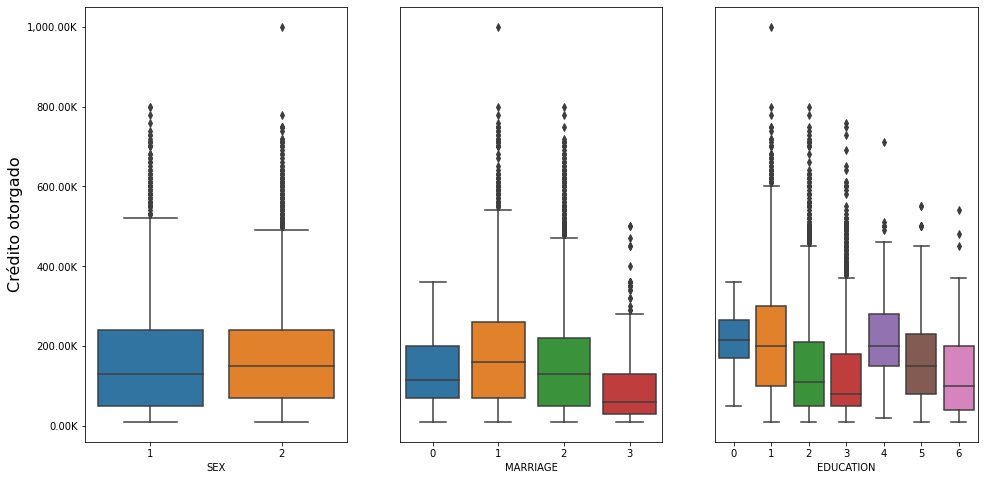

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(16,8))
sns.boxplot(data=df, y='LIMIT_BAL', x='SEX', ax=ax1)
sns.boxplot(data=df, y='LIMIT_BAL', x='MARRIAGE', ax=ax2)
sns.boxplot(data=df, y='LIMIT_BAL', x='EDUCATION', ax=ax3)
# Agregamos el sufijo K al eje Y.
xlabels = ['{:,.2f}'.format(x) + 'K' for x in ax1.get_yticks()/1000]
ax1.set_yticklabels(xlabels)  
ax1.set_ylabel('Crédito otorgado', fontsize=16)
ax2.get_yaxis().set_visible(False) #Ocultamos los demás ejes y. Sólo basta con el primero
ax3.get_yaxis().set_visible(False)

En general, no se observan grandes diferencias respecto al monto del crédito solicitado entre hombre y mujer. Asimismo, quienes están solteros (Marriage=1) alcanzan montos de crédito mucho superior a quienes están casados (Marriage=0).

Respecto al nivel educativo se ve que el nivel más alto, correspondiente a posgrado (Education=1), se incluye la persona que contrajó el crédito más alto y además el segundo promedio de créditos contraídos más altos. Coheremente para niveles más bajos de educación (Education=2,3), van descendiendo estas cotas como se subentiende que perciben en promedio menos sueldo y por tanto tienen menos capacidad de endeudarse. Sin embargo lo anterior entra en conflicto como la carencia de educación (Education=0) indica un alto nivel relativo de deuda. Para otros niveles de educación (Education=4,5,6) se percibe otra tendencia al descenso, pero por ambiguedad no se puede inferir nada.

### Scatter plot entre monto del estado de cuenta entre los diferentes meses

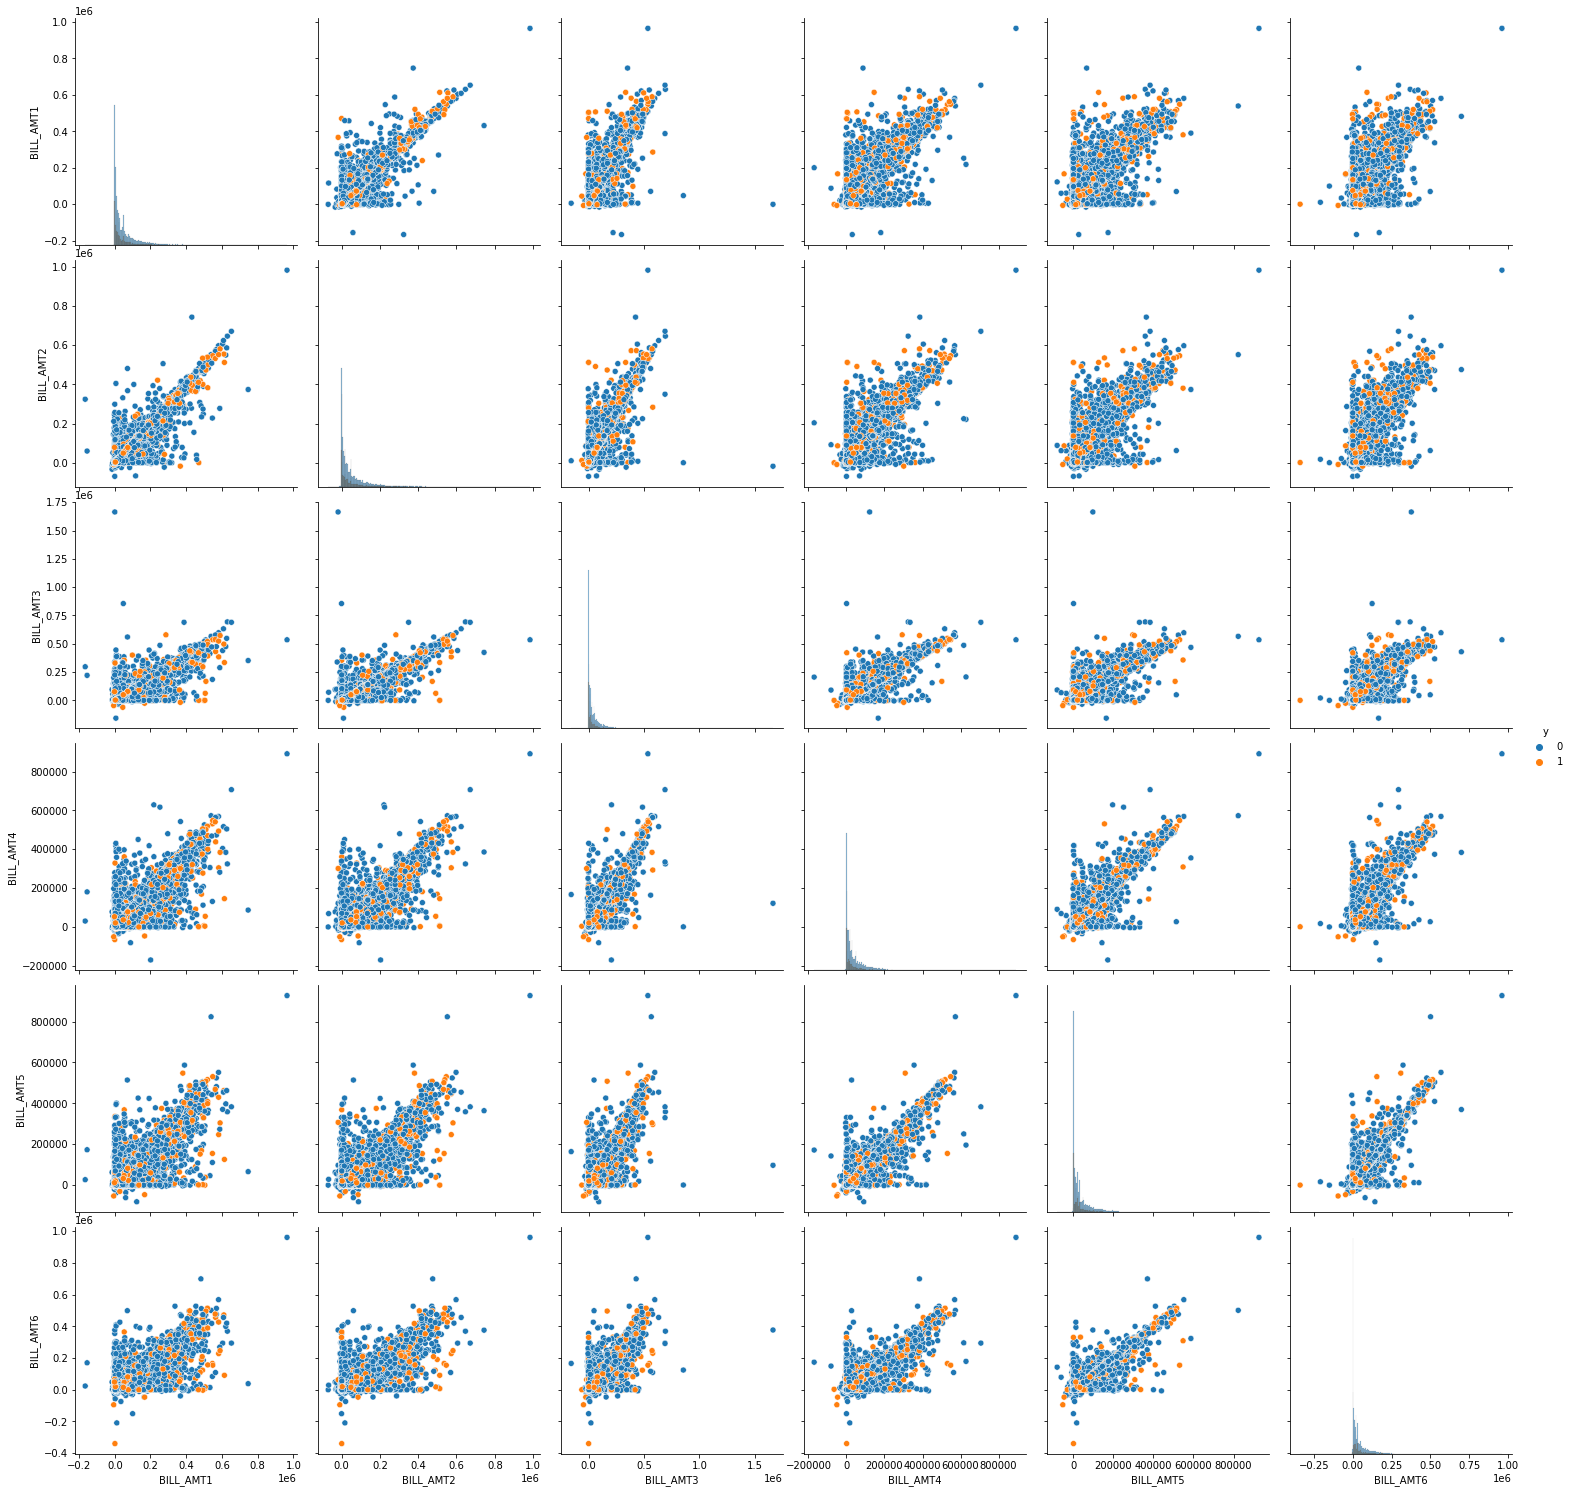

In [ ]:
cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','y']
g = sns.PairGrid(df[cols], height=3.5, hue='y')
g.map_diag(sns.histplot) #Ploteamos un histograma en la diagonal
g.map_offdiag(sns.scatterplot)
g.add_legend()

A priori no se observa algún tipo de patrón en el monto de cuenta entre meses de quienes cesan el pago(puntos naranjos).


### Conteo por comportamiento histórico a través de los meses por sexo

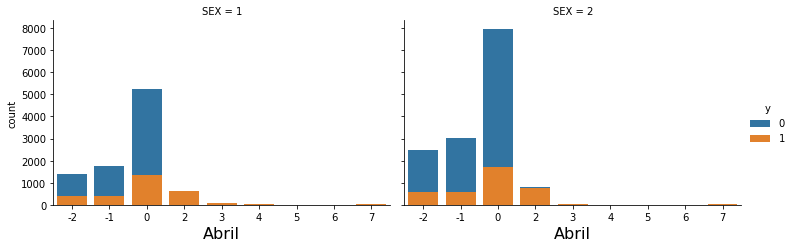

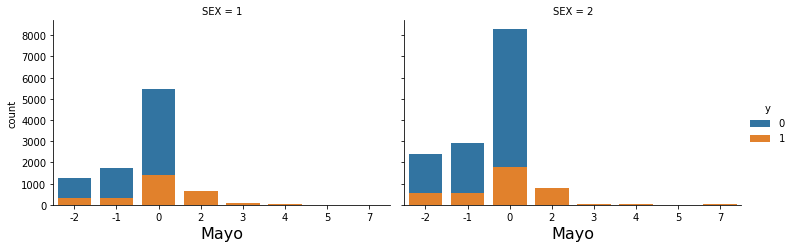

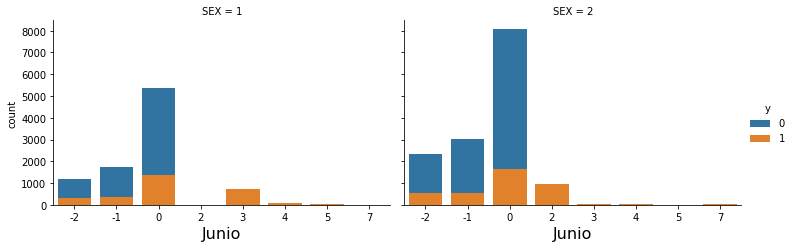

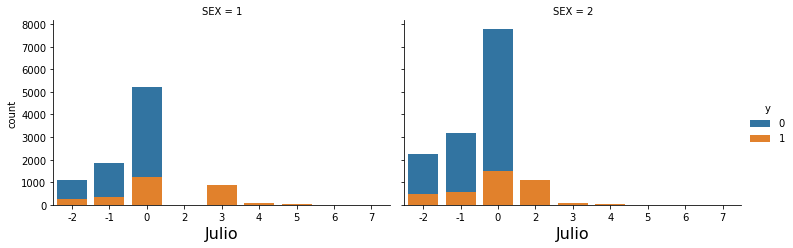

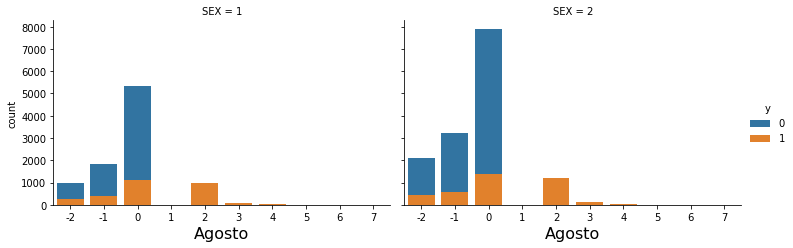

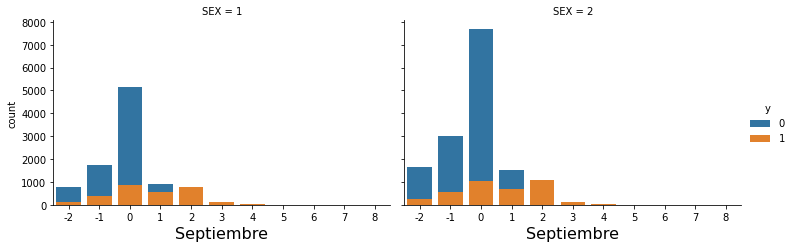

In [ ]:
meses = ['Septiembre','Agosto','Julio','Junio','Mayo','Abril']
idx = 5
for i in [6,5,4,3,2,0]:
    g = sns.FacetGrid(df, col='SEX',height=3.5, hue='y', aspect=1.5)
    g.map(sns.countplot, 'PAY_{}'.format(i))
    g.add_legend()
    g.set_xlabels(meses[idx], fontsize=16)
    idx-=1

Se puede observar en general a lo largo de los meses, que para los intervalos en donde se haya saldado el crédito (-2,1,0), el porcentaje de los que cesan el pago el pequeño. Por el contrario para los intervalos de postergación (1,2,3,4,5,6,7,8,9) quienes cesan el pago del crédito componen casi siempre la totalidad de la muestra. Cabe destacar que los meses de morosidad rara vez superan los 2, siendo casi despreciables casos superiores. Todo este comportamiento descrito se cumple de manera similar independiente del sexo.

### Gráfico distribución monto crédito

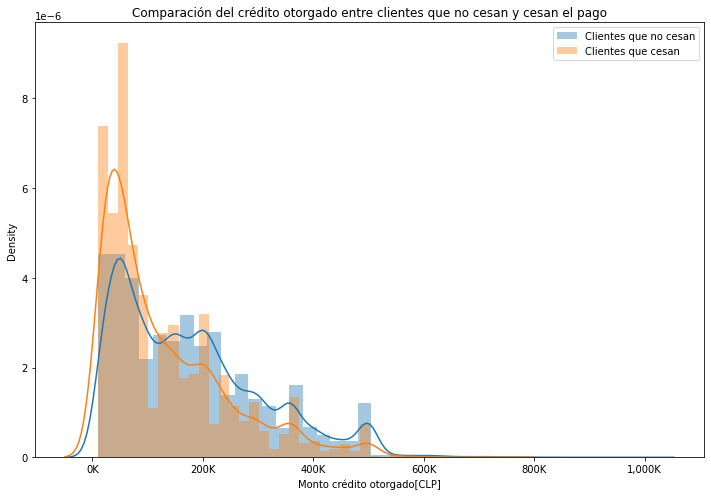

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
ax=sns.distplot(df[df['y']==0]['LIMIT_BAL'], bins=40, label = "Clientes que no cesan")
ax=sns.distplot(df[df['y']==1]['LIMIT_BAL'], bins=40, label = "Clientes que cesan")
xlabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000] #Formateamos el eje x para que ser más fácil interpretarlo
ax.set_xticklabels(xlabels)
ax.set_title('Comparación del crédito otorgado entre clientes que no cesan y cesan el pago')
ax.set_xlabel('Monto crédito otorgado[CLP]')
ax.legend(loc='upper right')
f.show()

En general quienes cesan el pago del crédito solicitan montos bajos.

###Gráficos de correlación

Producto de la gran variedad de variables independientes a evaluar, se decide separar en 4 gráficos de correlaciones distintos las variables,

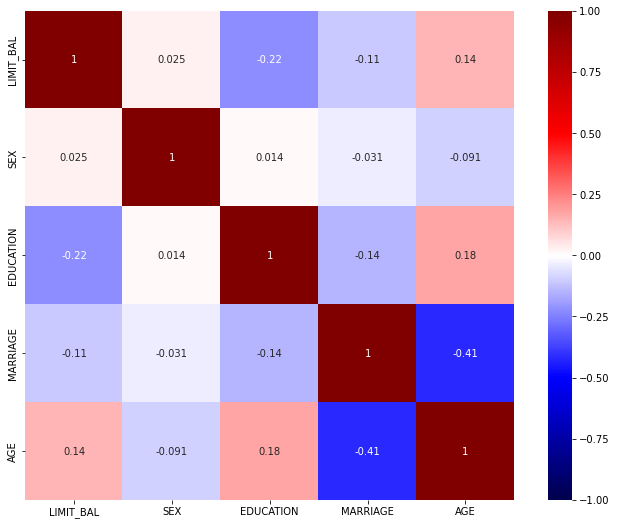

In [ ]:
corrmat = df[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE']].corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True, annot=True, cmap='seismic');

Con este gráfico no se observan correlaciones marcadas. La excepción es MARRIAGE con AGE, que correlaciona marcadamente negativa, entendiendose que por supuesto el estado civil depende de la edad.

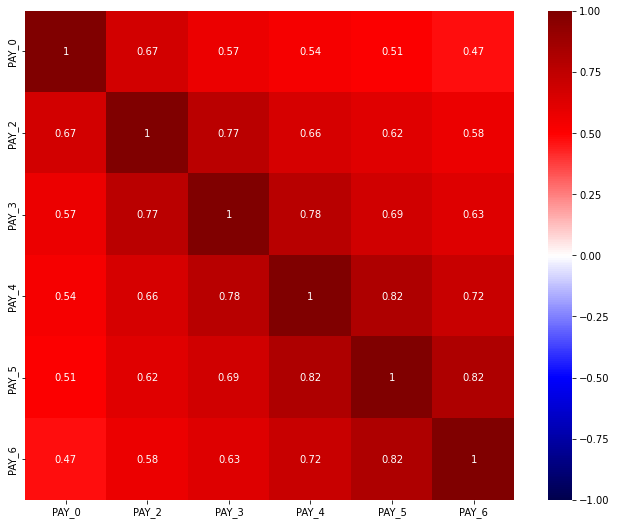

In [ ]:
corrmat = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True, annot=True, cmap='seismic');

Aquí se ve que la matriz tiene fuerte correlación para cada una de las variables PAY, siendo más intenso para las variables más cercanas entre si, por ejemplo el máximo PAY5 con PAY4 (0.82). Esto se explica fácilmente porque los meses de atrasos van aumentandose por mes (en caso de que el cliente no pague) y por tanto pasandose de intervalo a intervalo




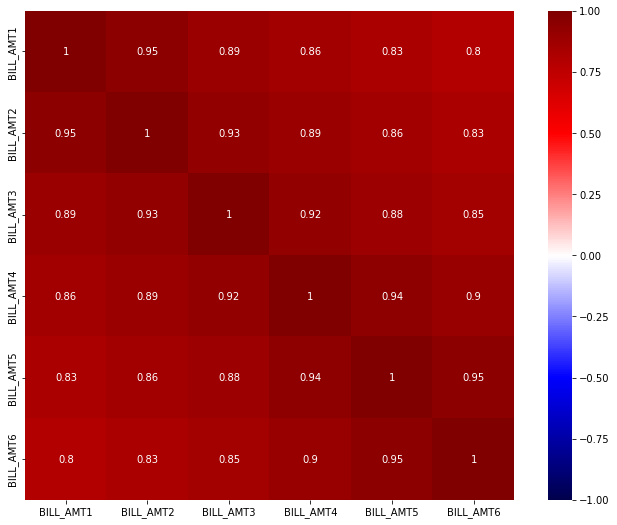

In [ ]:
corrmat = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True, annot=True, cmap='seismic');

 La matriz de este caso no evidencia fuerte correlaciones. No pareciese que el estado de crédito en un mes permita inferir otro.

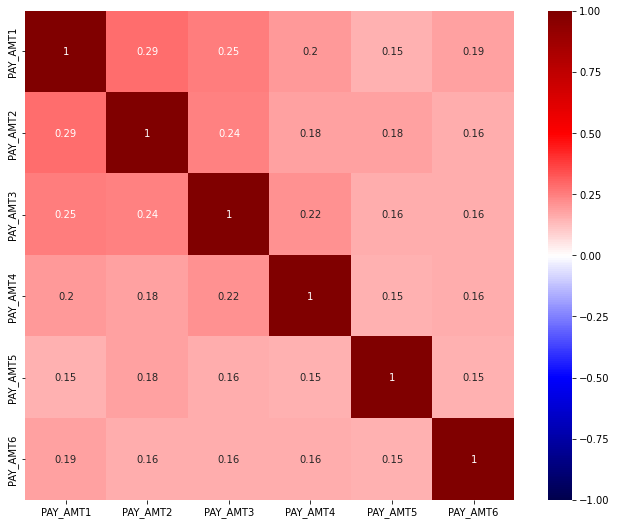

In [ ]:
corrmat = df[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].corr()
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=1, vmin=-1, square=True, annot=True, cmap='seismic');

Aquí la matriz muestra que casi todos los pagos entre meses correlaciona casi perfectamente entre si. La lógica es que la deuda va traspasandose entre período, hasta idealmente poder pagarse en algún momento.


# Modelo en Keras

Importamos librerias

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import np_utils

In [ ]:
#Instalamos optuna para correr los experimentos
#!pip install optuna

### Dividir data

Se procede a definir el conjunto de entrada `X` y el conjunto de salida `y`. Asimismo, se dejará un 10% de los datos para testear. Del 90% restante, se utilizará el 70% para entrenar y 20% para validar. Esta división se realizará en el argumento `validation_split` de la función de keras.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['ID','y']) #Data input 
y = df[['y']] #Data target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=24, stratify=y) # 10% test

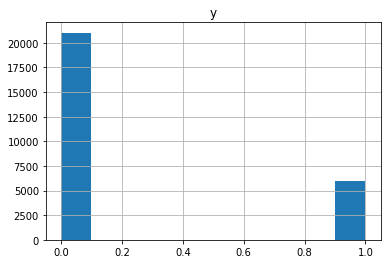

In [ ]:
y_train.hist();

En el histograma anterior, observamos que los datos están bastante desbalanceados. Por lo que sería útil balancearlos.

### Balancear data

Para balancear la data se utilizará el método de ADASYN. El cual consiste en una pequeña variación de SMOTE, sólo que le agrega ruido a los datos oversampleados.

SMOTE: https://arxiv.org/abs/1106.1813

In [ ]:
from imblearn.over_sampling import ADASYN #Importamos ADASYN

oversampler = ADASYN(random_state=0)  #Creamos el constructor de ADASYN
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train) #Oversampleamos los datos

X_train = pd.DataFrame(columns=X_train.columns, data=X_train_resampled) #Creamos el nuevo conjunto de train oversampleado
y_train = pd.DataFrame(columns=y_train.columns, data=y_train_resampled) 

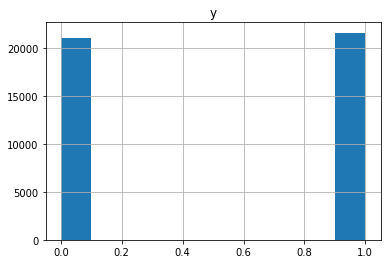

In [ ]:
y_train.hist();

### Normalizar data

Adicionalmente, se normalizarán los datos, vale decir, a cada feature se le restará su media y se dividirá por la desviación estándar.

\begin{equation*}
    Norm(\vec{x}) = \frac{\vec{x}-mean(\vec{x})}{std(\vec{x})}
\end{equation*}


In [ ]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train.values) #Creamos el escalador, este obtiene la media y desviación estándar del conjunto de train

normalized_train_X = scaler.transform(X_train.values) #Normalizamos el conjunto de train
normalized_test_X = scaler.transform(X_test.values) #Normalizamos el conjunto de testing.

### Modelo

Se definirá el siguiente modelo base de `2 capas ocultas` y dropout. Luego se utilizará la libreria `optuna`, la cual permite entrenar multiples modelos cambiando los hiperparámetros e identificando el cual se considera mejor en base a una métrica previamente definida.



In [ ]:
!pip install optuna

Se variará entre 3 optimizadores `AdaGrad, RMSprop y Adam`. Para testear los diferentes modelos

In [ ]:
optimizer_dict = {
    #'SGD':tf.keras.optimizers.SGD(),
    'AdaGrad':tf.keras.optimizers.Adagrad(),
    'RMSprop':tf.keras.optimizers.RMSprop(),
    'Adam':tf.keras.optimizers.Adam(),
    #'Adadelta':tf.keras.optimizers.Adadelta(),
    #'Adamax':tf.keras.optimizers.Adamax(),
    #'Nadam':tf.keras.optimizers.Nadam()
    }

El modelo tendrá la siguiente estructura:
- Capa 1:
    - Función de activación: Relu
    - Dropout
- Capa 2:
    - Función de activación: Relu
    - Dropout
- Capa salida:
    - Función de activación: Sigmoid
- Función de pérdida: 
    - Entropia cruzada: 
        \begin{equation}
        L(\hat{y},y)=ylog(\hat{y})+(1-y)log(1-\hat{y})
        \end{equation}
    - Justificación: Como el modelo consiste en clasificar si el individuo cesará el pago(y=1) o no(y=0): La entropia cruzada se ajusta perfecto al problema, ya que permite de alguna manera medir la similitud entre dos distribuciones de probabilidad. Por ejemplo, si el valor real es $y=1$ y la red predice $\hat{y}=0.9$, $ylog(\hat{y})=1*log(0.99)$ será un valor muy pequeño. 

     Análogamente si la red predice $\hat{y}=0.1$ y el valor real es $y=1$, $ylog(\hat{y})=1*log(0.1)$ será un valor muy grande. 

Se utilizará un `batch_size` de 64 para cada ensayo.

El número de neuronas y parámetro dropout variará primero para cada capa entre los valores `16,32,64,128` y el parámetro dropout entre los valores `0,0.25,0.5`. El optimizador, como se mencionó, será variable entre `AdaGrad, RMSprop y Adam`.

Una vez ejecutados 50 ensayos, se observará el mejor modelo, definiendo como métrica objetivo el `accuracy` del conjunto de validación.

Adicionalmente en cada uno de los entrenamiento de ensayo se utilizará `EarlyStopping` respecto a la pérdida del conjunto de validación. Es decir, si dado un cierto número de epocas el modelo no reduce la pérdida de validación, se detiene el entrentamiento.

In [ ]:
import optuna 
from keras import backend as K


n_input = normalized_train_X.shape[1]

def objective(trial): #Creamos la función objetivo como la pide optuna
    K.clear_session()

    model = Sequential()
    #Layer1
    model.add(Dense(
        units=trial.suggest_categorical('L1_units',[16,32,64,128]),
        input_dim=n_input,
        activation='relu'
    ))
    model.add(Dropout(
        trial.suggest_discrete_uniform(
            'DropOut_L1', 0, 0.5, 0.25 #[0,0.25,0.5]
        )
    ))
    #Layer2
    model.add(Dense(
        units=trial.suggest_categorical('L2_units',[16,32,64,128]),
        activation='relu'
    ))
    model.add(Dropout(
        trial.suggest_discrete_uniform(
            'DropOut_L2', 0, 0.5, 0.25
        )
    ))
    #Output
    model.add(Dense(
        1, activation='sigmoid'
    ))

    model.compile(
        optimizer = optimizer_dict[
                                   trial.suggest_categorical('Optimizer', list(optimizer_dict.keys()))
        ],
        loss = 'binary_crossentropy',
        metrics = ['acc','Precision','Recall']
    )
    #Train
    batch_size = 64
    n_epochs = 100
    earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6) #Earlystopping con paciencia 6
    #save_best = tf.keras.callbacks.ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
    history = model.fit(normalized_train_X, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.2, verbose=1, callbacks=[earlystopping])
    return history.history['val_acc'][-1]

La función previamente creada se corre gracias a la función optimizar de la biblioteca `optuna`. Como condiciones se procede a correr el modelo según 100 epocas y un batch size de 64. Se le asigna un `earlystopping` con una paciencia máxima de 6 períodos. Por último se utiliza un conjunto de validación del 20%.

In [ ]:
study = optuna.create_study(direction='maximize', study_name='modelo_pregunta_2')
study.optimize(objective, n_trials=50)

[I 2021-11-11 16:10:38,975] A new study created in memory with name: modelo_pregunta_2


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.7288 - acc: 0.5753 - precision: 0.3942 - recall: 0.2469 - val_loss: 0.8642 - val_acc: 0.1314 - val_precision: 1.0000 - val_recall: 0.1314
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6819 - acc: 0.6127 - precision: 0.4731 - recall: 0.2891 - val_loss: 0.8469 - val_acc: 0.2562 - val_precision: 1.0000 - val_recall: 0.2562
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6696 - acc: 0.6343 - precision: 0.5221 - recall: 0.2944 - val_loss: 0.8325 - val_acc: 0.3024 - val_precision: 1.0000 - val_recall: 0.3024
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6595 - acc: 0.6420 - precision: 0.5400 - recall: 0.3053 - val_loss: 0.8271 - val_acc: 0.3224 - val_precision: 1.0000 - val_recall: 0.3224
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6534 - acc: 0.6488 - precision: 0.5569 - recall: 0.3101 - val_l

[I 2021-11-11 16:12:16,879] Trial 0 finished with value: 0.4933428466320038 and parameters: {'L1_units': 32, 'DropOut_L1': 0.5, 'L2_units': 128, 'DropOut_L2': 0.5, 'Optimizer': 'AdaGrad'}. Best is trial 0 with value: 0.4933428466320038.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.5582 - acc: 0.7371 - precision: 0.7060 - recall: 0.5120 - val_loss: 0.6348 - val_acc: 0.5920 - val_precision: 1.0000 - val_recall: 0.5920
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5353 - acc: 0.7486 - precision: 0.7263 - recall: 0.5291 - val_loss: 0.6756 - val_acc: 0.6019 - val_precision: 1.0000 - val_recall: 0.6019
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5308 - acc: 0.7502 - precision: 0.7282 - recall: 0.5325 - val_loss: 0.6226 - val_acc: 0.6204 - val_precision: 1.0000 - val_recall: 0.6204
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5262 - acc: 0.7549 - precision: 0.7353 - recall: 0.5413 - val_loss: 0.6441 - val_acc: 0.6119 - val_precision: 1.0000 - val_recall: 0.6119
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5225 - acc: 0.7544 - precision: 0.7340 - recall: 0.5411 - val_l

[I 2021-11-11 16:12:38,507] Trial 1 finished with value: 0.6456252932548523 and parameters: {'L1_units': 128, 'DropOut_L1': 0.25, 'L2_units': 16, 'DropOut_L2': 0.25, 'Optimizer': 'Adam'}. Best is trial 1 with value: 0.6456252932548523.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.6137 - acc: 0.6791 - precision: 0.6184 - recall: 0.3767 - val_loss: 0.7960 - val_acc: 0.4238 - val_precision: 1.0000 - val_recall: 0.4238
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5797 - acc: 0.7169 - precision: 0.7017 - recall: 0.4261 - val_loss: 0.7954 - val_acc: 0.4441 - val_precision: 1.0000 - val_recall: 0.4441
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5680 - acc: 0.7256 - precision: 0.7055 - recall: 0.4603 - val_loss: 0.7673 - val_acc: 0.5138 - val_precision: 1.0000 - val_recall: 0.5138
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5602 - acc: 0.7304 - precision: 0.6998 - recall: 0.4919 - val_loss: 0.7708 - val_acc: 0.5139 - val_precision: 1.0000 - val_recall: 0.5139
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5552 - acc: 0.7357 - precision: 0.7038 - recall: 0.5095 - val_l

[I 2021-11-11 16:12:54,879] Trial 2 finished with value: 0.5863052606582642 and parameters: {'L1_units': 16, 'DropOut_L1': 0.5, 'L2_units': 16, 'DropOut_L2': 0.0, 'Optimizer': 'RMSprop'}. Best is trial 1 with value: 0.6456252932548523.


Epoch 1/100
526/526 [==============================] - 40s 2ms/step - loss: 0.5818 - acc: 0.7143 - precision: 0.6857 - recall: 0.4398 - val_loss: 0.6760 - val_acc: 0.5693 - val_precision: 1.0000 - val_recall: 0.5693
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5573 - acc: 0.7298 - precision: 0.7127 - recall: 0.4683 - val_loss: 0.6698 - val_acc: 0.5996 - val_precision: 1.0000 - val_recall: 0.5996
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5522 - acc: 0.7343 - precision: 0.7149 - recall: 0.4848 - val_loss: 0.7129 - val_acc: 0.5625 - val_precision: 1.0000 - val_recall: 0.5625
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5501 - acc: 0.7381 - precision: 0.7197 - recall: 0.4937 - val_loss: 0.6700 - val_acc: 0.6013 - val_precision: 1.0000 - val_recall: 0.6013
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5456 - acc: 0.7389 - precision: 0.7164 - recall: 0.5029 - val_

[I 2021-11-11 16:13:57,199] Trial 3 finished with value: 0.6294578909873962 and parameters: {'L1_units': 32, 'DropOut_L1': 0.25, 'L2_units': 16, 'DropOut_L2': 0.5, 'Optimizer': 'Adam'}. Best is trial 1 with value: 0.6456252932548523.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5498 - acc: 0.7403 - precision: 0.7056 - recall: 0.5276 - val_loss: 0.6535 - val_acc: 0.6164 - val_precision: 1.0000 - val_recall: 0.6164
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5290 - acc: 0.7511 - precision: 0.7175 - recall: 0.5545 - val_loss: 0.6769 - val_acc: 0.6282 - val_precision: 1.0000 - val_recall: 0.6282
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5227 - acc: 0.7539 - precision: 0.7174 - recall: 0.5672 - val_loss: 0.6581 - val_acc: 0.6173 - val_precision: 1.0000 - val_recall: 0.6173
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5175 - acc: 0.7560 - precision: 0.7193 - recall: 0.5731 - val_loss: 0.6022 - val_acc: 0.6454 - val_precision: 1.0000 - val_recall: 0.6454
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5145 - acc: 0.7564 - precision: 0.7201 - recall: 0.5734 - val_l

[I 2021-11-11 16:14:19,278] Trial 4 finished with value: 0.691868782043457 and parameters: {'L1_units': 64, 'DropOut_L1': 0.25, 'L2_units': 128, 'DropOut_L2': 0.25, 'Optimizer': 'Adam'}. Best is trial 4 with value: 0.691868782043457.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.6804 - acc: 0.6018 - precision: 0.4534 - recall: 0.3008 - val_loss: 0.8010 - val_acc: 0.3059 - val_precision: 1.0000 - val_recall: 0.3059
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6368 - acc: 0.6600 - precision: 0.5827 - recall: 0.3283 - val_loss: 0.7893 - val_acc: 0.3557 - val_precision: 1.0000 - val_recall: 0.3557
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6201 - acc: 0.6857 - precision: 0.6449 - recall: 0.3603 - val_loss: 0.7757 - val_acc: 0.3891 - val_precision: 1.0000 - val_recall: 0.3891
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6091 - acc: 0.6986 - precision: 0.6757 - recall: 0.3773 - val_loss: 0.7636 - val_acc: 0.4211 - val_precision: 1.0000 - val_recall: 0.4211
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5999 - acc: 0.7052 - precision: 0.6879 - recall: 0.3915 - val_l

[I 2021-11-11 16:15:21,962] Trial 5 finished with value: 0.5790537595748901 and parameters: {'L1_units': 128, 'DropOut_L1': 0.0, 'L2_units': 16, 'DropOut_L2': 0.5, 'Optimizer': 'AdaGrad'}. Best is trial 4 with value: 0.691868782043457.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.6814 - acc: 0.5817 - precision: 0.3760 - recall: 0.1750 - val_loss: 0.8549 - val_acc: 0.1045 - val_precision: 1.0000 - val_recall: 0.1045
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6469 - acc: 0.6471 - precision: 0.5770 - recall: 0.2211 - val_loss: 0.8381 - val_acc: 0.2738 - val_precision: 1.0000 - val_recall: 0.2738
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6298 - acc: 0.6728 - precision: 0.6376 - recall: 0.2955 - val_loss: 0.8187 - val_acc: 0.3785 - val_precision: 1.0000 - val_recall: 0.3785
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6167 - acc: 0.6924 - precision: 0.6715 - recall: 0.3519 - val_loss: 0.7993 - val_acc: 0.4251 - val_precision: 1.0000 - val_recall: 0.4251
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6081 - acc: 0.6996 - precision: 0.6772 - recall: 0.3799 - val_l

[I 2021-11-11 16:17:02,526] Trial 6 finished with value: 0.6217308640480042 and parameters: {'L1_units': 128, 'DropOut_L1': 0.25, 'L2_units': 32, 'DropOut_L2': 0.25, 'Optimizer': 'AdaGrad'}. Best is trial 4 with value: 0.691868782043457.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.6947 - acc: 0.5533 - precision: 0.4371 - recall: 0.6647 - val_loss: 0.7211 - val_acc: 0.4652 - val_precision: 1.0000 - val_recall: 0.4652
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6276 - acc: 0.6758 - precision: 0.5984 - recall: 0.4113 - val_loss: 0.7745 - val_acc: 0.3984 - val_precision: 1.0000 - val_recall: 0.3984
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6083 - acc: 0.6948 - precision: 0.6584 - recall: 0.3867 - val_loss: 0.7891 - val_acc: 0.3971 - val_precision: 1.0000 - val_recall: 0.3971
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5979 - acc: 0.7047 - precision: 0.6878 - recall: 0.3892 - val_loss: 0.7888 - val_acc: 0.4051 - val_precision: 1.0000 - val_recall: 0.4051
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5909 - acc: 0.7095 - precision: 0.6998 - recall: 0.3945 - val_l

[I 2021-11-11 16:17:09,724] Trial 7 finished with value: 0.4316452741622925 and parameters: {'L1_units': 32, 'DropOut_L1': 0.0, 'L2_units': 32, 'DropOut_L2': 0.0, 'Optimizer': 'AdaGrad'}. Best is trial 4 with value: 0.691868782043457.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.5645 - acc: 0.7268 - precision: 0.6912 - recall: 0.4905 - val_loss: 0.6686 - val_acc: 0.6103 - val_precision: 1.0000 - val_recall: 0.6103
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5364 - acc: 0.7479 - precision: 0.7144 - recall: 0.5461 - val_loss: 0.6732 - val_acc: 0.6044 - val_precision: 1.0000 - val_recall: 0.6044
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5275 - acc: 0.7502 - precision: 0.7146 - recall: 0.5558 - val_loss: 0.6985 - val_acc: 0.6047 - val_precision: 1.0000 - val_recall: 0.6047
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5211 - acc: 0.7541 - precision: 0.7182 - recall: 0.5667 - val_loss: 0.6379 - val_acc: 0.6342 - val_precision: 1.0000 - val_recall: 0.6342
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5166 - acc: 0.7574 - precision: 0.7214 - recall: 0.5753 - val_l

[I 2021-11-11 16:17:32,369] Trial 8 finished with value: 0.6888968348503113 and parameters: {'L1_units': 32, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.25, 'Optimizer': 'RMSprop'}. Best is trial 4 with value: 0.691868782043457.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.6946 - acc: 0.5664 - precision: 0.4108 - recall: 0.3601 - val_loss: 0.7930 - val_acc: 0.2992 - val_precision: 1.0000 - val_recall: 0.2992
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6564 - acc: 0.6299 - precision: 0.5106 - recall: 0.3151 - val_loss: 0.8024 - val_acc: 0.3331 - val_precision: 1.0000 - val_recall: 0.3331
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6439 - acc: 0.6538 - precision: 0.5652 - recall: 0.3331 - val_loss: 0.7925 - val_acc: 0.3701 - val_precision: 1.0000 - val_recall: 0.3701
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6332 - acc: 0.6668 - precision: 0.5930 - recall: 0.3553 - val_loss: 0.7840 - val_acc: 0.3991 - val_precision: 1.0000 - val_recall: 0.3991
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6269 - acc: 0.6776 - precision: 0.6178 - recall: 0.3675 - val_l

[I 2021-11-11 16:18:52,941] Trial 9 finished with value: 0.60187828540802 and parameters: {'L1_units': 128, 'DropOut_L1': 0.5, 'L2_units': 16, 'DropOut_L2': 0.25, 'Optimizer': 'AdaGrad'}. Best is trial 4 with value: 0.691868782043457.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5439 - acc: 0.7429 - precision: 0.7064 - recall: 0.5381 - val_loss: 0.5997 - val_acc: 0.6712 - val_precision: 1.0000 - val_recall: 0.6712
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5238 - acc: 0.7531 - precision: 0.7153 - recall: 0.5675 - val_loss: 0.6603 - val_acc: 0.6390 - val_precision: 1.0000 - val_recall: 0.6390
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5164 - acc: 0.7554 - precision: 0.7138 - recall: 0.5803 - val_loss: 0.6471 - val_acc: 0.6290 - val_precision: 1.0000 - val_recall: 0.6290
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5137 - acc: 0.7566 - precision: 0.7165 - recall: 0.5807 - val_loss: 0.5604 - val_acc: 0.6939 - val_precision: 1.0000 - val_recall: 0.6939
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5085 - acc: 0.7607 - precision: 0.7228 - recall: 0.5868 - val_l

[I 2021-11-11 16:19:04,579] Trial 10 finished with value: 0.7050641775131226 and parameters: {'L1_units': 64, 'DropOut_L1': 0.25, 'L2_units': 128, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 10 with value: 0.7050641775131226.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.5442 - acc: 0.7401 - precision: 0.7021 - recall: 0.5331 - val_loss: 0.6530 - val_acc: 0.6285 - val_precision: 1.0000 - val_recall: 0.6285
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5263 - acc: 0.7496 - precision: 0.7098 - recall: 0.5619 - val_loss: 0.6151 - val_acc: 0.6520 - val_precision: 1.0000 - val_recall: 0.6520
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5185 - acc: 0.7544 - precision: 0.7140 - recall: 0.5755 - val_loss: 0.5723 - val_acc: 0.6774 - val_precision: 1.0000 - val_recall: 0.6774
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5153 - acc: 0.7580 - precision: 0.7218 - recall: 0.5769 - val_loss: 0.5964 - val_acc: 0.6687 - val_precision: 1.0000 - val_recall: 0.6687
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5108 - acc: 0.7595 - precision: 0.7224 - recall: 0.5826 - val_l

[I 2021-11-11 16:19:24,691] Trial 11 finished with value: 0.6730860471725464 and parameters: {'L1_units': 64, 'DropOut_L1': 0.25, 'L2_units': 128, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 10 with value: 0.7050641775131226.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5470 - acc: 0.7389 - precision: 0.6984 - recall: 0.5346 - val_loss: 0.7394 - val_acc: 0.5735 - val_precision: 1.0000 - val_recall: 0.5735
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5257 - acc: 0.7526 - precision: 0.7162 - recall: 0.5637 - val_loss: 0.6605 - val_acc: 0.6034 - val_precision: 1.0000 - val_recall: 0.6034
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5178 - acc: 0.7568 - precision: 0.7218 - recall: 0.5718 - val_loss: 0.6030 - val_acc: 0.6748 - val_precision: 1.0000 - val_recall: 0.6748
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5139 - acc: 0.7567 - precision: 0.7193 - recall: 0.5759 - val_loss: 0.5915 - val_acc: 0.6730 - val_precision: 1.0000 - val_recall: 0.6730
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5117 - acc: 0.7591 - precision: 0.7237 - recall: 0.5786 - val_l

[I 2021-11-11 16:19:45,601] Trial 12 finished with value: 0.7058963179588318 and parameters: {'L1_units': 64, 'DropOut_L1': 0.25, 'L2_units': 128, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 12 with value: 0.7058963179588318.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5442 - acc: 0.7423 - precision: 0.7022 - recall: 0.5429 - val_loss: 0.7045 - val_acc: 0.5676 - val_precision: 1.0000 - val_recall: 0.5676
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5265 - acc: 0.7504 - precision: 0.7115 - recall: 0.5626 - val_loss: 0.6126 - val_acc: 0.6427 - val_precision: 1.0000 - val_recall: 0.6427
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5195 - acc: 0.7532 - precision: 0.7103 - recall: 0.5773 - val_loss: 0.6140 - val_acc: 0.6454 - val_precision: 1.0000 - val_recall: 0.6454
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5152 - acc: 0.7580 - precision: 0.7220 - recall: 0.5766 - val_loss: 0.5791 - val_acc: 0.6988 - val_precision: 1.0000 - val_recall: 0.6988
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5121 - acc: 0.7586 - precision: 0.7218 - recall: 0.5798 - val_l

[I 2021-11-11 16:20:03,706] Trial 13 finished with value: 0.6670233011245728 and parameters: {'L1_units': 64, 'DropOut_L1': 0.25, 'L2_units': 128, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 12 with value: 0.7058963179588318.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5334 - acc: 0.7499 - precision: 0.7091 - recall: 0.5648 - val_loss: 0.6702 - val_acc: 0.6126 - val_precision: 1.0000 - val_recall: 0.6126
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5111 - acc: 0.7596 - precision: 0.7235 - recall: 0.5808 - val_loss: 0.6110 - val_acc: 0.6656 - val_precision: 1.0000 - val_recall: 0.6656
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5022 - acc: 0.7652 - precision: 0.7304 - recall: 0.5925 - val_loss: 0.6085 - val_acc: 0.6755 - val_precision: 1.0000 - val_recall: 0.6755
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4961 - acc: 0.7689 - precision: 0.7373 - recall: 0.5961 - val_loss: 0.5111 - val_acc: 0.7466 - val_precision: 1.0000 - val_recall: 0.7466
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4907 - acc: 0.7719 - precision: 0.7390 - recall: 0.6057 - val_l

[I 2021-11-11 16:20:19,608] Trial 14 finished with value: 0.7199239134788513 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 128, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 14 with value: 0.7199239134788513.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5364 - acc: 0.7455 - precision: 0.7090 - recall: 0.5453 - val_loss: 0.6776 - val_acc: 0.6000 - val_precision: 1.0000 - val_recall: 0.6000
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5127 - acc: 0.7597 - precision: 0.7277 - recall: 0.5740 - val_loss: 0.5844 - val_acc: 0.6744 - val_precision: 1.0000 - val_recall: 0.6744
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5040 - acc: 0.7645 - precision: 0.7320 - recall: 0.5870 - val_loss: 0.5751 - val_acc: 0.6801 - val_precision: 1.0000 - val_recall: 0.6801
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4992 - acc: 0.7667 - precision: 0.7332 - recall: 0.5938 - val_loss: 0.6547 - val_acc: 0.6242 - val_precision: 1.0000 - val_recall: 0.6242
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4942 - acc: 0.7698 - precision: 0.7408 - recall: 0.5941 - val_l

[I 2021-11-11 16:20:51,603] Trial 15 finished with value: 0.7223014831542969 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 15 with value: 0.7223014831542969.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.5599 - acc: 0.7326 - precision: 0.7081 - recall: 0.4883 - val_loss: 0.6721 - val_acc: 0.6010 - val_precision: 1.0000 - val_recall: 0.6010
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5343 - acc: 0.7497 - precision: 0.7221 - recall: 0.5405 - val_loss: 0.6154 - val_acc: 0.6644 - val_precision: 1.0000 - val_recall: 0.6644
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5250 - acc: 0.7548 - precision: 0.7245 - recall: 0.5587 - val_loss: 0.6236 - val_acc: 0.6595 - val_precision: 1.0000 - val_recall: 0.6595
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5185 - acc: 0.7585 - precision: 0.7269 - recall: 0.5703 - val_loss: 0.6156 - val_acc: 0.6487 - val_precision: 1.0000 - val_recall: 0.6487
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5143 - acc: 0.7597 - precision: 0.7276 - recall: 0.5743 - val_l

[I 2021-11-11 16:21:07,371] Trial 16 finished with value: 0.6900855898857117 and parameters: {'L1_units': 16, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.0, 'Optimizer': 'RMSprop'}. Best is trial 15 with value: 0.7223014831542969.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.5324 - acc: 0.7482 - precision: 0.7089 - recall: 0.5572 - val_loss: 0.6180 - val_acc: 0.6379 - val_precision: 1.0000 - val_recall: 0.6379
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5123 - acc: 0.7595 - precision: 0.7250 - recall: 0.5777 - val_loss: 0.5775 - val_acc: 0.6775 - val_precision: 1.0000 - val_recall: 0.6775
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5038 - acc: 0.7633 - precision: 0.7290 - recall: 0.5871 - val_loss: 0.6742 - val_acc: 0.6076 - val_precision: 1.0000 - val_recall: 0.6076
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4979 - acc: 0.7661 - precision: 0.7337 - recall: 0.5908 - val_loss: 0.6318 - val_acc: 0.6491 - val_precision: 1.0000 - val_recall: 0.6491
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4937 - acc: 0.7684 - precision: 0.7368 - recall: 0.5948 - val_l

[I 2021-11-11 16:21:28,892] Trial 17 finished with value: 0.749762237071991 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5404 - acc: 0.7462 - precision: 0.7074 - recall: 0.5512 - val_loss: 0.6373 - val_acc: 0.6469 - val_precision: 1.0000 - val_recall: 0.6469
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5207 - acc: 0.7537 - precision: 0.7158 - recall: 0.5694 - val_loss: 0.6762 - val_acc: 0.6140 - val_precision: 1.0000 - val_recall: 0.6140
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5132 - acc: 0.7592 - precision: 0.7229 - recall: 0.5803 - val_loss: 0.6571 - val_acc: 0.6343 - val_precision: 1.0000 - val_recall: 0.6343
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5070 - acc: 0.7623 - precision: 0.7289 - recall: 0.5831 - val_loss: 0.5688 - val_acc: 0.6963 - val_precision: 1.0000 - val_recall: 0.6963
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5031 - acc: 0.7658 - precision: 0.7309 - recall: 0.5942 - val_l

[I 2021-11-11 16:22:01,460] Trial 18 finished with value: 0.6639325022697449 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.25, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.5347 - acc: 0.7457 - precision: 0.7068 - recall: 0.5500 - val_loss: 0.6678 - val_acc: 0.6138 - val_precision: 1.0000 - val_recall: 0.6138
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5126 - acc: 0.7595 - precision: 0.7230 - recall: 0.5814 - val_loss: 0.6378 - val_acc: 0.6505 - val_precision: 1.0000 - val_recall: 0.6505
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5046 - acc: 0.7616 - precision: 0.7271 - recall: 0.5832 - val_loss: 0.6154 - val_acc: 0.6682 - val_precision: 1.0000 - val_recall: 0.6682
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4979 - acc: 0.7674 - precision: 0.7338 - recall: 0.5961 - val_loss: 0.6178 - val_acc: 0.6579 - val_precision: 1.0000 - val_recall: 0.6579
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4938 - acc: 0.7684 - precision: 0.7354 - recall: 0.5973 - val_l

[I 2021-11-11 16:22:27,543] Trial 19 finished with value: 0.7339515089988708 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 3s 2ms/step - loss: 0.5725 - acc: 0.7222 - precision: 0.6820 - recall: 0.4855 - val_loss: 0.6512 - val_acc: 0.6197 - val_precision: 1.0000 - val_recall: 0.6197
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5408 - acc: 0.7442 - precision: 0.7057 - recall: 0.5454 - val_loss: 0.6686 - val_acc: 0.6145 - val_precision: 1.0000 - val_recall: 0.6145
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5305 - acc: 0.7503 - precision: 0.7136 - recall: 0.5579 - val_loss: 0.6621 - val_acc: 0.6243 - val_precision: 1.0000 - val_recall: 0.6243
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5240 - acc: 0.7543 - precision: 0.7199 - recall: 0.5643 - val_loss: 0.6151 - val_acc: 0.6498 - val_precision: 1.0000 - val_recall: 0.6498
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5184 - acc: 0.7578 - precision: 0.7242 - recall: 0.5719 - val_l

[I 2021-11-11 16:22:43,598] Trial 20 finished with value: 0.6741559505462646 and parameters: {'L1_units': 16, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.25, 'Optimizer': 'RMSprop'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.5347 - acc: 0.7455 - precision: 0.7051 - recall: 0.5520 - val_loss: 0.6576 - val_acc: 0.6285 - val_precision: 1.0000 - val_recall: 0.6285
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5129 - acc: 0.7576 - precision: 0.7191 - recall: 0.5803 - val_loss: 0.7005 - val_acc: 0.6015 - val_precision: 1.0000 - val_recall: 0.6015
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5049 - acc: 0.7612 - precision: 0.7261 - recall: 0.5833 - val_loss: 0.5793 - val_acc: 0.6885 - val_precision: 1.0000 - val_recall: 0.6885
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4997 - acc: 0.7663 - precision: 0.7309 - recall: 0.5962 - val_loss: 0.5825 - val_acc: 0.7016 - val_precision: 1.0000 - val_recall: 0.7016
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4952 - acc: 0.7696 - precision: 0.7359 - recall: 0.6015 - val_l

[I 2021-11-11 16:23:12,657] Trial 21 finished with value: 0.6571564674377441 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.5350 - acc: 0.7466 - precision: 0.7100 - recall: 0.5484 - val_loss: 0.6196 - val_acc: 0.6551 - val_precision: 1.0000 - val_recall: 0.6551
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5147 - acc: 0.7580 - precision: 0.7198 - recall: 0.5807 - val_loss: 0.6075 - val_acc: 0.6479 - val_precision: 1.0000 - val_recall: 0.6479
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5069 - acc: 0.7615 - precision: 0.7262 - recall: 0.5842 - val_loss: 0.6382 - val_acc: 0.6406 - val_precision: 1.0000 - val_recall: 0.6406
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5015 - acc: 0.7650 - precision: 0.7296 - recall: 0.5932 - val_loss: 0.6181 - val_acc: 0.6602 - val_precision: 1.0000 - val_recall: 0.6602
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4968 - acc: 0.7681 - precision: 0.7351 - recall: 0.5966 - val_l

[I 2021-11-11 16:23:45,167] Trial 22 finished with value: 0.6928197741508484 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.5340 - acc: 0.7457 - precision: 0.7046 - recall: 0.5541 - val_loss: 0.6331 - val_acc: 0.6242 - val_precision: 1.0000 - val_recall: 0.6242
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5125 - acc: 0.7593 - precision: 0.7236 - recall: 0.5794 - val_loss: 0.5999 - val_acc: 0.6790 - val_precision: 1.0000 - val_recall: 0.6790
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5041 - acc: 0.7631 - precision: 0.7285 - recall: 0.5871 - val_loss: 0.6120 - val_acc: 0.6544 - val_precision: 1.0000 - val_recall: 0.6544
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4994 - acc: 0.7662 - precision: 0.7304 - recall: 0.5968 - val_loss: 0.5954 - val_acc: 0.6824 - val_precision: 1.0000 - val_recall: 0.6824
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4946 - acc: 0.7692 - precision: 0.7349 - recall: 0.6015 - val_l

[I 2021-11-11 16:23:59,462] Trial 23 finished with value: 0.6973371505737305 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.5361 - acc: 0.7483 - precision: 0.7119 - recall: 0.5521 - val_loss: 0.6537 - val_acc: 0.6506 - val_precision: 1.0000 - val_recall: 0.6506
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5132 - acc: 0.7587 - precision: 0.7226 - recall: 0.5789 - val_loss: 0.6242 - val_acc: 0.6532 - val_precision: 1.0000 - val_recall: 0.6532
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5052 - acc: 0.7640 - precision: 0.7297 - recall: 0.5885 - val_loss: 0.5573 - val_acc: 0.7061 - val_precision: 1.0000 - val_recall: 0.7061
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4988 - acc: 0.7670 - precision: 0.7333 - recall: 0.5950 - val_loss: 0.5916 - val_acc: 0.6668 - val_precision: 1.0000 - val_recall: 0.6668
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4935 - acc: 0.7704 - precision: 0.7386 - recall: 0.6001 - val_l

[I 2021-11-11 16:24:18,987] Trial 24 finished with value: 0.7263433337211609 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5358 - acc: 0.7471 - precision: 0.7072 - recall: 0.5555 - val_loss: 0.6508 - val_acc: 0.6441 - val_precision: 1.0000 - val_recall: 0.6441
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5146 - acc: 0.7560 - precision: 0.7184 - recall: 0.5746 - val_loss: 0.7098 - val_acc: 0.5900 - val_precision: 1.0000 - val_recall: 0.5900
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5075 - acc: 0.7619 - precision: 0.7254 - recall: 0.5875 - val_loss: 0.6611 - val_acc: 0.6248 - val_precision: 1.0000 - val_recall: 0.6248
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5017 - acc: 0.7644 - precision: 0.7295 - recall: 0.5907 - val_loss: 0.5242 - val_acc: 0.7272 - val_precision: 1.0000 - val_recall: 0.7272
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4970 - acc: 0.7679 - precision: 0.7328 - recall: 0.5996 - val_l

[I 2021-11-11 16:24:39,108] Trial 25 finished with value: 0.7142177820205688 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5340 - acc: 0.7486 - precision: 0.7070 - recall: 0.5630 - val_loss: 0.5966 - val_acc: 0.6449 - val_precision: 1.0000 - val_recall: 0.6449
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5105 - acc: 0.7597 - precision: 0.7222 - recall: 0.5839 - val_loss: 0.6280 - val_acc: 0.6352 - val_precision: 1.0000 - val_recall: 0.6352
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5024 - acc: 0.7652 - precision: 0.7287 - recall: 0.5954 - val_loss: 0.6118 - val_acc: 0.6560 - val_precision: 1.0000 - val_recall: 0.6560
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4964 - acc: 0.7685 - precision: 0.7347 - recall: 0.5989 - val_loss: 0.5875 - val_acc: 0.6825 - val_precision: 1.0000 - val_recall: 0.6825
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4912 - acc: 0.7718 - precision: 0.7404 - recall: 0.6029 - val_l

[I 2021-11-11 16:24:56,486] Trial 26 finished with value: 0.7313361763954163 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5466 - acc: 0.7383 - precision: 0.7077 - recall: 0.5144 - val_loss: 0.6027 - val_acc: 0.6586 - val_precision: 1.0000 - val_recall: 0.6586
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5244 - acc: 0.7542 - precision: 0.7206 - recall: 0.5627 - val_loss: 0.6338 - val_acc: 0.6491 - val_precision: 1.0000 - val_recall: 0.6491
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5187 - acc: 0.7574 - precision: 0.7232 - recall: 0.5718 - val_loss: 0.6321 - val_acc: 0.6353 - val_precision: 1.0000 - val_recall: 0.6353
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5130 - acc: 0.7589 - precision: 0.7262 - recall: 0.5730 - val_loss: 0.6123 - val_acc: 0.6459 - val_precision: 1.0000 - val_recall: 0.6459
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5104 - acc: 0.7612 - precision: 0.7282 - recall: 0.5796 - val_l

[I 2021-11-11 16:25:30,811] Trial 27 finished with value: 0.6854493618011475 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 32, 'DropOut_L2': 0.25, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.5444 - acc: 0.7394 - precision: 0.7050 - recall: 0.5247 - val_loss: 0.6357 - val_acc: 0.6492 - val_precision: 1.0000 - val_recall: 0.6492
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5205 - acc: 0.7567 - precision: 0.7209 - recall: 0.5729 - val_loss: 0.6250 - val_acc: 0.6323 - val_precision: 1.0000 - val_recall: 0.6323
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5120 - acc: 0.7614 - precision: 0.7284 - recall: 0.5798 - val_loss: 0.6064 - val_acc: 0.6523 - val_precision: 1.0000 - val_recall: 0.6523
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5067 - acc: 0.7624 - precision: 0.7302 - recall: 0.5810 - val_loss: 0.6231 - val_acc: 0.6591 - val_precision: 1.0000 - val_recall: 0.6591
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5022 - acc: 0.7655 - precision: 0.7336 - recall: 0.5885 - val_l

[I 2021-11-11 16:26:04,827] Trial 28 finished with value: 0.71457439661026 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.0, 'Optimizer': 'RMSprop'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.5815 - acc: 0.7144 - precision: 0.6927 - recall: 0.4286 - val_loss: 0.7329 - val_acc: 0.5626 - val_precision: 1.0000 - val_recall: 0.5626
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5531 - acc: 0.7363 - precision: 0.7026 - recall: 0.5147 - val_loss: 0.7365 - val_acc: 0.5832 - val_precision: 1.0000 - val_recall: 0.5832
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5479 - acc: 0.7382 - precision: 0.6987 - recall: 0.5306 - val_loss: 0.7417 - val_acc: 0.5854 - val_precision: 1.0000 - val_recall: 0.5854
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5441 - acc: 0.7432 - precision: 0.7008 - recall: 0.5501 - val_loss: 0.7340 - val_acc: 0.5742 - val_precision: 1.0000 - val_recall: 0.5742
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5405 - acc: 0.7444 - precision: 0.6998 - recall: 0.5575 - val_l

[I 2021-11-11 16:26:28,604] Trial 29 finished with value: 0.5269852876663208 and parameters: {'L1_units': 16, 'DropOut_L1': 0.5, 'L2_units': 64, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.6923 - acc: 0.5602 - precision: 0.4279 - recall: 0.5128 - val_loss: 0.7705 - val_acc: 0.4325 - val_precision: 1.0000 - val_recall: 0.4325
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6502 - acc: 0.6387 - precision: 0.5228 - recall: 0.4173 - val_loss: 0.7935 - val_acc: 0.4269 - val_precision: 1.0000 - val_recall: 0.4269
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6372 - acc: 0.6616 - precision: 0.5675 - recall: 0.4100 - val_loss: 0.7955 - val_acc: 0.4349 - val_precision: 1.0000 - val_recall: 0.4349
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6271 - acc: 0.6774 - precision: 0.5999 - recall: 0.4192 - val_loss: 0.7947 - val_acc: 0.4406 - val_precision: 1.0000 - val_recall: 0.4406
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6218 - acc: 0.6839 - precision: 0.6162 - recall: 0.4163 - val_l

[I 2021-11-11 16:26:39,339] Trial 30 finished with value: 0.4533998966217041 and parameters: {'L1_units': 32, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.5, 'Optimizer': 'AdaGrad'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5345 - acc: 0.7463 - precision: 0.7063 - recall: 0.5538 - val_loss: 0.6116 - val_acc: 0.6684 - val_precision: 1.0000 - val_recall: 0.6684
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5135 - acc: 0.7584 - precision: 0.7254 - recall: 0.5723 - val_loss: 0.5673 - val_acc: 0.6895 - val_precision: 1.0000 - val_recall: 0.6895
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5054 - acc: 0.7632 - precision: 0.7295 - recall: 0.5858 - val_loss: 0.6003 - val_acc: 0.6494 - val_precision: 1.0000 - val_recall: 0.6494
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5000 - acc: 0.7659 - precision: 0.7320 - recall: 0.5927 - val_loss: 0.5826 - val_acc: 0.6819 - val_precision: 1.0000 - val_recall: 0.6819
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4947 - acc: 0.7699 - precision: 0.7375 - recall: 0.6000 - val_l

[I 2021-11-11 16:27:00,338] Trial 31 finished with value: 0.7331193685531616 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5348 - acc: 0.7453 - precision: 0.7002 - recall: 0.5608 - val_loss: 0.6976 - val_acc: 0.6063 - val_precision: 1.0000 - val_recall: 0.6063
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5149 - acc: 0.7570 - precision: 0.7205 - recall: 0.5750 - val_loss: 0.6094 - val_acc: 0.6708 - val_precision: 1.0000 - val_recall: 0.6708
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5059 - acc: 0.7610 - precision: 0.7265 - recall: 0.5817 - val_loss: 0.6473 - val_acc: 0.6324 - val_precision: 1.0000 - val_recall: 0.6324
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4999 - acc: 0.7646 - precision: 0.7315 - recall: 0.5881 - val_loss: 0.6240 - val_acc: 0.6494 - val_precision: 1.0000 - val_recall: 0.6494
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4933 - acc: 0.7705 - precision: 0.7395 - recall: 0.5989 - val_l

[I 2021-11-11 16:27:13,827] Trial 32 finished with value: 0.695197343826294 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5329 - acc: 0.7471 - precision: 0.7083 - recall: 0.5535 - val_loss: 0.6448 - val_acc: 0.6146 - val_precision: 1.0000 - val_recall: 0.6146
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5119 - acc: 0.7580 - precision: 0.7237 - recall: 0.5735 - val_loss: 0.6411 - val_acc: 0.6242 - val_precision: 1.0000 - val_recall: 0.6242
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5035 - acc: 0.7650 - precision: 0.7328 - recall: 0.5877 - val_loss: 0.6077 - val_acc: 0.6534 - val_precision: 1.0000 - val_recall: 0.6534
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4984 - acc: 0.7663 - precision: 0.7336 - recall: 0.5916 - val_loss: 0.5573 - val_acc: 0.7074 - val_precision: 1.0000 - val_recall: 0.7074
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4928 - acc: 0.7703 - precision: 0.7390 - recall: 0.5989 - val_l

[I 2021-11-11 16:27:32,545] Trial 33 finished with value: 0.7123157382011414 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5375 - acc: 0.7435 - precision: 0.7008 - recall: 0.5514 - val_loss: 0.6001 - val_acc: 0.6562 - val_precision: 1.0000 - val_recall: 0.6562
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5143 - acc: 0.7567 - precision: 0.7205 - recall: 0.5739 - val_loss: 0.5799 - val_acc: 0.6778 - val_precision: 1.0000 - val_recall: 0.6778
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5068 - acc: 0.7601 - precision: 0.7242 - recall: 0.5817 - val_loss: 0.5843 - val_acc: 0.6641 - val_precision: 1.0000 - val_recall: 0.6641
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5007 - acc: 0.7667 - precision: 0.7341 - recall: 0.5926 - val_loss: 0.5179 - val_acc: 0.7266 - val_precision: 1.0000 - val_recall: 0.7266
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4954 - acc: 0.7686 - precision: 0.7381 - recall: 0.5937 - val_l

[I 2021-11-11 16:27:49,104] Trial 34 finished with value: 0.7188540101051331 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5461 - acc: 0.7411 - precision: 0.7024 - recall: 0.5369 - val_loss: 0.6346 - val_acc: 0.6301 - val_precision: 1.0000 - val_recall: 0.6301
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5258 - acc: 0.7499 - precision: 0.7122 - recall: 0.5587 - val_loss: 0.6354 - val_acc: 0.6567 - val_precision: 1.0000 - val_recall: 0.6567
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5205 - acc: 0.7543 - precision: 0.7172 - recall: 0.5694 - val_loss: 0.5868 - val_acc: 0.6630 - val_precision: 1.0000 - val_recall: 0.6630
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5146 - acc: 0.7586 - precision: 0.7214 - recall: 0.5801 - val_loss: 0.5611 - val_acc: 0.7002 - val_precision: 1.0000 - val_recall: 0.7002
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5107 - acc: 0.7599 - precision: 0.7249 - recall: 0.5798 - val_l

[I 2021-11-11 16:28:14,156] Trial 35 finished with value: 0.703518807888031 and parameters: {'L1_units': 128, 'DropOut_L1': 0.25, 'L2_units': 64, 'DropOut_L2': 0.25, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.5351 - acc: 0.7466 - precision: 0.7089 - recall: 0.5504 - val_loss: 0.5883 - val_acc: 0.6790 - val_precision: 1.0000 - val_recall: 0.6790
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5150 - acc: 0.7569 - precision: 0.7207 - recall: 0.5742 - val_loss: 0.6277 - val_acc: 0.6457 - val_precision: 1.0000 - val_recall: 0.6457
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5089 - acc: 0.7605 - precision: 0.7244 - recall: 0.5831 - val_loss: 0.6418 - val_acc: 0.6285 - val_precision: 1.0000 - val_recall: 0.6285
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5046 - acc: 0.7631 - precision: 0.7304 - recall: 0.5837 - val_loss: 0.5322 - val_acc: 0.7118 - val_precision: 1.0000 - val_recall: 0.7118
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5008 - acc: 0.7655 - precision: 0.7323 - recall: 0.5906 - val_l

[I 2021-11-11 16:28:25,753] Trial 36 finished with value: 0.7099381685256958 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 16, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.5627 - acc: 0.7288 - precision: 0.7068 - recall: 0.4731 - val_loss: 0.7616 - val_acc: 0.5539 - val_precision: 1.0000 - val_recall: 0.5539
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5423 - acc: 0.7425 - precision: 0.7086 - recall: 0.5319 - val_loss: 0.6294 - val_acc: 0.6316 - val_precision: 1.0000 - val_recall: 0.6316
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5357 - acc: 0.7469 - precision: 0.7104 - recall: 0.5488 - val_loss: 0.6857 - val_acc: 0.6021 - val_precision: 1.0000 - val_recall: 0.6021
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5347 - acc: 0.7479 - precision: 0.7084 - recall: 0.5571 - val_loss: 0.6631 - val_acc: 0.6246 - val_precision: 1.0000 - val_recall: 0.6246
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5306 - acc: 0.7476 - precision: 0.7061 - recall: 0.5598 - val_l

[I 2021-11-11 16:28:34,830] Trial 37 finished with value: 0.6493105292320251 and parameters: {'L1_units': 16, 'DropOut_L1': 0.25, 'L2_units': 32, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.5616 - acc: 0.7295 - precision: 0.6845 - recall: 0.5170 - val_loss: 0.6193 - val_acc: 0.6500 - val_precision: 1.0000 - val_recall: 0.6500
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5332 - acc: 0.7501 - precision: 0.7166 - recall: 0.5520 - val_loss: 0.5853 - val_acc: 0.6650 - val_precision: 1.0000 - val_recall: 0.6650
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5244 - acc: 0.7535 - precision: 0.7171 - recall: 0.5658 - val_loss: 0.6519 - val_acc: 0.6298 - val_precision: 1.0000 - val_recall: 0.6298
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5196 - acc: 0.7553 - precision: 0.7232 - recall: 0.5630 - val_loss: 0.6341 - val_acc: 0.6503 - val_precision: 1.0000 - val_recall: 0.6503
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5157 - acc: 0.7567 - precision: 0.7207 - recall: 0.5732 - val_l

[I 2021-11-11 16:28:49,719] Trial 38 finished with value: 0.6631003618240356 and parameters: {'L1_units': 32, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.25, 'Optimizer': 'RMSprop'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.6879 - acc: 0.5697 - precision: 0.4234 - recall: 0.4080 - val_loss: 0.8031 - val_acc: 0.3512 - val_precision: 1.0000 - val_recall: 0.3512
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6466 - acc: 0.6337 - precision: 0.5156 - recall: 0.3813 - val_loss: 0.8025 - val_acc: 0.4001 - val_precision: 1.0000 - val_recall: 0.4001
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6352 - acc: 0.6533 - precision: 0.5537 - recall: 0.3892 - val_loss: 0.7863 - val_acc: 0.4384 - val_precision: 1.0000 - val_recall: 0.4384
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6266 - acc: 0.6674 - precision: 0.5810 - recall: 0.4052 - val_loss: 0.7719 - val_acc: 0.4605 - val_precision: 1.0000 - val_recall: 0.4605
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6208 - acc: 0.6726 - precision: 0.5932 - recall: 0.4039 - val_l

[I 2021-11-11 16:30:16,841] Trial 39 finished with value: 0.5693057775497437 and parameters: {'L1_units': 128, 'DropOut_L1': 0.25, 'L2_units': 16, 'DropOut_L2': 0.5, 'Optimizer': 'AdaGrad'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5364 - acc: 0.7464 - precision: 0.7126 - recall: 0.5426 - val_loss: 0.6718 - val_acc: 0.6205 - val_precision: 1.0000 - val_recall: 0.6205
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5153 - acc: 0.7573 - precision: 0.7209 - recall: 0.5755 - val_loss: 0.6211 - val_acc: 0.6525 - val_precision: 1.0000 - val_recall: 0.6525
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5075 - acc: 0.7596 - precision: 0.7259 - recall: 0.5767 - val_loss: 0.6232 - val_acc: 0.6620 - val_precision: 1.0000 - val_recall: 0.6620
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5018 - acc: 0.7638 - precision: 0.7283 - recall: 0.5903 - val_loss: 0.5963 - val_acc: 0.6652 - val_precision: 1.0000 - val_recall: 0.6652
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4976 - acc: 0.7648 - precision: 0.7320 - recall: 0.5880 - val_l

[I 2021-11-11 16:31:02,376] Trial 40 finished with value: 0.7354969382286072 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 32, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5349 - acc: 0.7467 - precision: 0.7089 - recall: 0.5505 - val_loss: 0.6225 - val_acc: 0.6466 - val_precision: 1.0000 - val_recall: 0.6466
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5124 - acc: 0.7591 - precision: 0.7244 - recall: 0.5772 - val_loss: 0.5948 - val_acc: 0.6753 - val_precision: 1.0000 - val_recall: 0.6753
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5048 - acc: 0.7633 - precision: 0.7294 - recall: 0.5865 - val_loss: 0.5983 - val_acc: 0.6821 - val_precision: 1.0000 - val_recall: 0.6821
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4995 - acc: 0.7656 - precision: 0.7307 - recall: 0.5937 - val_loss: 0.5958 - val_acc: 0.6906 - val_precision: 1.0000 - val_recall: 0.6906
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4946 - acc: 0.7677 - precision: 0.7335 - recall: 0.5978 - val_l

[I 2021-11-11 16:31:24,078] Trial 41 finished with value: 0.7176652550697327 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 32, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.5351 - acc: 0.7454 - precision: 0.7046 - recall: 0.5526 - val_loss: 0.6717 - val_acc: 0.6205 - val_precision: 1.0000 - val_recall: 0.6205
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5157 - acc: 0.7567 - precision: 0.7247 - recall: 0.5666 - val_loss: 0.6576 - val_acc: 0.6310 - val_precision: 1.0000 - val_recall: 0.6310
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5089 - acc: 0.7607 - precision: 0.7279 - recall: 0.5778 - val_loss: 0.6477 - val_acc: 0.6214 - val_precision: 1.0000 - val_recall: 0.6214
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5034 - acc: 0.7631 - precision: 0.7295 - recall: 0.5854 - val_loss: 0.6181 - val_acc: 0.6432 - val_precision: 1.0000 - val_recall: 0.6432
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4991 - acc: 0.7663 - precision: 0.7340 - recall: 0.5911 - val_l

[I 2021-11-11 16:31:41,732] Trial 42 finished with value: 0.7246790528297424 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 32, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5335 - acc: 0.7485 - precision: 0.7096 - recall: 0.5575 - val_loss: 0.6365 - val_acc: 0.6327 - val_precision: 1.0000 - val_recall: 0.6327
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5140 - acc: 0.7583 - precision: 0.7196 - recall: 0.5823 - val_loss: 0.5713 - val_acc: 0.6901 - val_precision: 1.0000 - val_recall: 0.6901
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5080 - acc: 0.7603 - precision: 0.7220 - recall: 0.5866 - val_loss: 0.6203 - val_acc: 0.6660 - val_precision: 1.0000 - val_recall: 0.6660
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5026 - acc: 0.7646 - precision: 0.7287 - recall: 0.5931 - val_loss: 0.6378 - val_acc: 0.6368 - val_precision: 1.0000 - val_recall: 0.6368
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4984 - acc: 0.7658 - precision: 0.7288 - recall: 0.5978 - val_l

[I 2021-11-11 16:32:30,272] Trial 43 finished with value: 0.7089871764183044 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 32, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5348 - acc: 0.7461 - precision: 0.7089 - recall: 0.5480 - val_loss: 0.6198 - val_acc: 0.6325 - val_precision: 1.0000 - val_recall: 0.6325
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5146 - acc: 0.7585 - precision: 0.7249 - recall: 0.5735 - val_loss: 0.6663 - val_acc: 0.6323 - val_precision: 1.0000 - val_recall: 0.6323
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5077 - acc: 0.7634 - precision: 0.7286 - recall: 0.5880 - val_loss: 0.6492 - val_acc: 0.6199 - val_precision: 1.0000 - val_recall: 0.6199
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5025 - acc: 0.7641 - precision: 0.7288 - recall: 0.5907 - val_loss: 0.6344 - val_acc: 0.6535 - val_precision: 1.0000 - val_recall: 0.6535
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4991 - acc: 0.7663 - precision: 0.7323 - recall: 0.5938 - val_l

[I 2021-11-11 16:33:25,392] Trial 44 finished with value: 0.6911554932594299 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 32, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 2ms/step - loss: 0.6671 - acc: 0.5978 - precision: 0.4098 - recall: 0.1649 - val_loss: 0.8572 - val_acc: 0.0989 - val_precision: 1.0000 - val_recall: 0.0989
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6338 - acc: 0.6664 - precision: 0.7437 - recall: 0.1684 - val_loss: 0.8598 - val_acc: 0.2114 - val_precision: 1.0000 - val_recall: 0.2114
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6173 - acc: 0.6937 - precision: 0.7696 - recall: 0.2616 - val_loss: 0.8433 - val_acc: 0.2953 - val_precision: 1.0000 - val_recall: 0.2953
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.6051 - acc: 0.7083 - precision: 0.7675 - recall: 0.3186 - val_loss: 0.8252 - val_acc: 0.3483 - val_precision: 1.0000 - val_recall: 0.3483
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5952 - acc: 0.7177 - precision: 0.7646 - recall: 0.3572 - val_l

[I 2021-11-11 16:35:48,073] Trial 45 finished with value: 0.6069900393486023 and parameters: {'L1_units': 32, 'DropOut_L1': 0.0, 'L2_units': 64, 'DropOut_L2': 0.0, 'Optimizer': 'AdaGrad'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5616 - acc: 0.7300 - precision: 0.6914 - recall: 0.5058 - val_loss: 0.7048 - val_acc: 0.5421 - val_precision: 1.0000 - val_recall: 0.5421
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5422 - acc: 0.7433 - precision: 0.7068 - recall: 0.5388 - val_loss: 0.7004 - val_acc: 0.5920 - val_precision: 1.0000 - val_recall: 0.5920
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5336 - acc: 0.7468 - precision: 0.7064 - recall: 0.5558 - val_loss: 0.6824 - val_acc: 0.6057 - val_precision: 1.0000 - val_recall: 0.6057
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5309 - acc: 0.7496 - precision: 0.7100 - recall: 0.5617 - val_loss: 0.6553 - val_acc: 0.6431 - val_precision: 1.0000 - val_recall: 0.6431
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5260 - acc: 0.7520 - precision: 0.7113 - recall: 0.5698 - val_l

[I 2021-11-11 16:36:03,260] Trial 46 finished with value: 0.640038013458252 and parameters: {'L1_units': 64, 'DropOut_L1': 0.5, 'L2_units': 32, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5346 - acc: 0.7475 - precision: 0.7095 - recall: 0.5532 - val_loss: 0.6796 - val_acc: 0.5989 - val_precision: 1.0000 - val_recall: 0.5989
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5134 - acc: 0.7576 - precision: 0.7210 - recall: 0.5769 - val_loss: 0.6877 - val_acc: 0.6178 - val_precision: 1.0000 - val_recall: 0.6178
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5063 - acc: 0.7621 - precision: 0.7272 - recall: 0.5849 - val_loss: 0.6319 - val_acc: 0.6618 - val_precision: 1.0000 - val_recall: 0.6618
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5021 - acc: 0.7633 - precision: 0.7285 - recall: 0.5881 - val_loss: 0.5951 - val_acc: 0.6782 - val_precision: 1.0000 - val_recall: 0.6782
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.4983 - acc: 0.7648 - precision: 0.7314 - recall: 0.5891 - val_l

[I 2021-11-11 16:36:16,158] Trial 47 finished with value: 0.6985259056091309 and parameters: {'L1_units': 128, 'DropOut_L1': 0.0, 'L2_units': 16, 'DropOut_L2': 0.0, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5525 - acc: 0.7399 - precision: 0.7039 - recall: 0.5289 - val_loss: 0.6744 - val_acc: 0.5971 - val_precision: 1.0000 - val_recall: 0.5971
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5322 - acc: 0.7490 - precision: 0.7143 - recall: 0.5510 - val_loss: 0.6324 - val_acc: 0.6201 - val_precision: 1.0000 - val_recall: 0.6201
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5250 - acc: 0.7521 - precision: 0.7175 - recall: 0.5589 - val_loss: 0.6386 - val_acc: 0.6323 - val_precision: 1.0000 - val_recall: 0.6323
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5194 - acc: 0.7574 - precision: 0.7232 - recall: 0.5721 - val_loss: 0.6527 - val_acc: 0.6343 - val_precision: 1.0000 - val_recall: 0.6343
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5166 - acc: 0.7573 - precision: 0.7206 - recall: 0.5764 - val_l

[I 2021-11-11 16:36:41,477] Trial 48 finished with value: 0.6743937134742737 and parameters: {'L1_units': 64, 'DropOut_L1': 0.25, 'L2_units': 64, 'DropOut_L2': 0.25, 'Optimizer': 'Adam'}. Best is trial 17 with value: 0.749762237071991.


Epoch 1/100
526/526 [==============================] - 2s 3ms/step - loss: 0.5416 - acc: 0.7427 - precision: 0.7053 - recall: 0.5388 - val_loss: 0.7133 - val_acc: 0.5831 - val_precision: 1.0000 - val_recall: 0.5831
Epoch 2/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5215 - acc: 0.7542 - precision: 0.7184 - recall: 0.5665 - val_loss: 0.6381 - val_acc: 0.6544 - val_precision: 1.0000 - val_recall: 0.6544
Epoch 3/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5138 - acc: 0.7594 - precision: 0.7263 - recall: 0.5751 - val_loss: 0.5513 - val_acc: 0.6970 - val_precision: 1.0000 - val_recall: 0.6970
Epoch 4/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5072 - acc: 0.7620 - precision: 0.7267 - recall: 0.5854 - val_loss: 0.5552 - val_acc: 0.6900 - val_precision: 1.0000 - val_recall: 0.6900
Epoch 5/100
526/526 [==============================] - 1s 2ms/step - loss: 0.5020 - acc: 0.7659 - precision: 0.7317 - recall: 0.5933 - val_l

[I 2021-11-11 16:37:14,147] Trial 49 finished with value: 0.7568948864936829 and parameters: {'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 128, 'DropOut_L2': 0.0, 'Optimizer': 'RMSprop'}. Best is trial 49 with value: 0.7568948864936829.


In [ ]:
trial = study.best_trial #Recuperamos el mejor ensayo
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

    L1_units: 64
    DropOut_L1: 0.0
    L2_units: 128
    DropOut_L2: 0.0
    Optimizer: RMSprop


Notamos que según los 50 ensayo, el mejor resultado se obtuvo con 64 neuronas en la primera capa, dropout=0 y 128 neuronas en la segunda capa. Asimismo, con el optimizador RMSprop

In [ ]:
study.best_trial

FrozenTrial(number=49, values=[0.7568948864936829], datetime_start=datetime.datetime(2021, 11, 11, 16, 36, 41, 481813), datetime_complete=datetime.datetime(2021, 11, 11, 16, 37, 14, 146592), params={'L1_units': 64, 'DropOut_L1': 0.0, 'L2_units': 128, 'DropOut_L2': 0.0, 'Optimizer': 'RMSprop'}, distributions={'L1_units': CategoricalDistribution(choices=(16, 32, 64, 128)), 'DropOut_L1': DiscreteUniformDistribution(high=0.5, low=0.0, q=0.25), 'L2_units': CategoricalDistribution(choices=(16, 32, 64, 128)), 'DropOut_L2': DiscreteUniformDistribution(high=0.5, low=0.0, q=0.25), 'Optimizer': CategoricalDistribution(choices=('AdaGrad', 'RMSprop', 'Adam'))}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=49, state=TrialState.COMPLETE, value=None)

Se obtuvo un Accuracy en validación de `0.757`.

Podemos observar el detalle de todos los ensayos.

In [ ]:
df_study = study.trials_dataframe() #Recuperamos el total de ensayos en un DataFrame
df_study.sort_values(by='value', ascending=False) #Ordenamos por el mejor Accuracy de validación

,number,value,datetime_start,datetime_complete,duration,params_DropOut_L1,params_DropOut_L2,params_L1_units,params_L2_units,params_Optimizer,state
49,49,0.756895,2021-11-11 16:36:41.481813,2021-11-11 16:37:14.146592,0 days 00:00:32.664779,0.00,0.00,64,128,RMSprop,COMPLETE
17,17,0.749762,2021-11-11 16:21:07.376482,2021-11-11 16:21:28.891801,0 days 00:00:21.515319,0.00,0.00,64,64,Adam,COMPLETE
40,40,0.735497,2021-11-11 16:30:16.849749,2021-11-11 16:31:02.376144,0 days 00:00:45.526395,0.00,0.00,64,32,Adam,COMPLETE
19,19,0.733952,2021-11-11 16:22:01.462079,2021-11-11 16:22:27.543407,0 days 00:00:26.081328,0.00,0.00,64,64,Adam,COMPLETE
31,31,0.733119,2021-11-11 16:26:39.341673,2021-11-11 16:27:00.338168,0 days 00:00:20.996495,0.00,0.00,64,64,Adam,COMPLETE
26,26,0.731336,2021-11-11 16:24:39.110130,2021-11-11 16:24:56.486371,0 days 00:00:17.376241,0.00,0.00,64,64,Adam,COMPLETE
24,24,0.726343,2021-11-11 16:23:59.464122,2021-11-11 16:24:18.986899,0 days 00:00:19.522777,0.00,0.00,64,64,Adam,COMPLETE
42,42,0.724679,2021-11-11 16:31:24.084940,2021-11-11 16:31:41.732221,0 days 00:00:17.647281,0.00,0.00,64,32,Adam,COMPLETE
15,15,0.722301,2021-11-11 16:20:19.614725,2021-11-11 16:20:51.602961,0 days 00:00:31.988236,0.00,0.00,64,64,Adam,COMPLETE
14,14,0.719924,2021-11-11 16:20:03.708628,2021-11-11 16:20:19.608092,0 days 00:00:15.899464,0.00,0.00,64,128,Adam,COMPLETE


En general, se obtienen mejores resultados para mayor cantidad de neuronas en cada capa. Además que el mejor optimizador resulta ser RMSprop o Adam.

Dado lo anterior, crearemos un nuevo estudio, sin embargo, ahora la cantidad de neuronas en las capas será variable entre `64,128,256` y la probabilidad de dropout entre los valores `0.1,0.2,0.`3

In [ ]:
import optuna 
from keras import backend as K


n_input = normalized_train_X.shape[1]

def objective(trial):
    K.clear_session()

    model = Sequential()
    #Layer1
    model.add(Dense(
        units=trial.suggest_categorical('L1_units',[64,128,256]), #La cantidad de neuronaes varía entre 64,128,256
        input_dim=n_input,
        activation='relu'
    ))
    model.add(Dropout(
        trial.suggest_discrete_uniform(
            'DropOut_L1', 0.1, 0.3, 0.1 #[0.1,0.2,0.3]
        )
    ))
    #Layer2
    model.add(Dense(
        units=trial.suggest_categorical('L2_units',[64,128,256]), #La cantidad de neuronaes varía entre 64,128,256
        activation='relu'
    ))
    model.add(Dropout(
        trial.suggest_discrete_uniform(
            'DropOut_L2', 0.1, 0.3, 0.1 #[0.1,0.2,0.3]
        )
    ))
    #Output
    model.add(Dense(
        1, activation='sigmoid'
    ))

    model.compile(
        optimizer = optimizer_dict[
                                   trial.suggest_categorical('Optimizer', list(optimizer_dict.keys())) #Variamos el optimizador en función del diccionario definido antes
        ],
        loss = 'binary_crossentropy',
        metrics = ['acc','Precision','Recall']
    )
    #Train
    batch_size = 64
    n_epochs = 200
    earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8) #Earlystopping con paciencia 8 
    #save_best = tf.keras.callbacks.ModelCheckpoint('trial_{}_best_model'.format(trial.number), save_best_only=True, monitor='val_loss', mode='min', save_weights_only=True)
    history = model.fit(normalized_train_X, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.2, verbose=1, callbacks=[earlystopping])
    
    trial.set_user_attr(key='best_model', value=model)
    #model.save_weights('trial_{}_weights.h5'.format(trial.number))
    return history.history['val_acc'][-1]

def save_best_model(study, trial):
    if study.best_trial.number == trial.number:
        study.set_user_attr(key='best_model', value=trial.user_attrs['best_model'])

Corremos nuevamente el estudio, esta vez con 100 ensayos.

In [ ]:
study2 = optuna.create_study(direction='maximize', study_name='modelo_pregunta_2_estudio_2')
study2.optimize(objective, n_trials=100, callbacks=[save_best_model])

[I 2021-11-11 18:11:39,415] A new study created in memory with name: modelo_pregunta_2_estudio_2


Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.6401 - acc: 0.6588 - precision: 0.5985 - recall: 0.2739 - val_loss: 0.7839 - val_acc: 0.3909 - val_precision: 1.0000 - val_recall: 0.3909
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.6095 - acc: 0.7016 - precision: 0.6921 - recall: 0.3677 - val_loss: 0.7551 - val_acc: 0.4673 - val_precision: 1.0000 - val_recall: 0.4673
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5954 - acc: 0.7130 - precision: 0.6967 - recall: 0.4156 - val_loss: 0.7318 - val_acc: 0.5026 - val_precision: 1.0000 - val_recall: 0.5026
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5856 - acc: 0.7195 - precision: 0.6964 - recall: 0.4467 - val_loss: 0.7173 - val_acc: 0.5222 - val_precision: 1.0000 - val_recall: 0.5222
Epoch 5/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5785 - acc: 0.7244 - precision: 0.6995 - recall: 0.4649 - val_l

[I 2021-11-11 18:14:05,504] Trial 0 finished with value: 0.6154303550720215 and parameters: {'L1_units': 64, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.2, 'Optimizer': 'AdaGrad'}. Best is trial 0 with value: 0.6154303550720215.


INFO:tensorflow:Assets written to: ram://d0120a6b-974a-450c-89c8-fe694805ff84/assets
INFO:tensorflow:Assets written to: ram://5f26bc67-0838-4972-81af-296555d3e6f4/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5515 - acc: 0.7386 - precision: 0.6980 - recall: 0.5341 - val_loss: 0.7180 - val_acc: 0.5649 - val_precision: 1.0000 - val_recall: 0.5649
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5319 - acc: 0.7510 - precision: 0.7171 - recall: 0.5547 - val_loss: 0.6094 - val_acc: 0.6451 - val_precision: 1.0000 - val_recall: 0.6451
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5239 - acc: 0.7560 - precision: 0.7227 - recall: 0.5667 - val_loss: 0.6004 - val_acc: 0.6639 - val_precision: 1.0000 - val_recall: 0.6639
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5193 - acc: 0.7556 - precision: 0.7192 - recall: 0.5713 - val_loss: 0.6441 - val_acc: 0.6126 - val_precision

[I 2021-11-11 18:14:53,307] Trial 1 finished with value: 0.6632192134857178 and parameters: {'L1_units': 256, 'DropOut_L1': 0.3, 'L2_units': 128, 'DropOut_L2': 0.3, 'Optimizer': 'RMSprop'}. Best is trial 1 with value: 0.6632192134857178.


INFO:tensorflow:Assets written to: ram://953f0eb2-af0a-495d-8e7e-42a355e022e2/assets
INFO:tensorflow:Assets written to: ram://e6224d65-cba1-4448-a072-6aa426a4d8f2/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5557 - acc: 0.7355 - precision: 0.6978 - recall: 0.5199 - val_loss: 0.6178 - val_acc: 0.6276 - val_precision: 1.0000 - val_recall: 0.6276
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5337 - acc: 0.7508 - precision: 0.7173 - recall: 0.5536 - val_loss: 0.6684 - val_acc: 0.6089 - val_precision: 1.0000 - val_recall: 0.6089
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5254 - acc: 0.7525 - precision: 0.7170 - recall: 0.5616 - val_loss: 0.6666 - val_acc: 0.6317 - val_precision: 1.0000 - val_recall: 0.6317
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5198 - acc: 0.7575 - precision: 0.7205 - recall: 0.5774 - val_loss: 0.6341 - val_acc: 0.6572 - val_precision

[I 2021-11-11 18:16:22,127] Trial 2 finished with value: 0.7039942741394043 and parameters: {'L1_units': 64, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'RMSprop'}. Best is trial 2 with value: 0.7039942741394043.


INFO:tensorflow:Assets written to: ram://b87df2f1-6606-4ea2-bb30-f0cb73cdef5c/assets
INFO:tensorflow:Assets written to: ram://ffcbb9a9-05ef-4541-8780-50126ee06690/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5510 - acc: 0.7404 - precision: 0.7015 - recall: 0.5356 - val_loss: 0.5738 - val_acc: 0.6526 - val_precision: 1.0000 - val_recall: 0.6526
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5302 - acc: 0.7516 - precision: 0.7175 - recall: 0.5568 - val_loss: 0.6611 - val_acc: 0.6283 - val_precision: 1.0000 - val_recall: 0.6283
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5220 - acc: 0.7560 - precision: 0.7181 - recall: 0.5751 - val_loss: 0.5577 - val_acc: 0.7036 - val_precision: 1.0000 - val_recall: 0.7036
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5171 - acc: 0.7590 - precision: 0.7253 - recall: 0.5750 - val_loss: 0.6250 - val_acc: 0.6644 - val_precision

[I 2021-11-11 18:17:10,153] Trial 3 finished with value: 0.6868758797645569 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 64, 'DropOut_L2': 0.3, 'Optimizer': 'RMSprop'}. Best is trial 2 with value: 0.7039942741394043.


INFO:tensorflow:Assets written to: ram://38a19059-aa12-44fe-93be-995f8ec76027/assets
INFO:tensorflow:Assets written to: ram://99a0d9df-5b72-4f65-a9e7-fe7e943810db/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.6626 - acc: 0.6132 - precision: 0.4726 - recall: 0.2712 - val_loss: 0.8461 - val_acc: 0.2335 - val_precision: 1.0000 - val_recall: 0.2335
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.6247 - acc: 0.6805 - precision: 0.6765 - recall: 0.2836 - val_loss: 0.8163 - val_acc: 0.3342 - val_precision: 1.0000 - val_recall: 0.3342
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.6086 - acc: 0.7002 - precision: 0.7065 - recall: 0.3431 - val_loss: 0.7760 - val_acc: 0.4087 - val_precision: 1.0000 - val_recall: 0.4087
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5978 - acc: 0.7097 - precision: 0.7083 - recall: 0.3841 - val_loss: 0.7586 - val_acc: 0.4390 - val_precision

[I 2021-11-11 18:18:38,420] Trial 4 finished with value: 0.5999762415885925 and parameters: {'L1_units': 128, 'DropOut_L1': 0.3, 'L2_units': 256, 'DropOut_L2': 0.3, 'Optimizer': 'AdaGrad'}. Best is trial 2 with value: 0.7039942741394043.


INFO:tensorflow:Assets written to: ram://06a05f0c-2219-445e-870a-8d173da9d021/assets
INFO:tensorflow:Assets written to: ram://12994d2c-413e-4a30-b279-44d51f9f9de6/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.6454 - acc: 0.6423 - precision: 0.5581 - recall: 0.2215 - val_loss: 0.8066 - val_acc: 0.3134 - val_precision: 1.0000 - val_recall: 0.3134
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5997 - acc: 0.7085 - precision: 0.7240 - recall: 0.3599 - val_loss: 0.7698 - val_acc: 0.4390 - val_precision: 1.0000 - val_recall: 0.4390
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5837 - acc: 0.7220 - precision: 0.7239 - recall: 0.4180 - val_loss: 0.7407 - val_acc: 0.4834 - val_precision: 1.0000 - val_recall: 0.4834
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5736 - acc: 0.7293 - precision: 0.7212 - recall: 0.4532 - val_loss: 0.7296 - val_acc: 0.5065 - val_precision

[I 2021-11-11 18:20:05,157] Trial 5 finished with value: 0.6222063899040222 and parameters: {'L1_units': 256, 'DropOut_L1': 0.3, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'AdaGrad'}. Best is trial 2 with value: 0.7039942741394043.


INFO:tensorflow:Assets written to: ram://80a0b0e7-a394-46c6-b56f-fe4068136534/assets
INFO:tensorflow:Assets written to: ram://d0eed39f-3045-4ba6-898a-bb33226d2ffa/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.6593 - acc: 0.6177 - precision: 0.4832 - recall: 0.2815 - val_loss: 0.8383 - val_acc: 0.1965 - val_precision: 1.0000 - val_recall: 0.1965
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.6229 - acc: 0.6833 - precision: 0.7063 - recall: 0.2659 - val_loss: 0.8130 - val_acc: 0.3263 - val_precision: 1.0000 - val_recall: 0.3263
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.6063 - acc: 0.7027 - precision: 0.7145 - recall: 0.3452 - val_loss: 0.7965 - val_acc: 0.3755 - val_precision: 1.0000 - val_recall: 0.3755
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5975 - acc: 0.7086 - precision: 0.7123 - recall: 0.3738 - val_loss: 0.7701 - val_acc: 0.4269 - val_precision

[I 2021-11-11 18:21:18,945] Trial 6 finished with value: 0.5997384786605835 and parameters: {'L1_units': 64, 'DropOut_L1': 0.3, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'AdaGrad'}. Best is trial 2 with value: 0.7039942741394043.


INFO:tensorflow:Assets written to: ram://e8d95341-c07c-480b-8e77-89d90c85f28b/assets
INFO:tensorflow:Assets written to: ram://b6d8ad42-f38a-4bad-80d3-7af96ddad29b/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5476 - acc: 0.7421 - precision: 0.7063 - recall: 0.5345 - val_loss: 0.6007 - val_acc: 0.6562 - val_precision: 1.0000 - val_recall: 0.6562
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5291 - acc: 0.7504 - precision: 0.7150 - recall: 0.5559 - val_loss: 0.6553 - val_acc: 0.6348 - val_precision: 1.0000 - val_recall: 0.6348
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5230 - acc: 0.7541 - precision: 0.7164 - recall: 0.5697 - val_loss: 0.6935 - val_acc: 0.5843 - val_precision: 1.0000 - val_recall: 0.5843
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5172 - acc: 0.7570 - precision: 0.7239 - recall: 0.5690 - val_loss: 0.6068 - val_acc: 0.6446 - val_precision

[I 2021-11-11 18:22:06,356] Trial 7 finished with value: 0.7005468606948853 and parameters: {'L1_units': 128, 'DropOut_L1': 0.3, 'L2_units': 64, 'DropOut_L2': 0.2, 'Optimizer': 'Adam'}. Best is trial 2 with value: 0.7039942741394043.


INFO:tensorflow:Assets written to: ram://2581d48a-41cc-469e-a8fb-caf5c19d0405/assets
INFO:tensorflow:Assets written to: ram://cdca7325-2cad-4476-aa56-ec0ebc4f4104/assets
Epoch 1/200
526/526 [==============================] - 2s 2ms/step - loss: 0.6407 - acc: 0.6415 - precision: 0.5336 - recall: 0.3481 - val_loss: 0.8007 - val_acc: 0.3798 - val_precision: 1.0000 - val_recall: 0.3798
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.6117 - acc: 0.6873 - precision: 0.6399 - recall: 0.3797 - val_loss: 0.7729 - val_acc: 0.4435 - val_precision: 1.0000 - val_recall: 0.4435
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5989 - acc: 0.7013 - precision: 0.6570 - recall: 0.4254 - val_loss: 0.7634 - val_acc: 0.4620 - val_precision: 1.0000 - val_recall: 0.4620
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5919 - acc: 0.7081 - precision: 0.6693 - recall: 0.4380 - val_loss: 0.7458 - val_acc: 0.4826 - val_precision

[I 2021-11-11 18:24:35,187] Trial 8 finished with value: 0.6009272336959839 and parameters: {'L1_units': 64, 'DropOut_L1': 0.1, 'L2_units': 64, 'DropOut_L2': 0.3, 'Optimizer': 'AdaGrad'}. Best is trial 2 with value: 0.7039942741394043.


INFO:tensorflow:Assets written to: ram://970211d7-32d9-49de-aef8-c415b6b7dee4/assets
INFO:tensorflow:Assets written to: ram://b29ad501-d490-4d48-90fb-ea9abe698bfd/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.6375 - acc: 0.6442 - precision: 0.5408 - recall: 0.3400 - val_loss: 0.7930 - val_acc: 0.3520 - val_precision: 1.0000 - val_recall: 0.3520
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.6009 - acc: 0.6962 - precision: 0.6675 - recall: 0.3785 - val_loss: 0.7672 - val_acc: 0.4200 - val_precision: 1.0000 - val_recall: 0.4200
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5874 - acc: 0.7107 - precision: 0.6894 - recall: 0.4158 - val_loss: 0.7430 - val_acc: 0.4643 - val_precision: 1.0000 - val_recall: 0.4643
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5782 - acc: 0.7179 - precision: 0.6926 - recall: 0.4453 - val_loss: 0.7255 - val_acc: 0.4901 - val_precision

[I 2021-11-11 18:25:29,931] Trial 9 finished with value: 0.6154303550720215 and parameters: {'L1_units': 128, 'DropOut_L1': 0.1, 'L2_units': 64, 'DropOut_L2': 0.2, 'Optimizer': 'AdaGrad'}. Best is trial 2 with value: 0.7039942741394043.


INFO:tensorflow:Assets written to: ram://29888c43-37cb-4d13-83e2-93d314cbb169/assets
INFO:tensorflow:Assets written to: ram://7f0643ae-8de5-4b4e-aed1-6ce5f5e6cf1c/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5548 - acc: 0.7381 - precision: 0.7014 - recall: 0.5250 - val_loss: 0.6543 - val_acc: 0.6239 - val_precision: 1.0000 - val_recall: 0.6239
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5342 - acc: 0.7482 - precision: 0.7108 - recall: 0.5536 - val_loss: 0.6977 - val_acc: 0.5984 - val_precision: 1.0000 - val_recall: 0.5984
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5260 - acc: 0.7505 - precision: 0.7101 - recall: 0.5656 - val_loss: 0.6465 - val_acc: 0.6278 - val_precision: 1.0000 - val_recall: 0.6278
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5216 - acc: 0.7554 - precision: 0.7175 - recall: 0.5735 - val_loss: 0.6489 - val_acc: 0.6466 - val_precision

[I 2021-11-11 18:25:51,694] Trial 10 finished with value: 0.6547788977622986 and parameters: {'L1_units': 64, 'DropOut_L1': 0.2, 'L2_units': 128, 'DropOut_L2': 0.1, 'Optimizer': 'RMSprop'}. Best is trial 2 with value: 0.7039942741394043.


INFO:tensorflow:Assets written to: ram://7ad2bb30-e8ae-451b-a12c-a8164dc641b9/assets
INFO:tensorflow:Assets written to: ram://93db1097-63c9-4b1e-adb2-1da4cd05db44/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5445 - acc: 0.7441 - precision: 0.7048 - recall: 0.5466 - val_loss: 0.6464 - val_acc: 0.6243 - val_precision: 1.0000 - val_recall: 0.6243
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5248 - acc: 0.7538 - precision: 0.7160 - recall: 0.5690 - val_loss: 0.6890 - val_acc: 0.6031 - val_precision: 1.0000 - val_recall: 0.6031
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5175 - acc: 0.7581 - precision: 0.7236 - recall: 0.5743 - val_loss: 0.6181 - val_acc: 0.6613 - val_precision: 1.0000 - val_recall: 0.6613
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5115 - acc: 0.7591 - precision: 0.7224 - recall: 0.5808 - val_loss: 0.6018 - val_acc: 0.6611 - val_precision

[I 2021-11-11 18:26:31,616] Trial 11 finished with value: 0.7091060280799866 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 64, 'DropOut_L2': 0.2, 'Optimizer': 'Adam'}. Best is trial 11 with value: 0.7091060280799866.


INFO:tensorflow:Assets written to: ram://8974dd91-0a0d-4f0a-9f15-83e116e9c7f0/assets
INFO:tensorflow:Assets written to: ram://1e196600-7d35-415c-8353-d37e047c238b/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5395 - acc: 0.7448 - precision: 0.7078 - recall: 0.5440 - val_loss: 0.5912 - val_acc: 0.6618 - val_precision: 1.0000 - val_recall: 0.6618
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5183 - acc: 0.7567 - precision: 0.7224 - recall: 0.5705 - val_loss: 0.5782 - val_acc: 0.6909 - val_precision: 1.0000 - val_recall: 0.6909
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5112 - acc: 0.7581 - precision: 0.7215 - recall: 0.5782 - val_loss: 0.6374 - val_acc: 0.6547 - val_precision: 1.0000 - val_recall: 0.6547
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5062 - acc: 0.7633 - precision: 0.7287 - recall: 0.5877 - val_loss: 0.5877 - val_acc: 0.6739 - val_precision

[I 2021-11-11 18:27:21,866] Trial 12 finished with value: 0.7425106763839722 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 12 with value: 0.7425106763839722.


INFO:tensorflow:Assets written to: ram://df681d6b-555b-44a7-8eb7-d0720c972e26/assets
INFO:tensorflow:Assets written to: ram://f176b568-6e06-4dd6-81e6-7efab2868cf1/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5403 - acc: 0.7450 - precision: 0.7083 - recall: 0.5439 - val_loss: 0.5633 - val_acc: 0.6963 - val_precision: 1.0000 - val_recall: 0.6963
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5209 - acc: 0.7548 - precision: 0.7175 - recall: 0.5711 - val_loss: 0.5626 - val_acc: 0.6752 - val_precision: 1.0000 - val_recall: 0.6752
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5139 - acc: 0.7604 - precision: 0.7281 - recall: 0.5762 - val_loss: 0.5918 - val_acc: 0.6734 - val_precision: 1.0000 - val_recall: 0.6734
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5079 - acc: 0.7630 - precision: 0.7311 - recall: 0.5818 - val_loss: 0.6312 - val_acc: 0.6693 - val_precision

[I 2021-11-11 18:27:47,395] Trial 13 finished with value: 0.7162386775016785 and parameters: {'L1_units': 128, 'DropOut_L1': 0.1, 'L2_units': 64, 'DropOut_L2': 0.2, 'Optimizer': 'Adam'}. Best is trial 12 with value: 0.7425106763839722.


INFO:tensorflow:Assets written to: ram://7c63829a-d7ed-4063-923a-a4d9a0eb4d83/assets
INFO:tensorflow:Assets written to: ram://f81a0f09-b740-4a46-aba8-ece713f006b4/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5382 - acc: 0.7467 - precision: 0.7091 - recall: 0.5503 - val_loss: 0.7139 - val_acc: 0.5831 - val_precision: 1.0000 - val_recall: 0.5831
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5179 - acc: 0.7567 - precision: 0.7212 - recall: 0.5726 - val_loss: 0.6059 - val_acc: 0.6725 - val_precision: 1.0000 - val_recall: 0.6725
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5109 - acc: 0.7610 - precision: 0.7256 - recall: 0.5832 - val_loss: 0.6004 - val_acc: 0.6761 - val_precision: 1.0000 - val_recall: 0.6761
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5047 - acc: 0.7633 - precision: 0.7279 - recall: 0.5887 - val_loss: 0.6419 - val_acc: 0.6365 - val_precision

[I 2021-11-11 18:28:34,896] Trial 14 finished with value: 0.7369234561920166 and parameters: {'L1_units': 128, 'DropOut_L1': 0.1, 'L2_units': 128, 'DropOut_L2': 0.2, 'Optimizer': 'Adam'}. Best is trial 12 with value: 0.7425106763839722.


INFO:tensorflow:Assets written to: ram://b5ea8def-82a4-4d7f-a9c3-b75e1d5f0382/assets
INFO:tensorflow:Assets written to: ram://e42041a9-419d-41e8-bd5b-69f19db7b6f4/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5354 - acc: 0.7458 - precision: 0.7069 - recall: 0.5503 - val_loss: 0.7090 - val_acc: 0.5777 - val_precision: 1.0000 - val_recall: 0.5777
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5145 - acc: 0.7589 - precision: 0.7224 - recall: 0.5801 - val_loss: 0.6492 - val_acc: 0.6509 - val_precision: 1.0000 - val_recall: 0.6509
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5070 - acc: 0.7627 - precision: 0.7258 - recall: 0.5901 - val_loss: 0.5956 - val_acc: 0.6743 - val_precision: 1.0000 - val_recall: 0.6743
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5009 - acc: 0.7678 - precision: 0.7350 - recall: 0.5954 - val_loss: 0.5383 - val_acc: 0.7133 - val_precision

[I 2021-11-11 18:30:03,938] Trial 15 finished with value: 0.7356157898902893 and parameters: {'L1_units': 128, 'DropOut_L1': 0.1, 'L2_units': 128, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 12 with value: 0.7425106763839722.


INFO:tensorflow:Assets written to: ram://62346177-f4a9-4fd6-9457-57e7a29e6c59/assets
INFO:tensorflow:Assets written to: ram://d15223c9-21cc-4ea9-822a-91d4a8506fa2/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5405 - acc: 0.7462 - precision: 0.7094 - recall: 0.5476 - val_loss: 0.6900 - val_acc: 0.5931 - val_precision: 1.0000 - val_recall: 0.5931
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5189 - acc: 0.7546 - precision: 0.7153 - recall: 0.5741 - val_loss: 0.7096 - val_acc: 0.5912 - val_precision: 1.0000 - val_recall: 0.5912
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5121 - acc: 0.7592 - precision: 0.7220 - recall: 0.5820 - val_loss: 0.6325 - val_acc: 0.6422 - val_precision: 1.0000 - val_recall: 0.6422
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5058 - acc: 0.7611 - precision: 0.7228 - recall: 0.5885 - val_loss: 0.7045 - val_acc: 0.6141 - val_precision

[I 2021-11-11 18:30:35,654] Trial 16 finished with value: 0.7385877370834351 and parameters: {'L1_units': 128, 'DropOut_L1': 0.1, 'L2_units': 128, 'DropOut_L2': 0.2, 'Optimizer': 'Adam'}. Best is trial 12 with value: 0.7425106763839722.


INFO:tensorflow:Assets written to: ram://5a56a798-2e69-490e-86b1-6fd5dd09e8dc/assets
INFO:tensorflow:Assets written to: ram://84d5d7d1-4236-4e3a-87aa-55b317e06ba9/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5412 - acc: 0.7438 - precision: 0.7039 - recall: 0.5468 - val_loss: 0.6334 - val_acc: 0.6341 - val_precision: 1.0000 - val_recall: 0.6341
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5200 - acc: 0.7544 - precision: 0.7174 - recall: 0.5694 - val_loss: 0.6126 - val_acc: 0.6518 - val_precision: 1.0000 - val_recall: 0.6518
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5138 - acc: 0.7581 - precision: 0.7209 - recall: 0.5791 - val_loss: 0.6033 - val_acc: 0.6440 - val_precision: 1.0000 - val_recall: 0.6440
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5085 - acc: 0.7600 - precision: 0.7253 - recall: 0.5793 - val_loss: 0.6365 - val_acc: 0.6308 - val_precision

[I 2021-11-11 18:31:03,718] Trial 17 finished with value: 0.7066096067428589 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 128, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 12 with value: 0.7425106763839722.


INFO:tensorflow:Assets written to: ram://b3b33f81-de81-4978-a8f9-f9b2c6e85e6e/assets
INFO:tensorflow:Assets written to: ram://df346e92-f95b-4ab7-ba96-1d9490cc0d61/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5393 - acc: 0.7440 - precision: 0.7038 - recall: 0.5480 - val_loss: 0.6444 - val_acc: 0.6328 - val_precision: 1.0000 - val_recall: 0.6328
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5169 - acc: 0.7558 - precision: 0.7180 - recall: 0.5743 - val_loss: 0.6094 - val_acc: 0.6579 - val_precision: 1.0000 - val_recall: 0.6579
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5104 - acc: 0.7603 - precision: 0.7252 - recall: 0.5812 - val_loss: 0.6846 - val_acc: 0.6097 - val_precision: 1.0000 - val_recall: 0.6097
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5047 - acc: 0.7630 - precision: 0.7307 - recall: 0.5828 - val_loss: 0.5872 - val_acc: 0.6801 - val_precision

[I 2021-11-11 18:32:32,820] Trial 18 finished with value: 0.7391821146011353 and parameters: {'L1_units': 128, 'DropOut_L1': 0.1, 'L2_units': 128, 'DropOut_L2': 0.2, 'Optimizer': 'Adam'}. Best is trial 12 with value: 0.7425106763839722.


INFO:tensorflow:Assets written to: ram://5ee3d4cd-ad48-4868-ab5a-e84d3b2bf29c/assets
INFO:tensorflow:Assets written to: ram://8cb52bb8-d231-42bf-ad36-76103fff467c/assets
Epoch 1/200
526/526 [==============================] - 3s 3ms/step - loss: 0.5387 - acc: 0.7443 - precision: 0.7043 - recall: 0.5484 - val_loss: 0.6293 - val_acc: 0.6239 - val_precision: 1.0000 - val_recall: 0.6239
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5197 - acc: 0.7545 - precision: 0.7148 - recall: 0.5744 - val_loss: 0.5649 - val_acc: 0.6671 - val_precision: 1.0000 - val_recall: 0.6671
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5121 - acc: 0.7579 - precision: 0.7228 - recall: 0.5748 - val_loss: 0.5986 - val_acc: 0.6493 - val_precision: 1.0000 - val_recall: 0.6493
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5052 - acc: 0.7633 - precision: 0.7286 - recall: 0.5877 - val_loss: 0.5703 - val_acc: 0.6770 - val_precision

[I 2021-11-11 18:34:01,356] Trial 19 finished with value: 0.746433675289154 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 19 with value: 0.746433675289154.


INFO:tensorflow:Assets written to: ram://a3a965f4-02b2-4688-a383-396a494709c4/assets
INFO:tensorflow:Assets written to: ram://7f24cb74-0195-4485-a1be-fd34b0e8beda/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5390 - acc: 0.7457 - precision: 0.7048 - recall: 0.5538 - val_loss: 0.6441 - val_acc: 0.6358 - val_precision: 1.0000 - val_recall: 0.6358
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5168 - acc: 0.7570 - precision: 0.7190 - recall: 0.5778 - val_loss: 0.6450 - val_acc: 0.6359 - val_precision: 1.0000 - val_recall: 0.6359
Epoch 3/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5096 - acc: 0.7606 - precision: 0.7275 - recall: 0.5781 - val_loss: 0.6186 - val_acc: 0.6441 - val_precision: 1.0000 - val_recall: 0.6441
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5045 - acc: 0.7642 - precision: 0.7308 - recall: 0.5877 - val_loss: 0.5867 - val_acc: 0.7076 - val_precision

[I 2021-11-11 18:35:30,465] Trial 20 finished with value: 0.726699948310852 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 19 with value: 0.746433675289154.


INFO:tensorflow:Assets written to: ram://82934bbc-636a-4776-89a3-b1cbfb2beef9/assets
INFO:tensorflow:Assets written to: ram://378a8021-b955-4fda-b3ea-22f0e666e3e1/assets
Epoch 1/200
526/526 [==============================] - 3s 3ms/step - loss: 0.5394 - acc: 0.7455 - precision: 0.7075 - recall: 0.5477 - val_loss: 0.6483 - val_acc: 0.6465 - val_precision: 1.0000 - val_recall: 0.6465
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5189 - acc: 0.7567 - precision: 0.7217 - recall: 0.5715 - val_loss: 0.6022 - val_acc: 0.6619 - val_precision: 1.0000 - val_recall: 0.6619
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5117 - acc: 0.7608 - precision: 0.7296 - recall: 0.5751 - val_loss: 0.5856 - val_acc: 0.6707 - val_precision: 1.0000 - val_recall: 0.6707
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5070 - acc: 0.7614 - precision: 0.7276 - recall: 0.5812 - val_loss: 0.6152 - val_acc: 0.6881 - val_precision

[I 2021-11-11 18:36:59,054] Trial 21 finished with value: 0.7445316314697266 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 19 with value: 0.746433675289154.


INFO:tensorflow:Assets written to: ram://e4bfe447-654b-4537-9e33-d71186eb4bfb/assets
INFO:tensorflow:Assets written to: ram://921d8c14-d51c-4369-bea2-a2552f1baef7/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5399 - acc: 0.7445 - precision: 0.7052 - recall: 0.5473 - val_loss: 0.5916 - val_acc: 0.6791 - val_precision: 1.0000 - val_recall: 0.6791
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5190 - acc: 0.7543 - precision: 0.7170 - recall: 0.5697 - val_loss: 0.6674 - val_acc: 0.6138 - val_precision: 1.0000 - val_recall: 0.6138
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5114 - acc: 0.7594 - precision: 0.7253 - recall: 0.5766 - val_loss: 0.5588 - val_acc: 0.7005 - val_precision: 1.0000 - val_recall: 0.7005
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5059 - acc: 0.7614 - precision: 0.7245 - recall: 0.5868 - val_loss: 0.6525 - val_acc: 0.6296 - val_precision

[I 2021-11-11 18:37:40,522] Trial 22 finished with value: 0.7137422561645508 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 19 with value: 0.746433675289154.


INFO:tensorflow:Assets written to: ram://34398bfb-6cd1-48de-b8a4-5334af3ca4be/assets
INFO:tensorflow:Assets written to: ram://fc63eb21-9d52-4a79-bce9-df47646ca503/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5393 - acc: 0.7454 - precision: 0.7046 - recall: 0.5526 - val_loss: 0.6675 - val_acc: 0.6198 - val_precision: 1.0000 - val_recall: 0.6198
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5184 - acc: 0.7552 - precision: 0.7176 - recall: 0.5726 - val_loss: 0.5778 - val_acc: 0.6621 - val_precision: 1.0000 - val_recall: 0.6621
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5110 - acc: 0.7581 - precision: 0.7201 - recall: 0.5807 - val_loss: 0.5792 - val_acc: 0.6651 - val_precision: 1.0000 - val_recall: 0.6651
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5061 - acc: 0.7608 - precision: 0.7234 - recall: 0.5865 - val_loss: 0.5893 - val_acc: 0.6612 - val_precision

[I 2021-11-11 18:39:09,004] Trial 23 finished with value: 0.7471469044685364 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 23 with value: 0.7471469044685364.


INFO:tensorflow:Assets written to: ram://b8054dff-4338-4665-bb07-bcb37f84be2a/assets
INFO:tensorflow:Assets written to: ram://1468fe63-5305-455e-96fb-684eac89a353/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5412 - acc: 0.7448 - precision: 0.7074 - recall: 0.5447 - val_loss: 0.6304 - val_acc: 0.6296 - val_precision: 1.0000 - val_recall: 0.6296
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5195 - acc: 0.7556 - precision: 0.7192 - recall: 0.5714 - val_loss: 0.6232 - val_acc: 0.6616 - val_precision: 1.0000 - val_recall: 0.6616
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5109 - acc: 0.7590 - precision: 0.7253 - recall: 0.5752 - val_loss: 0.5601 - val_acc: 0.6849 - val_precision: 1.0000 - val_recall: 0.6849
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5052 - acc: 0.7643 - precision: 0.7318 - recall: 0.5864 - val_loss: 0.6679 - val_acc: 0.6304 - val_precision

[I 2021-11-11 18:39:57,293] Trial 24 finished with value: 0.7161198258399963 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 23 with value: 0.7471469044685364.


INFO:tensorflow:Assets written to: ram://12f1cb39-d3ee-4d78-8fd4-0c7f960933fa/assets
INFO:tensorflow:Assets written to: ram://316cbbd6-f6ed-4a67-a136-93ba1853ca04/assets
Epoch 1/200
526/526 [==============================] - 3s 3ms/step - loss: 0.5405 - acc: 0.7441 - precision: 0.7063 - recall: 0.5438 - val_loss: 0.6415 - val_acc: 0.6474 - val_precision: 1.0000 - val_recall: 0.6474
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5187 - acc: 0.7568 - precision: 0.7195 - recall: 0.5761 - val_loss: 0.6571 - val_acc: 0.6125 - val_precision: 1.0000 - val_recall: 0.6125
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5121 - acc: 0.7583 - precision: 0.7232 - recall: 0.5756 - val_loss: 0.6843 - val_acc: 0.6164 - val_precision: 1.0000 - val_recall: 0.6164
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5068 - acc: 0.7630 - precision: 0.7306 - recall: 0.5831 - val_loss: 0.5513 - val_acc: 0.7002 - val_precision

[I 2021-11-11 18:40:58,275] Trial 25 finished with value: 0.7072039842605591 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 23 with value: 0.7471469044685364.


INFO:tensorflow:Assets written to: ram://dbe58f1d-be7c-4f7a-aaae-9cbbed4a00e0/assets
INFO:tensorflow:Assets written to: ram://9bd21e74-57e7-40d7-8597-5b9e21808b4c/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5404 - acc: 0.7466 - precision: 0.7073 - recall: 0.5529 - val_loss: 0.5799 - val_acc: 0.6868 - val_precision: 1.0000 - val_recall: 0.6868
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5200 - acc: 0.7552 - precision: 0.7182 - recall: 0.5714 - val_loss: 0.5578 - val_acc: 0.6988 - val_precision: 1.0000 - val_recall: 0.6988
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5124 - acc: 0.7574 - precision: 0.7201 - recall: 0.5774 - val_loss: 0.5372 - val_acc: 0.7135 - val_precision: 1.0000 - val_recall: 0.7135
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5071 - acc: 0.7603 - precision: 0.7206 - recall: 0.5893 - val_loss: 0.6280 - val_acc: 0.6537 - val_precision

[I 2021-11-11 18:41:37,665] Trial 26 finished with value: 0.754041850566864 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 26 with value: 0.754041850566864.


INFO:tensorflow:Assets written to: ram://3feeeb9e-d837-40c0-be11-7580c5c0452e/assets
INFO:tensorflow:Assets written to: ram://c7298052-d0e0-4508-9ea2-39ea36ecdf49/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5434 - acc: 0.7434 - precision: 0.7037 - recall: 0.5453 - val_loss: 0.6692 - val_acc: 0.6106 - val_precision: 1.0000 - val_recall: 0.6106
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5210 - acc: 0.7542 - precision: 0.7148 - recall: 0.5732 - val_loss: 0.6454 - val_acc: 0.6324 - val_precision: 1.0000 - val_recall: 0.6324
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5145 - acc: 0.7573 - precision: 0.7194 - recall: 0.5782 - val_loss: 0.6434 - val_acc: 0.6438 - val_precision: 1.0000 - val_recall: 0.6438
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5103 - acc: 0.7604 - precision: 0.7252 - recall: 0.5814 - val_loss: 0.6124 - val_acc: 0.6531 - val_precision

[I 2021-11-11 18:42:41,193] Trial 27 finished with value: 0.7389443516731262 and parameters: {'L1_units': 128, 'DropOut_L1': 0.3, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 26 with value: 0.754041850566864.


INFO:tensorflow:Assets written to: ram://7a29f650-6a5b-4e55-b40d-bbbef816f578/assets
INFO:tensorflow:Assets written to: ram://94464cca-0aac-439e-a36a-a5e7eda730ae/assets
Epoch 1/200
526/526 [==============================] - 3s 3ms/step - loss: 0.5406 - acc: 0.7457 - precision: 0.7051 - recall: 0.5533 - val_loss: 0.6384 - val_acc: 0.6278 - val_precision: 1.0000 - val_recall: 0.6278
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5179 - acc: 0.7562 - precision: 0.7187 - recall: 0.5747 - val_loss: 0.6489 - val_acc: 0.6374 - val_precision: 1.0000 - val_recall: 0.6374
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5095 - acc: 0.7618 - precision: 0.7281 - recall: 0.5824 - val_loss: 0.6601 - val_acc: 0.6349 - val_precision: 1.0000 - val_recall: 0.6349
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5037 - acc: 0.7624 - precision: 0.7253 - recall: 0.5895 - val_loss: 0.6180 - val_acc: 0.6557 - val_precision

[I 2021-11-11 18:43:28,702] Trial 28 finished with value: 0.7018544673919678 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 26 with value: 0.754041850566864.


INFO:tensorflow:Assets written to: ram://b489b796-4216-4586-96dd-9a6d3bb865ff/assets
INFO:tensorflow:Assets written to: ram://db45ecff-103d-4154-ab25-c7e30c6b09b6/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5434 - acc: 0.7439 - precision: 0.7046 - recall: 0.5461 - val_loss: 0.6573 - val_acc: 0.6299 - val_precision: 1.0000 - val_recall: 0.6299
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5243 - acc: 0.7529 - precision: 0.7150 - recall: 0.5671 - val_loss: 0.6263 - val_acc: 0.6568 - val_precision: 1.0000 - val_recall: 0.6568
Epoch 3/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5159 - acc: 0.7592 - precision: 0.7205 - recall: 0.5844 - val_loss: 0.5758 - val_acc: 0.6654 - val_precision: 1.0000 - val_recall: 0.6654
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5101 - acc: 0.7622 - precision: 0.7263 - recall: 0.5871 - val_loss: 0.5899 - val_acc: 0.6828 - val_precision

[I 2021-11-11 18:44:33,627] Trial 29 finished with value: 0.6963860988616943 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'RMSprop'}. Best is trial 26 with value: 0.754041850566864.


INFO:tensorflow:Assets written to: ram://896e1072-4943-434b-a4c9-43517239cf3f/assets
INFO:tensorflow:Assets written to: ram://c2a00c41-0556-49cf-8947-b9ec8a33fdac/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5424 - acc: 0.7414 - precision: 0.6993 - recall: 0.5445 - val_loss: 0.7545 - val_acc: 0.5788 - val_precision: 1.0000 - val_recall: 0.5788
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5220 - acc: 0.7544 - precision: 0.7164 - recall: 0.5713 - val_loss: 0.7298 - val_acc: 0.6059 - val_precision: 1.0000 - val_recall: 0.6059
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5156 - acc: 0.7573 - precision: 0.7217 - recall: 0.5744 - val_loss: 0.6190 - val_acc: 0.6733 - val_precision: 1.0000 - val_recall: 0.6733
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5098 - acc: 0.7618 - precision: 0.7272 - recall: 0.5836 - val_loss: 0.6141 - val_acc: 0.6777 - val_precision

[I 2021-11-11 18:45:24,743] Trial 30 finished with value: 0.7062529921531677 and parameters: {'L1_units': 64, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.2, 'Optimizer': 'Adam'}. Best is trial 26 with value: 0.754041850566864.


INFO:tensorflow:Assets written to: ram://f01be991-3d76-48aa-91b3-7040b6998af7/assets
INFO:tensorflow:Assets written to: ram://4a29db5a-aca7-4bcf-a6fd-af20e0370ad6/assets
Epoch 1/200
526/526 [==============================] - 3s 3ms/step - loss: 0.5408 - acc: 0.7446 - precision: 0.7091 - recall: 0.5409 - val_loss: 0.7214 - val_acc: 0.5974 - val_precision: 1.0000 - val_recall: 0.5974
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5196 - acc: 0.7543 - precision: 0.7168 - recall: 0.5701 - val_loss: 0.6381 - val_acc: 0.6120 - val_precision: 1.0000 - val_recall: 0.6120
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5129 - acc: 0.7586 - precision: 0.7226 - recall: 0.5783 - val_loss: 0.6053 - val_acc: 0.6661 - val_precision: 1.0000 - val_recall: 0.6661
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5059 - acc: 0.7622 - precision: 0.7259 - recall: 0.5878 - val_loss: 0.5804 - val_acc: 0.6639 - val_precision

[I 2021-11-11 18:46:10,519] Trial 31 finished with value: 0.7131478786468506 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 26 with value: 0.754041850566864.


INFO:tensorflow:Assets written to: ram://aaee6a2c-c64e-45bc-a2f4-5ef531383af2/assets
INFO:tensorflow:Assets written to: ram://8f749ac8-5d4f-4c80-9026-9602aa0015b7/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5429 - acc: 0.7448 - precision: 0.7076 - recall: 0.5444 - val_loss: 0.6704 - val_acc: 0.6148 - val_precision: 1.0000 - val_recall: 0.6148
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5200 - acc: 0.7545 - precision: 0.7189 - recall: 0.5670 - val_loss: 0.6270 - val_acc: 0.6513 - val_precision: 1.0000 - val_recall: 0.6513
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5110 - acc: 0.7593 - precision: 0.7249 - recall: 0.5771 - val_loss: 0.6157 - val_acc: 0.6506 - val_precision: 1.0000 - val_recall: 0.6506
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5060 - acc: 0.7618 - precision: 0.7298 - recall: 0.5793 - val_loss: 0.5778 - val_acc: 0.7020 - val_precision

[I 2021-11-11 18:47:39,118] Trial 32 finished with value: 0.7447693943977356 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 26 with value: 0.754041850566864.


INFO:tensorflow:Assets written to: ram://cf9d0158-1b6d-4c70-9d19-0495103f9e08/assets
INFO:tensorflow:Assets written to: ram://ca0c96df-ee28-4100-9239-b3ff15455e3d/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5387 - acc: 0.7451 - precision: 0.7035 - recall: 0.5534 - val_loss: 0.6562 - val_acc: 0.6144 - val_precision: 1.0000 - val_recall: 0.6144
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5183 - acc: 0.7557 - precision: 0.7191 - recall: 0.5721 - val_loss: 0.5461 - val_acc: 0.6952 - val_precision: 1.0000 - val_recall: 0.6952
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5113 - acc: 0.7587 - precision: 0.7221 - recall: 0.5797 - val_loss: 0.6125 - val_acc: 0.6557 - val_precision: 1.0000 - val_recall: 0.6557
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5049 - acc: 0.7631 - precision: 0.7274 - recall: 0.5890 - val_loss: 0.6348 - val_acc: 0.6335 - val_precision

[I 2021-11-11 18:49:08,276] Trial 33 finished with value: 0.7442938685417175 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 26 with value: 0.754041850566864.


INFO:tensorflow:Assets written to: ram://043912a0-774f-4956-b92c-54572a347e53/assets
INFO:tensorflow:Assets written to: ram://c1e177fa-0662-4b93-8cd5-f6492c8470f9/assets
Epoch 1/200
526/526 [==============================] - 3s 3ms/step - loss: 0.5483 - acc: 0.7409 - precision: 0.7031 - recall: 0.5351 - val_loss: 0.6498 - val_acc: 0.6220 - val_precision: 1.0000 - val_recall: 0.6220
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5277 - acc: 0.7522 - precision: 0.7155 - recall: 0.5630 - val_loss: 0.6757 - val_acc: 0.6020 - val_precision: 1.0000 - val_recall: 0.6020
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5212 - acc: 0.7566 - precision: 0.7234 - recall: 0.5683 - val_loss: 0.6269 - val_acc: 0.6188 - val_precision: 1.0000 - val_recall: 0.6188
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5129 - acc: 0.7604 - precision: 0.7279 - recall: 0.5766 - val_loss: 0.6246 - val_acc: 0.6538 - val_precision

[I 2021-11-11 18:49:56,035] Trial 34 finished with value: 0.695435106754303 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'RMSprop'}. Best is trial 26 with value: 0.754041850566864.


INFO:tensorflow:Assets written to: ram://e29ac4c0-4e95-4ab8-9bf6-20b3a71803b5/assets
INFO:tensorflow:Assets written to: ram://acc6e85e-e4d8-4c85-8d83-56ae3e4dee51/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.5375 - acc: 0.7467 - precision: 0.7043 - recall: 0.5592 - val_loss: 0.5925 - val_acc: 0.6621 - val_precision: 1.0000 - val_recall: 0.6621
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5176 - acc: 0.7560 - precision: 0.7195 - recall: 0.5727 - val_loss: 0.5822 - val_acc: 0.6803 - val_precision: 1.0000 - val_recall: 0.6803
Epoch 3/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5080 - acc: 0.7598 - precision: 0.7216 - recall: 0.5851 - val_loss: 0.5875 - val_acc: 0.6761 - val_precision: 1.0000 - val_recall: 0.6761
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5018 - acc: 0.7655 - precision: 0.7331 - recall: 0.5889 - val_loss: 0.6996 - val_acc: 0.6066 - val_precision

[I 2021-11-11 18:51:24,483] Trial 35 finished with value: 0.7822158932685852 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://c82409a0-8bf2-403d-a27c-0277b12d6cf0/assets
INFO:tensorflow:Assets written to: ram://ab1e3b40-2e50-4c8a-98fc-0666c569431e/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.5476 - acc: 0.7408 - precision: 0.6992 - recall: 0.5422 - val_loss: 0.5854 - val_acc: 0.6700 - val_precision: 1.0000 - val_recall: 0.6700
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5259 - acc: 0.7518 - precision: 0.7147 - recall: 0.5629 - val_loss: 0.6354 - val_acc: 0.6613 - val_precision: 1.0000 - val_recall: 0.6613
Epoch 3/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5190 - acc: 0.7571 - precision: 0.7200 - recall: 0.5763 - val_loss: 0.6144 - val_acc: 0.6702 - val_precision: 1.0000 - val_recall: 0.6702
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5149 - acc: 0.7611 - precision: 0.7262 - recall: 0.5827 - val_loss: 0.5963 - val_acc: 0.6669 - val_precision

[I 2021-11-11 18:52:53,906] Trial 36 finished with value: 0.7337137460708618 and parameters: {'L1_units': 256, 'DropOut_L1': 0.3, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'RMSprop'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://c03214e8-5090-4b7f-bad7-70a44b1c98a0/assets
INFO:tensorflow:Assets written to: ram://e7fe7156-f81b-453d-aeaa-5e563100023a/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.5374 - acc: 0.7460 - precision: 0.7045 - recall: 0.5560 - val_loss: 0.6171 - val_acc: 0.6427 - val_precision: 1.0000 - val_recall: 0.6427
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5159 - acc: 0.7581 - precision: 0.7195 - recall: 0.5816 - val_loss: 0.6092 - val_acc: 0.6476 - val_precision: 1.0000 - val_recall: 0.6476
Epoch 3/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5072 - acc: 0.7607 - precision: 0.7265 - recall: 0.5803 - val_loss: 0.5723 - val_acc: 0.6940 - val_precision: 1.0000 - val_recall: 0.6940
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5021 - acc: 0.7657 - precision: 0.7328 - recall: 0.5904 - val_loss: 0.5300 - val_acc: 0.7288 - val_precision

[I 2021-11-11 18:54:19,104] Trial 37 finished with value: 0.7516642808914185 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://b1cd1279-d0ce-42cd-84e8-f1e58821432a/assets
INFO:tensorflow:Assets written to: ram://c9fabb47-ce3e-4ebc-9f1c-001adf4fc0c2/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.6419 - acc: 0.6527 - precision: 0.5997 - recall: 0.2223 - val_loss: 0.8108 - val_acc: 0.3181 - val_precision: 1.0000 - val_recall: 0.3181
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.6066 - acc: 0.7032 - precision: 0.7147 - recall: 0.3470 - val_loss: 0.7709 - val_acc: 0.4305 - val_precision: 1.0000 - val_recall: 0.4305
Epoch 3/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5904 - acc: 0.7157 - precision: 0.7119 - recall: 0.4063 - val_loss: 0.7490 - val_acc: 0.4674 - val_precision: 1.0000 - val_recall: 0.4674
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5830 - acc: 0.7223 - precision: 0.7121 - recall: 0.4353 - val_loss: 0.7243 - val_acc: 0.5005 - val_precision

[I 2021-11-11 18:56:48,370] Trial 38 finished with value: 0.628387987613678 and parameters: {'L1_units': 256, 'DropOut_L1': 0.3, 'L2_units': 256, 'DropOut_L2': 0.3, 'Optimizer': 'AdaGrad'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://04b6d2e8-10ce-4b4d-9821-dc5a68744002/assets
INFO:tensorflow:Assets written to: ram://ce3dd183-1f9a-4fcc-8596-f1171966e30a/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.5385 - acc: 0.7455 - precision: 0.7082 - recall: 0.5464 - val_loss: 0.6554 - val_acc: 0.6314 - val_precision: 1.0000 - val_recall: 0.6314
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5167 - acc: 0.7576 - precision: 0.7204 - recall: 0.5778 - val_loss: 0.5950 - val_acc: 0.6473 - val_precision: 1.0000 - val_recall: 0.6473
Epoch 3/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5082 - acc: 0.7625 - precision: 0.7284 - recall: 0.5845 - val_loss: 0.6076 - val_acc: 0.6586 - val_precision: 1.0000 - val_recall: 0.6586
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5035 - acc: 0.7623 - precision: 0.7288 - recall: 0.5830 - val_loss: 0.5669 - val_acc: 0.6937 - val_precision

[I 2021-11-11 18:58:00,984] Trial 39 finished with value: 0.7441750168800354 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://256b7a41-64bb-45af-833a-ed5fa2cde282/assets
INFO:tensorflow:Assets written to: ram://fee894a0-25e8-4f3b-abd9-6475b041af25/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.6405 - acc: 0.6589 - precision: 0.5950 - recall: 0.2833 - val_loss: 0.8376 - val_acc: 0.3182 - val_precision: 1.0000 - val_recall: 0.3182
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.6064 - acc: 0.7090 - precision: 0.7397 - recall: 0.3454 - val_loss: 0.7900 - val_acc: 0.4171 - val_precision: 1.0000 - val_recall: 0.4171
Epoch 3/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5893 - acc: 0.7213 - precision: 0.7378 - recall: 0.3984 - val_loss: 0.7531 - val_acc: 0.4598 - val_precision: 1.0000 - val_recall: 0.4598
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5789 - acc: 0.7268 - precision: 0.7301 - recall: 0.4304 - val_loss: 0.7281 - val_acc: 0.4895 - val_precision

[I 2021-11-11 19:00:29,496] Trial 40 finished with value: 0.6189966797828674 and parameters: {'L1_units': 256, 'DropOut_L1': 0.3, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'AdaGrad'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://1d3d04e7-218c-4584-acfb-5f0947967f5d/assets
INFO:tensorflow:Assets written to: ram://84312fd2-2aa6-40ed-bb70-b30ecd2014d5/assets
Epoch 1/200
526/526 [==============================] - 4s 5ms/step - loss: 0.5373 - acc: 0.7456 - precision: 0.7059 - recall: 0.5512 - val_loss: 0.5671 - val_acc: 0.6778 - val_precision: 1.0000 - val_recall: 0.6778
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5176 - acc: 0.7558 - precision: 0.7213 - recall: 0.5685 - val_loss: 0.6774 - val_acc: 0.6016 - val_precision: 1.0000 - val_recall: 0.6016
Epoch 3/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5091 - acc: 0.7618 - precision: 0.7298 - recall: 0.5793 - val_loss: 0.6425 - val_acc: 0.6461 - val_precision: 1.0000 - val_recall: 0.6461
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5018 - acc: 0.7639 - precision: 0.7301 - recall: 0.5873 - val_loss: 0.5353 - val_acc: 0.7023 - val_precision

[I 2021-11-11 19:01:58,907] Trial 41 finished with value: 0.7162386775016785 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://cb8d7a23-c3d1-4216-b4e7-567d3f8cd7ee/assets
INFO:tensorflow:Assets written to: ram://36b52c1b-67b2-4f66-a7ad-771942a7f9dd/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.5399 - acc: 0.7455 - precision: 0.7036 - recall: 0.5554 - val_loss: 0.6504 - val_acc: 0.6110 - val_precision: 1.0000 - val_recall: 0.6110
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5171 - acc: 0.7572 - precision: 0.7210 - recall: 0.5748 - val_loss: 0.6498 - val_acc: 0.6360 - val_precision: 1.0000 - val_recall: 0.6360
Epoch 3/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5095 - acc: 0.7595 - precision: 0.7237 - recall: 0.5802 - val_loss: 0.6073 - val_acc: 0.6734 - val_precision: 1.0000 - val_recall: 0.6734
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5040 - acc: 0.7644 - precision: 0.7339 - recall: 0.5834 - val_loss: 0.6199 - val_acc: 0.6545 - val_precision

[I 2021-11-11 19:03:27,492] Trial 42 finished with value: 0.7220637202262878 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://4fc2f015-60db-4c98-b1ae-02e2dcce2b8f/assets
INFO:tensorflow:Assets written to: ram://658cd0a3-b59f-4513-bf8f-a577b66c47c2/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5394 - acc: 0.7456 - precision: 0.7069 - recall: 0.5491 - val_loss: 0.6666 - val_acc: 0.5981 - val_precision: 1.0000 - val_recall: 0.5981
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5180 - acc: 0.7548 - precision: 0.7218 - recall: 0.5634 - val_loss: 0.6279 - val_acc: 0.6373 - val_precision: 1.0000 - val_recall: 0.6373
Epoch 3/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5096 - acc: 0.7612 - precision: 0.7294 - recall: 0.5775 - val_loss: 0.6185 - val_acc: 0.6497 - val_precision: 1.0000 - val_recall: 0.6497
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5030 - acc: 0.7644 - precision: 0.7338 - recall: 0.5831 - val_loss: 0.5475 - val_acc: 0.6834 - val_precision

[I 2021-11-11 19:04:06,130] Trial 43 finished with value: 0.7227770090103149 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://2cc3b807-74df-41ec-943b-084b3800b81f/assets
INFO:tensorflow:Assets written to: ram://5ca42650-5e16-4e35-a650-f94cd622855d/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5432 - acc: 0.7439 - precision: 0.7050 - recall: 0.5453 - val_loss: 0.6791 - val_acc: 0.6044 - val_precision: 1.0000 - val_recall: 0.6044
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5206 - acc: 0.7550 - precision: 0.7194 - recall: 0.5682 - val_loss: 0.6407 - val_acc: 0.6394 - val_precision: 1.0000 - val_recall: 0.6394
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5152 - acc: 0.7569 - precision: 0.7197 - recall: 0.5760 - val_loss: 0.6830 - val_acc: 0.6132 - val_precision: 1.0000 - val_recall: 0.6132
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5107 - acc: 0.7605 - precision: 0.7258 - recall: 0.5807 - val_loss: 0.5739 - val_acc: 0.6903 - val_precision

[I 2021-11-11 19:04:54,568] Trial 44 finished with value: 0.6929386854171753 and parameters: {'L1_units': 64, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://16c34aa6-c573-47ad-abe5-c454c91fd76d/assets
INFO:tensorflow:Assets written to: ram://48b44393-a419-4a75-9433-cedfaea496ea/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5418 - acc: 0.7442 - precision: 0.7074 - recall: 0.5420 - val_loss: 0.6491 - val_acc: 0.6199 - val_precision: 1.0000 - val_recall: 0.6199
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5236 - acc: 0.7534 - precision: 0.7195 - recall: 0.5614 - val_loss: 0.6393 - val_acc: 0.6369 - val_precision: 1.0000 - val_recall: 0.6369
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5162 - acc: 0.7579 - precision: 0.7248 - recall: 0.5715 - val_loss: 0.5497 - val_acc: 0.7007 - val_precision: 1.0000 - val_recall: 0.7007
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5115 - acc: 0.7595 - precision: 0.7284 - recall: 0.5717 - val_loss: 0.6243 - val_acc: 0.6325 - val_precision

[I 2021-11-11 19:05:21,665] Trial 45 finished with value: 0.6778411865234375 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 64, 'DropOut_L2': 0.3, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://586706e1-def5-48a8-9525-2ab3cc30c313/assets
INFO:tensorflow:Assets written to: ram://9c494ee3-5a25-433d-8552-8a002596517a/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.5442 - acc: 0.7416 - precision: 0.7020 - recall: 0.5403 - val_loss: 0.6329 - val_acc: 0.6501 - val_precision: 1.0000 - val_recall: 0.6501
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5241 - acc: 0.7529 - precision: 0.7153 - recall: 0.5667 - val_loss: 0.6043 - val_acc: 0.6268 - val_precision: 1.0000 - val_recall: 0.6268
Epoch 3/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5149 - acc: 0.7593 - precision: 0.7229 - recall: 0.5808 - val_loss: 0.5619 - val_acc: 0.6871 - val_precision: 1.0000 - val_recall: 0.6871
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5092 - acc: 0.7624 - precision: 0.7299 - recall: 0.5816 - val_loss: 0.5507 - val_acc: 0.7067 - val_precision

[I 2021-11-11 19:06:10,732] Trial 46 finished with value: 0.6778411865234375 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'RMSprop'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://6015ebb8-0aa2-4c4c-86d7-91b48f73785a/assets
INFO:tensorflow:Assets written to: ram://42e9ad3e-05bc-43dd-92d8-6af7f9e61742/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.6410 - acc: 0.6480 - precision: 0.6463 - recall: 0.1351 - val_loss: 0.8122 - val_acc: 0.3400 - val_precision: 1.0000 - val_recall: 0.3400
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.6079 - acc: 0.7031 - precision: 0.6998 - recall: 0.3648 - val_loss: 0.7803 - val_acc: 0.4478 - val_precision: 1.0000 - val_recall: 0.4478
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5945 - acc: 0.7183 - precision: 0.7044 - recall: 0.4285 - val_loss: 0.7629 - val_acc: 0.4806 - val_precision: 1.0000 - val_recall: 0.4806
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5853 - acc: 0.7227 - precision: 0.7063 - recall: 0.4459 - val_loss: 0.7384 - val_acc: 0.5095 - val_precision

[I 2021-11-11 19:09:39,272] Trial 47 finished with value: 0.6354017853736877 and parameters: {'L1_units': 64, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'AdaGrad'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://9d422f7c-d0c5-47ea-ae88-a1d1475a2178/assets
INFO:tensorflow:Assets written to: ram://a233e1db-e023-45eb-92b3-b2ddf425cfc1/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5393 - acc: 0.7462 - precision: 0.7074 - recall: 0.5512 - val_loss: 0.7110 - val_acc: 0.5855 - val_precision: 1.0000 - val_recall: 0.5855
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5176 - acc: 0.7574 - precision: 0.7235 - recall: 0.5713 - val_loss: 0.5887 - val_acc: 0.6786 - val_precision: 1.0000 - val_recall: 0.6786
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5107 - acc: 0.7598 - precision: 0.7258 - recall: 0.5777 - val_loss: 0.5245 - val_acc: 0.7185 - val_precision: 1.0000 - val_recall: 0.7185
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5057 - acc: 0.7629 - precision: 0.7280 - recall: 0.5870 - val_loss: 0.6860 - val_acc: 0.6071 - val_precision

[I 2021-11-11 19:10:06,359] Trial 48 finished with value: 0.6692819595336914 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 64, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://fc15c293-0779-4bc8-b792-2f95122feac8/assets
INFO:tensorflow:Assets written to: ram://bf592766-78b7-40d0-b6f8-5ec70b8f24fc/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.5406 - acc: 0.7423 - precision: 0.7017 - recall: 0.5442 - val_loss: 0.6964 - val_acc: 0.6024 - val_precision: 1.0000 - val_recall: 0.6024
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5185 - acc: 0.7549 - precision: 0.7182 - recall: 0.5701 - val_loss: 0.6126 - val_acc: 0.6765 - val_precision: 1.0000 - val_recall: 0.6765
Epoch 3/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5115 - acc: 0.7582 - precision: 0.7216 - recall: 0.5782 - val_loss: 0.5526 - val_acc: 0.6860 - val_precision: 1.0000 - val_recall: 0.6860
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5057 - acc: 0.7622 - precision: 0.7278 - recall: 0.5847 - val_loss: 0.5343 - val_acc: 0.7129 - val_precision

[I 2021-11-11 19:10:54,840] Trial 49 finished with value: 0.6896100640296936 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.2, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://ea765a3e-506e-46a6-8e24-0e84425d9971/assets
INFO:tensorflow:Assets written to: ram://d5ef501f-5350-4829-ac17-3e7cd1816159/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5414 - acc: 0.7437 - precision: 0.7070 - recall: 0.5403 - val_loss: 0.6489 - val_acc: 0.6178 - val_precision: 1.0000 - val_recall: 0.6178
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5187 - acc: 0.7566 - precision: 0.7233 - recall: 0.5683 - val_loss: 0.5852 - val_acc: 0.7004 - val_precision: 1.0000 - val_recall: 0.7004
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5125 - acc: 0.7591 - precision: 0.7211 - recall: 0.5830 - val_loss: 0.6484 - val_acc: 0.6336 - val_precision: 1.0000 - val_recall: 0.6336
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5043 - acc: 0.7621 - precision: 0.7266 - recall: 0.5862 - val_loss: 0.6216 - val_acc: 0.6595 - val_precision

[I 2021-11-11 19:11:57,356] Trial 50 finished with value: 0.7408463954925537 and parameters: {'L1_units': 64, 'DropOut_L1': 0.1, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://8421f878-9c48-4d0f-90dc-e86bd2127dbe/assets
INFO:tensorflow:Assets written to: ram://159e0a51-e0d6-47f6-826a-98c8c8be45d0/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5386 - acc: 0.7452 - precision: 0.7045 - recall: 0.5519 - val_loss: 0.6454 - val_acc: 0.6368 - val_precision: 1.0000 - val_recall: 0.6368
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5192 - acc: 0.7568 - precision: 0.7188 - recall: 0.5774 - val_loss: 0.6540 - val_acc: 0.6298 - val_precision: 1.0000 - val_recall: 0.6298
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5114 - acc: 0.7597 - precision: 0.7240 - recall: 0.5807 - val_loss: 0.6049 - val_acc: 0.6619 - val_precision: 1.0000 - val_recall: 0.6619
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5069 - acc: 0.7636 - precision: 0.7262 - recall: 0.5930 - val_loss: 0.5592 - val_acc: 0.7136 - val_precision

[I 2021-11-11 19:12:35,808] Trial 51 finished with value: 0.7454826235771179 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://3f71567f-a169-4a36-a20c-9e53f4d369b3/assets
INFO:tensorflow:Assets written to: ram://979cc765-92c2-4438-82fd-dc42a63234bf/assets
Epoch 1/200
526/526 [==============================] - 3s 3ms/step - loss: 0.5402 - acc: 0.7443 - precision: 0.7030 - recall: 0.5509 - val_loss: 0.5705 - val_acc: 0.6979 - val_precision: 1.0000 - val_recall: 0.6979
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5184 - acc: 0.7566 - precision: 0.7202 - recall: 0.5739 - val_loss: 0.6142 - val_acc: 0.6897 - val_precision: 1.0000 - val_recall: 0.6897
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5103 - acc: 0.7602 - precision: 0.7225 - recall: 0.5852 - val_loss: 0.5354 - val_acc: 0.7134 - val_precision: 1.0000 - val_recall: 0.7134
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5049 - acc: 0.7623 - precision: 0.7292 - recall: 0.5825 - val_loss: 0.5926 - val_acc: 0.6919 - val_precision

[I 2021-11-11 19:14:05,292] Trial 52 finished with value: 0.7479791045188904 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://73467c02-e3a8-4b4b-8545-af9679d908e4/assets
INFO:tensorflow:Assets written to: ram://315a8d55-0960-42c7-b397-9e23787a5b5e/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5397 - acc: 0.7426 - precision: 0.6996 - recall: 0.5495 - val_loss: 0.6493 - val_acc: 0.6186 - val_precision: 1.0000 - val_recall: 0.6186
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5193 - acc: 0.7554 - precision: 0.7195 - recall: 0.5698 - val_loss: 0.6316 - val_acc: 0.6378 - val_precision: 1.0000 - val_recall: 0.6378
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5124 - acc: 0.7588 - precision: 0.7238 - recall: 0.5770 - val_loss: 0.5863 - val_acc: 0.6950 - val_precision: 1.0000 - val_recall: 0.6950
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5059 - acc: 0.7624 - precision: 0.7277 - recall: 0.5854 - val_loss: 0.5448 - val_acc: 0.6988 - val_precision

[I 2021-11-11 19:15:07,792] Trial 53 finished with value: 0.7516642808914185 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://033ddd19-efba-4bc8-9733-57b9b56c1475/assets
INFO:tensorflow:Assets written to: ram://cbd10a70-b9ba-472b-95fa-2912d66cc45f/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5419 - acc: 0.7431 - precision: 0.7022 - recall: 0.5468 - val_loss: 0.6785 - val_acc: 0.6201 - val_precision: 1.0000 - val_recall: 0.6201
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5214 - acc: 0.7532 - precision: 0.7112 - recall: 0.5756 - val_loss: 0.6158 - val_acc: 0.6569 - val_precision: 1.0000 - val_recall: 0.6569
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5144 - acc: 0.7606 - precision: 0.7227 - recall: 0.5864 - val_loss: 0.6720 - val_acc: 0.6249 - val_precision: 1.0000 - val_recall: 0.6249
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5082 - acc: 0.7609 - precision: 0.7220 - recall: 0.5893 - val_loss: 0.5878 - val_acc: 0.6759 - val_precision

[I 2021-11-11 19:15:55,312] Trial 54 finished with value: 0.6754636168479919 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 128, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://26c58d42-59b3-47b7-9d88-8c7bbb81f4b2/assets
INFO:tensorflow:Assets written to: ram://dceace83-7478-48f9-8f27-bc097df37de5/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5433 - acc: 0.7415 - precision: 0.7019 - recall: 0.5400 - val_loss: 0.6780 - val_acc: 0.5896 - val_precision: 1.0000 - val_recall: 0.5896
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5194 - acc: 0.7564 - precision: 0.7188 - recall: 0.5757 - val_loss: 0.6397 - val_acc: 0.6558 - val_precision: 1.0000 - val_recall: 0.6558
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5130 - acc: 0.7586 - precision: 0.7219 - recall: 0.5793 - val_loss: 0.6103 - val_acc: 0.6802 - val_precision: 1.0000 - val_recall: 0.6802
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5070 - acc: 0.7615 - precision: 0.7233 - recall: 0.5896 - val_loss: 0.6218 - val_acc: 0.6494 - val_precision

[I 2021-11-11 19:16:42,899] Trial 55 finished with value: 0.7003090977668762 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://19e93d11-bbec-47aa-8d51-a3f5d50d6776/assets
INFO:tensorflow:Assets written to: ram://d163f6a3-9c8c-41ad-a2e2-02490f9785dd/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5420 - acc: 0.7455 - precision: 0.7042 - recall: 0.5539 - val_loss: 0.5996 - val_acc: 0.6494 - val_precision: 1.0000 - val_recall: 0.6494
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5218 - acc: 0.7550 - precision: 0.7193 - recall: 0.5684 - val_loss: 0.6651 - val_acc: 0.6172 - val_precision: 1.0000 - val_recall: 0.6172
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5151 - acc: 0.7567 - precision: 0.7179 - recall: 0.5784 - val_loss: 0.6570 - val_acc: 0.6204 - val_precision: 1.0000 - val_recall: 0.6204
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5117 - acc: 0.7602 - precision: 0.7258 - recall: 0.5794 - val_loss: 0.6013 - val_acc: 0.6651 - val_precision

[I 2021-11-11 19:18:12,563] Trial 56 finished with value: 0.7041131854057312 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 64, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://cdc0edad-ee6a-49f7-8ccb-a6e8bd03e401/assets
INFO:tensorflow:Assets written to: ram://d20b9e23-2e6b-499f-bb9b-b6d11ccaf25a/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.6410 - acc: 0.6542 - precision: 0.6466 - recall: 0.1718 - val_loss: 0.8173 - val_acc: 0.2987 - val_precision: 1.0000 - val_recall: 0.2987
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.6019 - acc: 0.7054 - precision: 0.7290 - recall: 0.3414 - val_loss: 0.7901 - val_acc: 0.3921 - val_precision: 1.0000 - val_recall: 0.3921
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5889 - acc: 0.7166 - precision: 0.7256 - recall: 0.3928 - val_loss: 0.7626 - val_acc: 0.4384 - val_precision: 1.0000 - val_recall: 0.4384
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5794 - acc: 0.7219 - precision: 0.7204 - recall: 0.4221 - val_loss: 0.7398 - val_acc: 0.4778 - val_precision

[I 2021-11-11 19:19:41,066] Trial 57 finished with value: 0.6041369438171387 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.2, 'Optimizer': 'AdaGrad'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://9bf213ec-e68b-421b-80d6-4e7bb1b15a03/assets
INFO:tensorflow:Assets written to: ram://69669614-e211-4a90-9e38-266212110f6c/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5385 - acc: 0.7468 - precision: 0.7115 - recall: 0.5464 - val_loss: 0.6962 - val_acc: 0.5987 - val_precision: 1.0000 - val_recall: 0.5987
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5192 - acc: 0.7552 - precision: 0.7160 - recall: 0.5754 - val_loss: 0.6471 - val_acc: 0.6236 - val_precision: 1.0000 - val_recall: 0.6236
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5115 - acc: 0.7598 - precision: 0.7257 - recall: 0.5779 - val_loss: 0.5567 - val_acc: 0.7019 - val_precision: 1.0000 - val_recall: 0.7019
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5062 - acc: 0.7625 - precision: 0.7271 - recall: 0.5868 - val_loss: 0.5476 - val_acc: 0.7009 - val_precision

[I 2021-11-11 19:20:11,754] Trial 58 finished with value: 0.6684498190879822 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://c8c38505-0ac7-4eb1-b6b9-7745b3625cc3/assets
INFO:tensorflow:Assets written to: ram://3998a61e-054b-4fe6-bb28-ef0c4a55c155/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5415 - acc: 0.7448 - precision: 0.7090 - recall: 0.5417 - val_loss: 0.5275 - val_acc: 0.7219 - val_precision: 1.0000 - val_recall: 0.7219
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5199 - acc: 0.7549 - precision: 0.7174 - recall: 0.5716 - val_loss: 0.5675 - val_acc: 0.6724 - val_precision: 1.0000 - val_recall: 0.6724
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5127 - acc: 0.7603 - precision: 0.7268 - recall: 0.5782 - val_loss: 0.6266 - val_acc: 0.6497 - val_precision: 1.0000 - val_recall: 0.6497
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5071 - acc: 0.7612 - precision: 0.7270 - recall: 0.5816 - val_loss: 0.5624 - val_acc: 0.7095 - val_precision

[I 2021-11-11 19:21:00,426] Trial 59 finished with value: 0.7448882460594177 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 128, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://3effbeaf-ebac-4f48-aa32-b02eeded1777/assets
INFO:tensorflow:Assets written to: ram://12cf3e0d-8c0a-40d7-9165-e9dda3978cd9/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.5377 - acc: 0.7464 - precision: 0.7067 - recall: 0.5534 - val_loss: 0.6157 - val_acc: 0.6610 - val_precision: 1.0000 - val_recall: 0.6610
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5133 - acc: 0.7575 - precision: 0.7200 - recall: 0.5780 - val_loss: 0.5918 - val_acc: 0.6696 - val_precision: 1.0000 - val_recall: 0.6696
Epoch 3/200
526/526 [==============================] - 2s 5ms/step - loss: 0.5045 - acc: 0.7629 - precision: 0.7279 - recall: 0.5873 - val_loss: 0.6730 - val_acc: 0.6003 - val_precision: 1.0000 - val_recall: 0.6003
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.4990 - acc: 0.7660 - precision: 0.7362 - recall: 0.5858 - val_loss: 0.5282 - val_acc: 0.7180 - val_precision

[I 2021-11-11 19:22:11,551] Trial 60 finished with value: 0.7280076146125793 and parameters: {'L1_units': 256, 'DropOut_L1': 0.1, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://5b964ec6-6110-4c9d-9c9d-f19b9c7052d9/assets
INFO:tensorflow:Assets written to: ram://234b203b-688d-4357-991f-6cd9707888d4/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5406 - acc: 0.7439 - precision: 0.7046 - recall: 0.5460 - val_loss: 0.5910 - val_acc: 0.6800 - val_precision: 1.0000 - val_recall: 0.6800
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5187 - acc: 0.7539 - precision: 0.7170 - recall: 0.5676 - val_loss: 0.6401 - val_acc: 0.6441 - val_precision: 1.0000 - val_recall: 0.6441
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5104 - acc: 0.7571 - precision: 0.7201 - recall: 0.5763 - val_loss: 0.5456 - val_acc: 0.7156 - val_precision: 1.0000 - val_recall: 0.7156
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5069 - acc: 0.7608 - precision: 0.7247 - recall: 0.5841 - val_loss: 0.5878 - val_acc: 0.6834 - val_precision

[I 2021-11-11 19:22:51,386] Trial 61 finished with value: 0.7170708775520325 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://bdcc2b52-e18e-415b-ab10-fbe799cf3373/assets
INFO:tensorflow:Assets written to: ram://1d975b8b-408d-4125-83cd-7f0077623e5f/assets
Epoch 1/200
526/526 [==============================] - 4s 4ms/step - loss: 0.5419 - acc: 0.7445 - precision: 0.7075 - recall: 0.5433 - val_loss: 0.6223 - val_acc: 0.6377 - val_precision: 1.0000 - val_recall: 0.6377
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5217 - acc: 0.7536 - precision: 0.7163 - recall: 0.5677 - val_loss: 0.5990 - val_acc: 0.6593 - val_precision: 1.0000 - val_recall: 0.6593
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5117 - acc: 0.7586 - precision: 0.7229 - recall: 0.5778 - val_loss: 0.6462 - val_acc: 0.6270 - val_precision: 1.0000 - val_recall: 0.6270
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5060 - acc: 0.7642 - precision: 0.7307 - recall: 0.5878 - val_loss: 0.7179 - val_acc: 0.6058 - val_precision

[I 2021-11-11 19:23:40,087] Trial 62 finished with value: 0.6907988786697388 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://99da1927-3df0-416f-b09a-799105a6779e/assets
INFO:tensorflow:Assets written to: ram://f53ec620-dfab-48f0-abdf-9a99317b1251/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5398 - acc: 0.7451 - precision: 0.7040 - recall: 0.5524 - val_loss: 0.6683 - val_acc: 0.5889 - val_precision: 1.0000 - val_recall: 0.5889
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5194 - acc: 0.7552 - precision: 0.7172 - recall: 0.5732 - val_loss: 0.6335 - val_acc: 0.6413 - val_precision: 1.0000 - val_recall: 0.6413
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5114 - acc: 0.7597 - precision: 0.7234 - recall: 0.5816 - val_loss: 0.5672 - val_acc: 0.6876 - val_precision: 1.0000 - val_recall: 0.6876
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5065 - acc: 0.7617 - precision: 0.7276 - recall: 0.5824 - val_loss: 0.5661 - val_acc: 0.6882 - val_precision

[I 2021-11-11 19:25:08,711] Trial 63 finished with value: 0.7624821662902832 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://dd901327-244e-4e57-939d-fd41e175a6ef/assets
INFO:tensorflow:Assets written to: ram://93e15e3f-220d-489b-ae4b-df41d86b1009/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5423 - acc: 0.7425 - precision: 0.7060 - recall: 0.5367 - val_loss: 0.6379 - val_acc: 0.6488 - val_precision: 1.0000 - val_recall: 0.6488
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5196 - acc: 0.7535 - precision: 0.7129 - recall: 0.5736 - val_loss: 0.6370 - val_acc: 0.6394 - val_precision: 1.0000 - val_recall: 0.6394
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5117 - acc: 0.7588 - precision: 0.7192 - recall: 0.5852 - val_loss: 0.6469 - val_acc: 0.6322 - val_precision: 1.0000 - val_recall: 0.6322
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5061 - acc: 0.7623 - precision: 0.7265 - recall: 0.5873 - val_loss: 0.6186 - val_acc: 0.6551 - val_precision

[I 2021-11-11 19:25:58,993] Trial 64 finished with value: 0.7359724044799805 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://02ac3e37-6a09-4b04-9cda-ee64c08e30d9/assets
INFO:tensorflow:Assets written to: ram://d6516f9a-c770-42aa-843a-0b4c2f9ceedd/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5423 - acc: 0.7427 - precision: 0.7033 - recall: 0.5430 - val_loss: 0.6245 - val_acc: 0.6345 - val_precision: 1.0000 - val_recall: 0.6345
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5224 - acc: 0.7549 - precision: 0.7171 - recall: 0.5722 - val_loss: 0.6361 - val_acc: 0.6154 - val_precision: 1.0000 - val_recall: 0.6154
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5119 - acc: 0.7593 - precision: 0.7240 - recall: 0.5786 - val_loss: 0.6293 - val_acc: 0.6457 - val_precision: 1.0000 - val_recall: 0.6457
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5072 - acc: 0.7614 - precision: 0.7244 - recall: 0.5868 - val_loss: 0.5913 - val_acc: 0.6783 - val_precision

[I 2021-11-11 19:27:00,977] Trial 65 finished with value: 0.7416785359382629 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://91d514bd-1bc5-42be-b38b-9a9d61d5900a/assets
INFO:tensorflow:Assets written to: ram://8c9e88fe-81be-4b34-ba2c-5656360ad6c0/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5479 - acc: 0.7395 - precision: 0.6988 - recall: 0.5369 - val_loss: 0.6208 - val_acc: 0.6607 - val_precision: 1.0000 - val_recall: 0.6607
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5278 - acc: 0.7525 - precision: 0.7159 - recall: 0.5638 - val_loss: 0.6335 - val_acc: 0.6292 - val_precision: 1.0000 - val_recall: 0.6292
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5205 - acc: 0.7573 - precision: 0.7223 - recall: 0.5731 - val_loss: 0.5512 - val_acc: 0.6996 - val_precision: 1.0000 - val_recall: 0.6996
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5136 - acc: 0.7597 - precision: 0.7248 - recall: 0.5790 - val_loss: 0.5962 - val_acc: 0.6734 - val_precision

[I 2021-11-11 19:28:29,596] Trial 66 finished with value: 0.6684498190879822 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'RMSprop'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://6eb2be45-5d55-4e45-8e6d-c9fce8900185/assets
INFO:tensorflow:Assets written to: ram://9bffb012-c9d8-46bc-a20d-1f7c23f14115/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5411 - acc: 0.7466 - precision: 0.7062 - recall: 0.5552 - val_loss: 0.7238 - val_acc: 0.5656 - val_precision: 1.0000 - val_recall: 0.5656
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5196 - acc: 0.7538 - precision: 0.7154 - recall: 0.5703 - val_loss: 0.6513 - val_acc: 0.6339 - val_precision: 1.0000 - val_recall: 0.6339
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5122 - acc: 0.7584 - precision: 0.7188 - recall: 0.5843 - val_loss: 0.6130 - val_acc: 0.6518 - val_precision: 1.0000 - val_recall: 0.6518
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5060 - acc: 0.7608 - precision: 0.7234 - recall: 0.5865 - val_loss: 0.6139 - val_acc: 0.6602 - val_precision

[I 2021-11-11 19:29:01,273] Trial 67 finished with value: 0.7079172730445862 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://65f78077-90eb-4f28-8ebc-224e04fed257/assets
INFO:tensorflow:Assets written to: ram://18e4f59a-6d31-44ea-95f1-089d8124e409/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5431 - acc: 0.7426 - precision: 0.7039 - recall: 0.5411 - val_loss: 0.5662 - val_acc: 0.6994 - val_precision: 1.0000 - val_recall: 0.6994
Epoch 2/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5227 - acc: 0.7548 - precision: 0.7142 - recall: 0.5769 - val_loss: 0.6659 - val_acc: 0.6245 - val_precision: 1.0000 - val_recall: 0.6245
Epoch 3/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5162 - acc: 0.7575 - precision: 0.7226 - recall: 0.5735 - val_loss: 0.6225 - val_acc: 0.6576 - val_precision: 1.0000 - val_recall: 0.6576
Epoch 4/200
526/526 [==============================] - 1s 2ms/step - loss: 0.5097 - acc: 0.7609 - precision: 0.7265 - recall: 0.5812 - val_loss: 0.5673 - val_acc: 0.7034 - val_precision

[I 2021-11-11 19:29:24,423] Trial 68 finished with value: 0.6846172213554382 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 64, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://dca8033b-cecb-404f-a5a4-ec097ab548ce/assets
INFO:tensorflow:Assets written to: ram://653f5cc7-1eec-4dd2-be92-810c3b0871e0/assets
Epoch 1/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5455 - acc: 0.7425 - precision: 0.7042 - recall: 0.5403 - val_loss: 0.6629 - val_acc: 0.6171 - val_precision: 1.0000 - val_recall: 0.6171
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5246 - acc: 0.7526 - precision: 0.7157 - recall: 0.5647 - val_loss: 0.5986 - val_acc: 0.6562 - val_precision: 1.0000 - val_recall: 0.6562
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5182 - acc: 0.7554 - precision: 0.7162 - recall: 0.5760 - val_loss: 0.6259 - val_acc: 0.6476 - val_precision: 1.0000 - val_recall: 0.6476
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5120 - acc: 0.7591 - precision: 0.7234 - recall: 0.5789 - val_loss: 0.5916 - val_acc: 0.6620 - val_precision

[I 2021-11-11 19:30:13,134] Trial 69 finished with value: 0.7173085808753967 and parameters: {'L1_units': 64, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.2, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://fb2d88e2-932f-4503-83f2-eeedec9febb5/assets
INFO:tensorflow:Assets written to: ram://bfc3f013-fc12-4cba-a92d-f668ec47433e/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5403 - acc: 0.7433 - precision: 0.7025 - recall: 0.5469 - val_loss: 0.5844 - val_acc: 0.6709 - val_precision: 1.0000 - val_recall: 0.6709
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5196 - acc: 0.7562 - precision: 0.7175 - recall: 0.5771 - val_loss: 0.5699 - val_acc: 0.6964 - val_precision: 1.0000 - val_recall: 0.6964
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5118 - acc: 0.7593 - precision: 0.7242 - recall: 0.5783 - val_loss: 0.6609 - val_acc: 0.6459 - val_precision: 1.0000 - val_recall: 0.6459
Epoch 4/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5082 - acc: 0.7600 - precision: 0.7220 - recall: 0.5856 - val_loss: 0.5632 - val_acc: 0.6871 - val_precision

[I 2021-11-11 19:31:41,786] Trial 70 finished with value: 0.7018544673919678 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 128, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://e480a057-7037-40ef-9a0f-d20b4b7a52f2/assets
INFO:tensorflow:Assets written to: ram://68d138f6-f866-4fec-8c26-3c689eec4d76/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5377 - acc: 0.7459 - precision: 0.7064 - recall: 0.5515 - val_loss: 0.6122 - val_acc: 0.6474 - val_precision: 1.0000 - val_recall: 0.6474
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5186 - acc: 0.7568 - precision: 0.7190 - recall: 0.5767 - val_loss: 0.6184 - val_acc: 0.6799 - val_precision: 1.0000 - val_recall: 0.6799
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5117 - acc: 0.7591 - precision: 0.7248 - recall: 0.5765 - val_loss: 0.6288 - val_acc: 0.6463 - val_precision: 1.0000 - val_recall: 0.6463
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5049 - acc: 0.7628 - precision: 0.7265 - recall: 0.5892 - val_loss: 0.6210 - val_acc: 0.6695 - val_precision

[I 2021-11-11 19:32:29,365] Trial 71 finished with value: 0.7314550876617432 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://3c96635c-be64-42d4-9e36-45ac45ef7df8/assets
INFO:tensorflow:Assets written to: ram://a4438350-d099-4383-93f9-819a4155687e/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5429 - acc: 0.7429 - precision: 0.7028 - recall: 0.5446 - val_loss: 0.5905 - val_acc: 0.6762 - val_precision: 1.0000 - val_recall: 0.6762
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5198 - acc: 0.7551 - precision: 0.7165 - recall: 0.5738 - val_loss: 0.6377 - val_acc: 0.6359 - val_precision: 1.0000 - val_recall: 0.6359
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5113 - acc: 0.7601 - precision: 0.7244 - recall: 0.5816 - val_loss: 0.6290 - val_acc: 0.6566 - val_precision: 1.0000 - val_recall: 0.6566
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5043 - acc: 0.7625 - precision: 0.7255 - recall: 0.5896 - val_loss: 0.5539 - val_acc: 0.6826 - val_precision

[I 2021-11-11 19:33:18,061] Trial 72 finished with value: 0.7364479303359985 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://4caa51de-96bf-447a-b48e-c32e8a69f22c/assets
INFO:tensorflow:Assets written to: ram://62373b3e-0abd-4f25-9813-19c719c42786/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5403 - acc: 0.7443 - precision: 0.7031 - recall: 0.5504 - val_loss: 0.7070 - val_acc: 0.5593 - val_precision: 1.0000 - val_recall: 0.5593
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5206 - acc: 0.7545 - precision: 0.7188 - recall: 0.5671 - val_loss: 0.7027 - val_acc: 0.6104 - val_precision: 1.0000 - val_recall: 0.6104
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5109 - acc: 0.7591 - precision: 0.7242 - recall: 0.5777 - val_loss: 0.6566 - val_acc: 0.6472 - val_precision: 1.0000 - val_recall: 0.6472
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5069 - acc: 0.7629 - precision: 0.7277 - recall: 0.5877 - val_loss: 0.6111 - val_acc: 0.6687 - val_precision

[I 2021-11-11 19:33:46,047] Trial 73 finished with value: 0.7140989303588867 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://f3c64b80-8534-49c4-bf21-fc233076a8a4/assets
INFO:tensorflow:Assets written to: ram://50681df5-0656-49bc-a1db-d26559c90fc3/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5406 - acc: 0.7441 - precision: 0.7045 - recall: 0.5468 - val_loss: 0.6769 - val_acc: 0.5911 - val_precision: 1.0000 - val_recall: 0.5911
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5177 - acc: 0.7568 - precision: 0.7212 - recall: 0.5732 - val_loss: 0.5862 - val_acc: 0.6542 - val_precision: 1.0000 - val_recall: 0.6542
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5106 - acc: 0.7587 - precision: 0.7237 - recall: 0.5769 - val_loss: 0.5882 - val_acc: 0.6730 - val_precision: 1.0000 - val_recall: 0.6730
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5036 - acc: 0.7633 - precision: 0.7315 - recall: 0.5828 - val_loss: 0.5931 - val_acc: 0.6914 - val_precision

[I 2021-11-11 19:34:33,689] Trial 74 finished with value: 0.718616247177124 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://8c83914c-77a6-4bbf-b449-b2e1b714f625/assets
INFO:tensorflow:Assets written to: ram://4d959f12-db52-4b82-9dab-b9e143d4e832/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.5376 - acc: 0.7455 - precision: 0.7024 - recall: 0.5575 - val_loss: 0.7475 - val_acc: 0.5868 - val_precision: 1.0000 - val_recall: 0.5868
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5160 - acc: 0.7581 - precision: 0.7220 - recall: 0.5771 - val_loss: 0.5938 - val_acc: 0.6751 - val_precision: 1.0000 - val_recall: 0.6751
Epoch 3/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5078 - acc: 0.7622 - precision: 0.7256 - recall: 0.5883 - val_loss: 0.5623 - val_acc: 0.6839 - val_precision: 1.0000 - val_recall: 0.6839
Epoch 4/200
526/526 [==============================] - 2s 5ms/step - loss: 0.5023 - acc: 0.7646 - precision: 0.7338 - recall: 0.5841 - val_loss: 0.5250 - val_acc: 0.7194 - val_precision

[I 2021-11-11 19:35:21,190] Trial 75 finished with value: 0.6811697483062744 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://4a862a44-f6e7-4b9e-8716-01cd3abc3342/assets
INFO:tensorflow:Assets written to: ram://b75bc1d3-1e28-4aee-a66e-632432d37137/assets
Epoch 1/200
526/526 [==============================] - 4s 6ms/step - loss: 0.6392 - acc: 0.6645 - precision: 0.5783 - recall: 0.3889 - val_loss: 0.7970 - val_acc: 0.3597 - val_precision: 1.0000 - val_recall: 0.3597
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.6020 - acc: 0.7116 - precision: 0.7414 - recall: 0.3547 - val_loss: 0.7784 - val_acc: 0.4320 - val_precision: 1.0000 - val_recall: 0.4320
Epoch 3/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5874 - acc: 0.7213 - precision: 0.7319 - recall: 0.4050 - val_loss: 0.7546 - val_acc: 0.4728 - val_precision: 1.0000 - val_recall: 0.4728
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5771 - acc: 0.7290 - precision: 0.7318 - recall: 0.4379 - val_loss: 0.7291 - val_acc: 0.5043 - val_precision

[I 2021-11-11 19:36:33,563] Trial 76 finished with value: 0.613290548324585 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'AdaGrad'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://a511418e-68b5-43f4-8069-e9818c286840/assets
INFO:tensorflow:Assets written to: ram://37779adf-ee2d-405b-820e-fb4eddc10a76/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5514 - acc: 0.7385 - precision: 0.7006 - recall: 0.5286 - val_loss: 0.6936 - val_acc: 0.5864 - val_precision: 1.0000 - val_recall: 0.5864
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5320 - acc: 0.7502 - precision: 0.7135 - recall: 0.5579 - val_loss: 0.6792 - val_acc: 0.6077 - val_precision: 1.0000 - val_recall: 0.6077
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5239 - acc: 0.7552 - precision: 0.7203 - recall: 0.5676 - val_loss: 0.6498 - val_acc: 0.6367 - val_precision: 1.0000 - val_recall: 0.6367
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5189 - acc: 0.7573 - precision: 0.7192 - recall: 0.5785 - val_loss: 0.6312 - val_acc: 0.6487 - val_precision

[I 2021-11-11 19:37:20,683] Trial 77 finished with value: 0.6689253449440002 and parameters: {'L1_units': 128, 'DropOut_L1': 0.3, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'RMSprop'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://6c7eba4a-5162-4179-b552-0d0933026ff0/assets
INFO:tensorflow:Assets written to: ram://7c36c5e0-717f-43dd-bf0e-a91c1d413fc1/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.5390 - acc: 0.7441 - precision: 0.7016 - recall: 0.5525 - val_loss: 0.6386 - val_acc: 0.6391 - val_precision: 1.0000 - val_recall: 0.6391
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5176 - acc: 0.7565 - precision: 0.7169 - recall: 0.5794 - val_loss: 0.5780 - val_acc: 0.6637 - val_precision: 1.0000 - val_recall: 0.6637
Epoch 3/200
526/526 [==============================] - 2s 5ms/step - loss: 0.5097 - acc: 0.7609 - precision: 0.7250 - recall: 0.5838 - val_loss: 0.5664 - val_acc: 0.6976 - val_precision: 1.0000 - val_recall: 0.6976
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5020 - acc: 0.7652 - precision: 0.7324 - recall: 0.5891 - val_loss: 0.5519 - val_acc: 0.7068 - val_precision

[I 2021-11-11 19:38:22,813] Trial 78 finished with value: 0.7256300449371338 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://5543d069-f5d1-433d-9e86-695d98c09090/assets
INFO:tensorflow:Assets written to: ram://c88307d0-bae9-42bc-aff2-68cd3a0e89f6/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5405 - acc: 0.7436 - precision: 0.7050 - recall: 0.5438 - val_loss: 0.6451 - val_acc: 0.6083 - val_precision: 1.0000 - val_recall: 0.6083
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5200 - acc: 0.7522 - precision: 0.7161 - recall: 0.5620 - val_loss: 0.6377 - val_acc: 0.6284 - val_precision: 1.0000 - val_recall: 0.6284
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5110 - acc: 0.7593 - precision: 0.7232 - recall: 0.5800 - val_loss: 0.6518 - val_acc: 0.6342 - val_precision: 1.0000 - val_recall: 0.6342
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5075 - acc: 0.7622 - precision: 0.7280 - recall: 0.5843 - val_loss: 0.6477 - val_acc: 0.6324 - val_precision

[I 2021-11-11 19:39:26,690] Trial 79 finished with value: 0.7228958606719971 and parameters: {'L1_units': 128, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://75eb25fa-8b6a-4111-8f43-5bd263aa04a5/assets
INFO:tensorflow:Assets written to: ram://61ffa915-1b9d-41f6-8760-acecff3c8bde/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.5374 - acc: 0.7459 - precision: 0.7074 - recall: 0.5497 - val_loss: 0.6588 - val_acc: 0.6383 - val_precision: 1.0000 - val_recall: 0.6383
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5168 - acc: 0.7566 - precision: 0.7232 - recall: 0.5684 - val_loss: 0.6594 - val_acc: 0.6163 - val_precision: 1.0000 - val_recall: 0.6163
Epoch 3/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5093 - acc: 0.7614 - precision: 0.7267 - recall: 0.5828 - val_loss: 0.5853 - val_acc: 0.6907 - val_precision: 1.0000 - val_recall: 0.6907
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5039 - acc: 0.7641 - precision: 0.7320 - recall: 0.5852 - val_loss: 0.6497 - val_acc: 0.6312 - val_precision

[I 2021-11-11 19:40:56,489] Trial 80 finished with value: 0.765929639339447 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://7a81c2bb-59c8-4ed1-add1-9a48501a640a/assets
INFO:tensorflow:Assets written to: ram://0f6e7ea1-ab98-40a4-a662-2df6f9e6e84c/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.5379 - acc: 0.7469 - precision: 0.7067 - recall: 0.5556 - val_loss: 0.7186 - val_acc: 0.5641 - val_precision: 1.0000 - val_recall: 0.5641
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5162 - acc: 0.7564 - precision: 0.7190 - recall: 0.5751 - val_loss: 0.7207 - val_acc: 0.5756 - val_precision: 1.0000 - val_recall: 0.5756
Epoch 3/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5090 - acc: 0.7608 - precision: 0.7267 - recall: 0.5804 - val_loss: 0.5984 - val_acc: 0.6826 - val_precision: 1.0000 - val_recall: 0.6826
Epoch 4/200
526/526 [==============================] - 2s 5ms/step - loss: 0.5019 - acc: 0.7674 - precision: 0.7357 - recall: 0.5926 - val_loss: 0.6558 - val_acc: 0.6347 - val_precision

[I 2021-11-11 19:42:25,183] Trial 81 finished with value: 0.7344270348548889 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://0f209cc5-1ab0-4394-a0da-1122bd8980e7/assets
INFO:tensorflow:Assets written to: ram://dc5c4803-e74d-4cbf-8e27-66f01fd84188/assets
Epoch 1/200
526/526 [==============================] - 4s 5ms/step - loss: 0.5381 - acc: 0.7437 - precision: 0.7039 - recall: 0.5464 - val_loss: 0.6489 - val_acc: 0.6282 - val_precision: 1.0000 - val_recall: 0.6282
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5181 - acc: 0.7562 - precision: 0.7200 - recall: 0.5724 - val_loss: 0.6376 - val_acc: 0.6548 - val_precision: 1.0000 - val_recall: 0.6548
Epoch 3/200
526/526 [==============================] - 2s 5ms/step - loss: 0.5096 - acc: 0.7589 - precision: 0.7233 - recall: 0.5783 - val_loss: 0.6126 - val_acc: 0.6548 - val_precision: 1.0000 - val_recall: 0.6548
Epoch 4/200
526/526 [==============================] - 2s 5ms/step - loss: 0.5039 - acc: 0.7629 - precision: 0.7305 - recall: 0.5825 - val_loss: 0.4943 - val_acc: 0.7349 - val_precision

[I 2021-11-11 19:43:00,092] Trial 82 finished with value: 0.72218257188797 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://d2fea307-85ce-4ef7-b0b1-a7c52bcfaf57/assets
INFO:tensorflow:Assets written to: ram://8f3f594d-7976-41f5-b5e3-75f1e9dc0f4f/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.5421 - acc: 0.7455 - precision: 0.7051 - recall: 0.5525 - val_loss: 0.6518 - val_acc: 0.6155 - val_precision: 1.0000 - val_recall: 0.6155
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5201 - acc: 0.7545 - precision: 0.7154 - recall: 0.5735 - val_loss: 0.6202 - val_acc: 0.6570 - val_precision: 1.0000 - val_recall: 0.6570
Epoch 3/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5131 - acc: 0.7575 - precision: 0.7234 - recall: 0.5720 - val_loss: 0.5697 - val_acc: 0.6975 - val_precision: 1.0000 - val_recall: 0.6975
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5075 - acc: 0.7626 - precision: 0.7286 - recall: 0.5846 - val_loss: 0.6151 - val_acc: 0.6824 - val_precision

[I 2021-11-11 19:44:28,587] Trial 83 finished with value: 0.7331193685531616 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.3, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://760e29a5-10e9-4b3b-b935-54d44a6505ce/assets
INFO:tensorflow:Assets written to: ram://f12c1c5e-1bd1-4ada-a923-a18bccbd49fe/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.5388 - acc: 0.7465 - precision: 0.7074 - recall: 0.5523 - val_loss: 0.6554 - val_acc: 0.6261 - val_precision: 1.0000 - val_recall: 0.6261
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5174 - acc: 0.7572 - precision: 0.7196 - recall: 0.5774 - val_loss: 0.6017 - val_acc: 0.6428 - val_precision: 1.0000 - val_recall: 0.6428
Epoch 3/200
526/526 [==============================] - 2s 5ms/step - loss: 0.5083 - acc: 0.7598 - precision: 0.7253 - recall: 0.5786 - val_loss: 0.6018 - val_acc: 0.6606 - val_precision: 1.0000 - val_recall: 0.6606
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5034 - acc: 0.7630 - precision: 0.7277 - recall: 0.5879 - val_loss: 0.6179 - val_acc: 0.6523 - val_precision

[I 2021-11-11 19:45:17,522] Trial 84 finished with value: 0.710770308971405 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://1d0cb798-9c42-4282-9b24-40210a638ef2/assets
INFO:tensorflow:Assets written to: ram://c5f85ab4-5861-4fa3-b4c4-f5f793884d33/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.5379 - acc: 0.7453 - precision: 0.7033 - recall: 0.5551 - val_loss: 0.6581 - val_acc: 0.6501 - val_precision: 1.0000 - val_recall: 0.6501
Epoch 2/200
526/526 [==============================] - 2s 5ms/step - loss: 0.5160 - acc: 0.7561 - precision: 0.7173 - recall: 0.5769 - val_loss: 0.7005 - val_acc: 0.6088 - val_precision: 1.0000 - val_recall: 0.6088
Epoch 3/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5087 - acc: 0.7618 - precision: 0.7247 - recall: 0.5882 - val_loss: 0.6208 - val_acc: 0.6488 - val_precision: 1.0000 - val_recall: 0.6488
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5017 - acc: 0.7638 - precision: 0.7300 - recall: 0.5873 - val_loss: 0.5651 - val_acc: 0.7048 - val_precision

[I 2021-11-11 19:46:46,197] Trial 85 finished with value: 0.7711602449417114 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://18e57a6a-b146-44d9-bac2-5aec9382e050/assets
INFO:tensorflow:Assets written to: ram://20c9c0cc-d0bc-42cc-926f-ca216e7f6a61/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.5381 - acc: 0.7452 - precision: 0.7036 - recall: 0.5537 - val_loss: 0.5998 - val_acc: 0.6937 - val_precision: 1.0000 - val_recall: 0.6937
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5170 - acc: 0.7567 - precision: 0.7197 - recall: 0.5752 - val_loss: 0.5338 - val_acc: 0.7067 - val_precision: 1.0000 - val_recall: 0.7067
Epoch 3/200
526/526 [==============================] - 2s 5ms/step - loss: 0.5079 - acc: 0.7623 - precision: 0.7258 - recall: 0.5882 - val_loss: 0.6376 - val_acc: 0.6424 - val_precision: 1.0000 - val_recall: 0.6424
Epoch 4/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5025 - acc: 0.7650 - precision: 0.7319 - recall: 0.5889 - val_loss: 0.6034 - val_acc: 0.6742 - val_precision

[I 2021-11-11 19:48:14,792] Trial 86 finished with value: 0.7220637202262878 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://c22e2586-3778-403c-8a5a-4d08f0b2dad8/assets
INFO:tensorflow:Assets written to: ram://e7b7205d-d0f9-48f7-99b7-bc766dd34506/assets
Epoch 1/200
526/526 [==============================] - 3s 5ms/step - loss: 0.5388 - acc: 0.7462 - precision: 0.7078 - recall: 0.5506 - val_loss: 0.6569 - val_acc: 0.6283 - val_precision: 1.0000 - val_recall: 0.6283
Epoch 2/200
526/526 [==============================] - 2s 4ms/step - loss: 0.5187 - acc: 0.7562 - precision: 0.7202 - recall: 0.5722 - val_loss: 0.5812 - val_acc: 0.6732 - val_precision: 1.0000 - val_recall: 0.6732
Epoch 3/200
526/526 [==============================] - 2s 5ms/step - loss: 0.5107 - acc: 0.7600 - precision: 0.7230 - recall: 0.5835 - val_loss: 0.6003 - val_acc: 0.6737 - val_precision: 1.0000 - val_recall: 0.6737
Epoch 4/200
526/526 [==============================] - 2s 5ms/step - loss: 0.5045 - acc: 0.7633 - precision: 0.7289 - recall: 0.5873 - val_loss: 0.5369 - val_acc: 0.7066 - val_precision

[I 2021-11-11 19:48:57,456] Trial 87 finished with value: 0.6978126764297485 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 256, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://d1a458d8-55da-4394-95cb-b65342437b41/assets
INFO:tensorflow:Assets written to: ram://dd627586-63d8-4a42-b717-36cd876c8800/assets
Epoch 1/200
526/526 [==============================] - 4s 6ms/step - loss: 0.5381 - acc: 0.7452 - precision: 0.7039 - recall: 0.5534 - val_loss: 0.5591 - val_acc: 0.6624 - val_precision: 1.0000 - val_recall: 0.6624
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5188 - acc: 0.7559 - precision: 0.7193 - recall: 0.5723 - val_loss: 0.6261 - val_acc: 0.6704 - val_precision: 1.0000 - val_recall: 0.6704
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5113 - acc: 0.7606 - precision: 0.7246 - recall: 0.5831 - val_loss: 0.5531 - val_acc: 0.6749 - val_precision: 1.0000 - val_recall: 0.6749
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5064 - acc: 0.7617 - precision: 0.7285 - recall: 0.5810 - val_loss: 0.5931 - val_acc: 0.6573 - val_precision

[I 2021-11-11 19:49:45,028] Trial 88 finished with value: 0.7219448685646057 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 64, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://7593689a-e142-4c7a-8881-e0097268e91e/assets
INFO:tensorflow:Assets written to: ram://198b72fb-97bd-46c6-bb38-209c52aac109/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5384 - acc: 0.7479 - precision: 0.7091 - recall: 0.5556 - val_loss: 0.7249 - val_acc: 0.5812 - val_precision: 1.0000 - val_recall: 0.5812
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5171 - acc: 0.7569 - precision: 0.7227 - recall: 0.5708 - val_loss: 0.6660 - val_acc: 0.6265 - val_precision: 1.0000 - val_recall: 0.6265
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5097 - acc: 0.7586 - precision: 0.7226 - recall: 0.5783 - val_loss: 0.5744 - val_acc: 0.7002 - val_precision: 1.0000 - val_recall: 0.7002
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5040 - acc: 0.7639 - precision: 0.7283 - recall: 0.5909 - val_loss: 0.5720 - val_acc: 0.6713 - val_precision

[I 2021-11-11 19:50:23,194] Trial 89 finished with value: 0.7566571831703186 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 128, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://d1e86f5b-d3aa-40c5-a174-bb7bcc19213f/assets
INFO:tensorflow:Assets written to: ram://a1e336e5-6732-4f6a-a41a-77f4ccff95b0/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.6355 - acc: 0.6722 - precision: 0.6120 - recall: 0.3434 - val_loss: 0.7716 - val_acc: 0.4246 - val_precision: 1.0000 - val_recall: 0.4246
Epoch 2/200
526/526 [==============================] - 1s 3ms/step - loss: 0.5941 - acc: 0.7168 - precision: 0.7147 - recall: 0.4076 - val_loss: 0.7475 - val_acc: 0.4837 - val_precision: 1.0000 - val_recall: 0.4837
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5776 - acc: 0.7261 - precision: 0.7130 - recall: 0.4513 - val_loss: 0.7182 - val_acc: 0.5184 - val_precision: 1.0000 - val_recall: 0.5184
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5689 - acc: 0.7307 - precision: 0.7131 - recall: 0.4718 - val_loss: 0.6988 - val_acc: 0.5434 - val_precision

[I 2021-11-11 19:51:51,858] Trial 90 finished with value: 0.6189966797828674 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 128, 'DropOut_L2': 0.1, 'Optimizer': 'AdaGrad'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://b175e048-e4c4-4a59-8230-3c184243d883/assets
INFO:tensorflow:Assets written to: ram://f00ea230-2360-4597-9134-fac0ecb7c7e6/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5391 - acc: 0.7446 - precision: 0.7033 - recall: 0.5518 - val_loss: 0.5994 - val_acc: 0.6769 - val_precision: 1.0000 - val_recall: 0.6769
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5181 - acc: 0.7549 - precision: 0.7170 - recall: 0.5724 - val_loss: 0.5912 - val_acc: 0.6638 - val_precision: 1.0000 - val_recall: 0.6638
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5110 - acc: 0.7599 - precision: 0.7282 - recall: 0.5739 - val_loss: 0.6614 - val_acc: 0.6184 - val_precision: 1.0000 - val_recall: 0.6184
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5065 - acc: 0.7625 - precision: 0.7302 - recall: 0.5815 - val_loss: 0.5547 - val_acc: 0.7022 - val_precision

[I 2021-11-11 19:52:39,341] Trial 91 finished with value: 0.6861626505851746 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 128, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://c92d3905-996b-4a3d-a99a-0bea6b752c08/assets
INFO:tensorflow:Assets written to: ram://dda1436e-1d96-4b13-b04d-0d6306580ae5/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5385 - acc: 0.7450 - precision: 0.7027 - recall: 0.5547 - val_loss: 0.7794 - val_acc: 0.5325 - val_precision: 1.0000 - val_recall: 0.5325
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5181 - acc: 0.7568 - precision: 0.7216 - recall: 0.5721 - val_loss: 0.6802 - val_acc: 0.6218 - val_precision: 1.0000 - val_recall: 0.6218
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5102 - acc: 0.7602 - precision: 0.7243 - recall: 0.5820 - val_loss: 0.6651 - val_acc: 0.6053 - val_precision: 1.0000 - val_recall: 0.6053
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5045 - acc: 0.7652 - precision: 0.7328 - recall: 0.5884 - val_loss: 0.5682 - val_acc: 0.6948 - val_precision

[I 2021-11-11 19:53:39,938] Trial 92 finished with value: 0.7410841584205627 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 128, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://7bdb3217-f8f3-4195-802e-a50cfefcb1df/assets
INFO:tensorflow:Assets written to: ram://43172b72-670b-48d6-8309-b90f54179412/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5389 - acc: 0.7462 - precision: 0.7066 - recall: 0.5526 - val_loss: 0.6073 - val_acc: 0.6260 - val_precision: 1.0000 - val_recall: 0.6260
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5175 - acc: 0.7572 - precision: 0.7222 - recall: 0.5729 - val_loss: 0.6356 - val_acc: 0.6146 - val_precision: 1.0000 - val_recall: 0.6146
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5095 - acc: 0.7611 - precision: 0.7266 - recall: 0.5821 - val_loss: 0.6432 - val_acc: 0.6442 - val_precision: 1.0000 - val_recall: 0.6442
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5042 - acc: 0.7629 - precision: 0.7289 - recall: 0.5854 - val_loss: 0.6199 - val_acc: 0.6449 - val_precision

[I 2021-11-11 19:55:08,479] Trial 93 finished with value: 0.7555872797966003 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 128, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://1c5697e2-961f-4006-86f4-eb521ded844c/assets
INFO:tensorflow:Assets written to: ram://a9746331-518c-4639-b370-dd496d51bc95/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5387 - acc: 0.7450 - precision: 0.7017 - recall: 0.5568 - val_loss: 0.6389 - val_acc: 0.6245 - val_precision: 1.0000 - val_recall: 0.6245
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5190 - acc: 0.7555 - precision: 0.7160 - recall: 0.5766 - val_loss: 0.5562 - val_acc: 0.6958 - val_precision: 1.0000 - val_recall: 0.6958
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5109 - acc: 0.7591 - precision: 0.7222 - recall: 0.5811 - val_loss: 0.6005 - val_acc: 0.6635 - val_precision: 1.0000 - val_recall: 0.6635
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5043 - acc: 0.7631 - precision: 0.7277 - recall: 0.5884 - val_loss: 0.6158 - val_acc: 0.6512 - val_precision

[I 2021-11-11 19:56:37,117] Trial 94 finished with value: 0.741916298866272 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 128, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://d187ac9f-cb16-4f12-b8c3-f5c3108274cc/assets
INFO:tensorflow:Assets written to: ram://5309c79d-13d1-439d-9215-41cd7f606c08/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5383 - acc: 0.7461 - precision: 0.7081 - recall: 0.5493 - val_loss: 0.6981 - val_acc: 0.6247 - val_precision: 1.0000 - val_recall: 0.6247
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5173 - acc: 0.7567 - precision: 0.7200 - recall: 0.5749 - val_loss: 0.5699 - val_acc: 0.6951 - val_precision: 1.0000 - val_recall: 0.6951
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5103 - acc: 0.7616 - precision: 0.7264 - recall: 0.5844 - val_loss: 0.7133 - val_acc: 0.5881 - val_precision: 1.0000 - val_recall: 0.5881
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5054 - acc: 0.7631 - precision: 0.7284 - recall: 0.5873 - val_loss: 0.5636 - val_acc: 0.6814 - val_precision

[I 2021-11-11 19:57:24,683] Trial 95 finished with value: 0.7026866674423218 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 128, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://50332680-48f3-4585-925f-4cf202de50e5/assets
INFO:tensorflow:Assets written to: ram://62368656-1457-4768-97e4-11452b131971/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5394 - acc: 0.7457 - precision: 0.7055 - recall: 0.5522 - val_loss: 0.6026 - val_acc: 0.6530 - val_precision: 1.0000 - val_recall: 0.6530
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5175 - acc: 0.7559 - precision: 0.7191 - recall: 0.5727 - val_loss: 0.5720 - val_acc: 0.6788 - val_precision: 1.0000 - val_recall: 0.6788
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5101 - acc: 0.7598 - precision: 0.7262 - recall: 0.5771 - val_loss: 0.6123 - val_acc: 0.6580 - val_precision: 1.0000 - val_recall: 0.6580
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5039 - acc: 0.7644 - precision: 0.7308 - recall: 0.5883 - val_loss: 0.5420 - val_acc: 0.7084 - val_precision

[I 2021-11-11 19:58:53,251] Trial 96 finished with value: 0.750237762928009 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 128, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://65e1364e-4d2e-426c-a2d1-88450f7ac81e/assets
INFO:tensorflow:Assets written to: ram://0895477c-f588-47a3-96c1-2d621d725029/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5424 - acc: 0.7428 - precision: 0.7027 - recall: 0.5443 - val_loss: 0.7336 - val_acc: 0.5544 - val_precision: 1.0000 - val_recall: 0.5544
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5245 - acc: 0.7534 - precision: 0.7175 - recall: 0.5645 - val_loss: 0.6144 - val_acc: 0.6535 - val_precision: 1.0000 - val_recall: 0.6535
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5157 - acc: 0.7583 - precision: 0.7219 - recall: 0.5781 - val_loss: 0.6355 - val_acc: 0.6752 - val_precision: 1.0000 - val_recall: 0.6752
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5112 - acc: 0.7610 - precision: 0.7242 - recall: 0.5857 - val_loss: 0.6988 - val_acc: 0.6204 - val_precision

[I 2021-11-11 19:59:35,598] Trial 97 finished with value: 0.7112458348274231 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 128, 'DropOut_L2': 0.1, 'Optimizer': 'RMSprop'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://807dbcf4-0599-447c-be66-63b266b9447b/assets
INFO:tensorflow:Assets written to: ram://636c973d-b289-4e25-be84-9b161ed73127/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5369 - acc: 0.7462 - precision: 0.7108 - recall: 0.5446 - val_loss: 0.5914 - val_acc: 0.6881 - val_precision: 1.0000 - val_recall: 0.6881
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5181 - acc: 0.7561 - precision: 0.7195 - recall: 0.5729 - val_loss: 0.6108 - val_acc: 0.6257 - val_precision: 1.0000 - val_recall: 0.6257
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5105 - acc: 0.7597 - precision: 0.7264 - recall: 0.5761 - val_loss: 0.6066 - val_acc: 0.6423 - val_precision: 1.0000 - val_recall: 0.6423
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5059 - acc: 0.7619 - precision: 0.7283 - recall: 0.5820 - val_loss: 0.5668 - val_acc: 0.6714 - val_precision

[I 2021-11-11 20:00:36,252] Trial 98 finished with value: 0.7257489562034607 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 128, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://ed267eac-3c99-4178-b366-21bcceaabd0e/assets
INFO:tensorflow:Assets written to: ram://4bff8319-7b87-4e39-a416-58c0834cab03/assets
Epoch 1/200
526/526 [==============================] - 3s 4ms/step - loss: 0.5385 - acc: 0.7454 - precision: 0.7056 - recall: 0.5507 - val_loss: 0.7883 - val_acc: 0.5635 - val_precision: 1.0000 - val_recall: 0.5635
Epoch 2/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5201 - acc: 0.7555 - precision: 0.7200 - recall: 0.5693 - val_loss: 0.6157 - val_acc: 0.6403 - val_precision: 1.0000 - val_recall: 0.6403
Epoch 3/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5095 - acc: 0.7612 - precision: 0.7264 - recall: 0.5827 - val_loss: 0.5279 - val_acc: 0.7355 - val_precision: 1.0000 - val_recall: 0.7355
Epoch 4/200
526/526 [==============================] - 2s 3ms/step - loss: 0.5059 - acc: 0.7639 - precision: 0.7295 - recall: 0.5888 - val_loss: 0.6040 - val_acc: 0.6784 - val_precision

[I 2021-11-11 20:01:01,986] Trial 99 finished with value: 0.6973371505737305 and parameters: {'L1_units': 256, 'DropOut_L1': 0.2, 'L2_units': 128, 'DropOut_L2': 0.1, 'Optimizer': 'Adam'}. Best is trial 35 with value: 0.7822158932685852.


INFO:tensorflow:Assets written to: ram://baf5d0f8-bd1a-4f1d-9491-28596bea9351/assets
INFO:tensorflow:Assets written to: ram://0dc3cbe3-b394-4b41-b55f-bc061a949be8/assets


Recuperamos los ensayos y mostramos los 5 mejores.

In [ ]:
df_study2 = study2.trials_dataframe()
df_study2.sort_values(by='value', ascending=False)[:5]

,number,value,datetime_start,datetime_complete,duration,params_DropOut_L1,params_DropOut_L2,params_L1_units,params_L2_units,params_Optimizer,user_attrs_best_model,state
35,35,0.782216,2021-11-11 18:49:58.933117,2021-11-11 18:51:12.495327,0 days 00:01:13.562210,0.2,0.1,256,256,Adam,<keras.engine.sequential.Sequential object at ...,COMPLETE
85,85,0.771160,2021-11-11 19:45:20.484400,2021-11-11 19:46:37.840683,0 days 00:01:17.356283,0.2,0.1,256,256,Adam,<keras.engine.sequential.Sequential object at ...,COMPLETE
80,80,0.765930,2021-11-11 19:39:30.819124,2021-11-11 19:40:52.133876,0 days 00:01:21.314752,0.2,0.1,256,256,Adam,<keras.engine.sequential.Sequential object at ...,COMPLETE
63,63,0.762482,2021-11-11 19:23:43.041425,2021-11-11 19:24:51.731247,0 days 00:01:08.689822,0.2,0.1,128,256,Adam,<keras.engine.sequential.Sequential object at ...,COMPLETE
89,89,0.756657,2021-11-11 19:49:48.003197,2021-11-11 19:50:20.202830,0 days 00:00:32.199633,0.2,0.1,256,128,Adam,<keras.engine.sequential.Sequential object at ...,COMPLETE


Notamos que los mejores ensayos esta vez se obtienen con Adam y 256 neuronas en cada capa. Además de dropout=0.2 en la capa 1 y dropout=0.1 en la capa 2.

In [ ]:
trial2 = study2.best_trial
for key, value in trial2.params.items():
    print("    {}: {}".format(key, value))

INFO:tensorflow:Assets written to: ram://3dd0d4e2-a31f-4c04-8da3-142cd9297d03/assets
    L1_units: 256
    DropOut_L1: 0.2
    L2_units: 256
    DropOut_L2: 0.1
    Optimizer: Adam


Ahora, recuperamos el mejor modelo con el parámetro `user_attrs` en el cual se iba guardando el mejor modelo cada iteración

In [ ]:
best_model = study2.user_attrs['best_model']
best_model.save_weights('best_model.h5')

INFO:tensorflow:Assets written to: ram://8f07b621-a3b7-4dd4-a619-d65435938b07/assets


Observamos la estructura del modelo

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               6144      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 72,193
Trainable params: 72,193
Non-trainable params: 0
_________________________________________________________________


### Diagrama modelo final

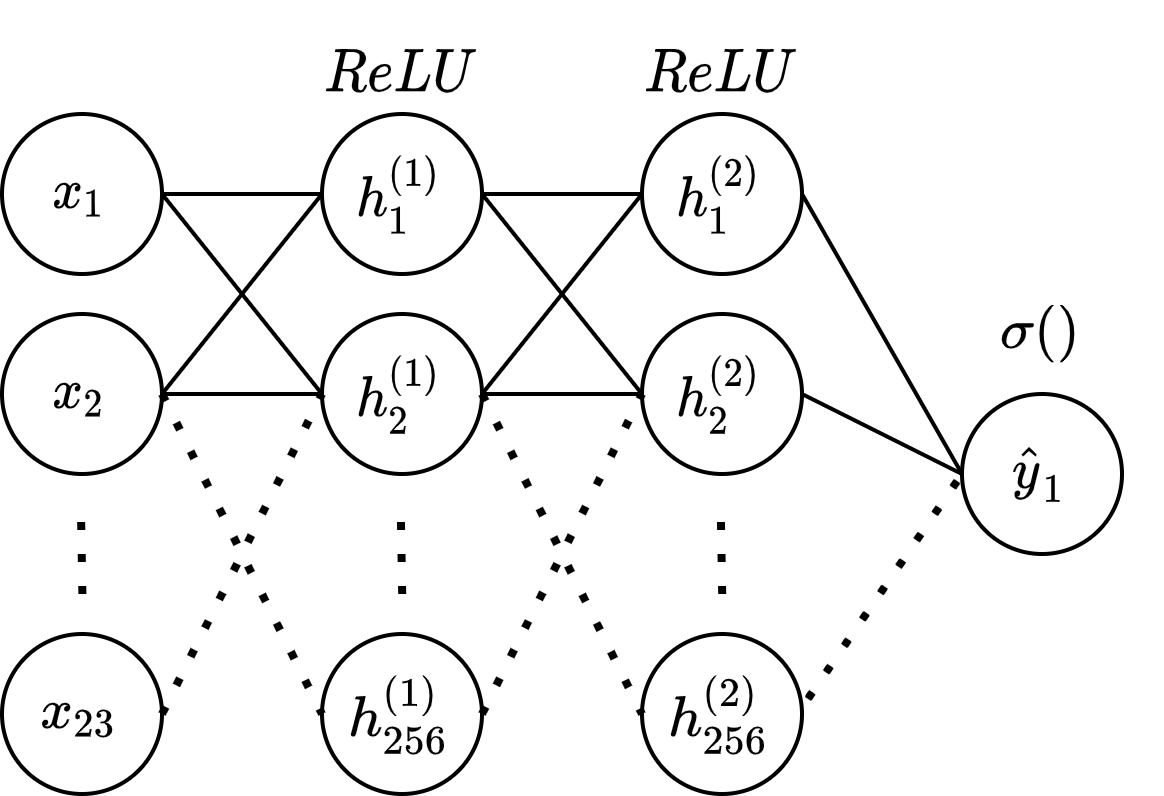

### Evaluar modelo conjunto de testeo

In [ ]:
y_pred = best_model.predict(normalized_test_X).round() #Predecimos con el mejor modelo

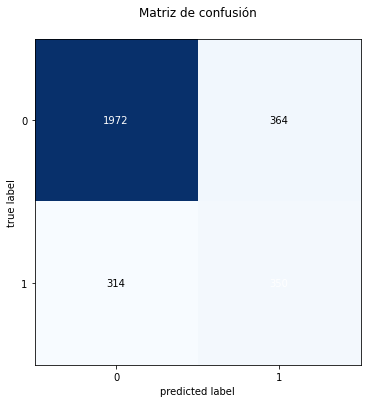

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2336
           1       0.49      0.53      0.51       664

    accuracy                           0.77      3000
   macro avg       0.68      0.69      0.68      3000
weighted avg       0.78      0.77      0.78      3000



In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred),figsize=(6,6), show_absolute=True, show_normed=False, colorbar=False)
plt.title('Matriz de confusión')
plt.show()
print(classification_report(y_test, y_pred))

# Conclusiones

En base a la matriz de confusión, se puede decir que el modelo predice razonablemente bien los casos negativos de cesación (0) para el set de validación. Señala correctamente 1972 de 2336 de estos o un 84% de ellos.
Por el contrario tiene una capacidad predictiva para los positivos (1) muy límitada, solo acertando 350 de los 664 casos o un 52%. Cabe destacar que visualmente no se ve el numero de positivos de correctos; este fue inferido precisamente en base a falsos positivos y el total que si se muestran correctamente.A priori el modelo obtenido no es muy robusto, ya que predice que un cliente efectivamente cesará el pago con un acierto alrededor del 50%, lo cual es como lanzar una moneda al aire.


Se presume que una Red recurrente se adaptaría de mejor manera al problema, ya que las features de pago y monto adeudado son de secuenciales entre meses. Y por tanto, para una mejora del modelo se podría intentar con ese tipo de arquitecturas, pues, toman en consideración información recurrente.
